## Predicting the satisfaction level of Santander clients.

**Project main goal: apply different machine learning algorithms to train a model to predict the probability of a client be unsatisfied with Santander's services. This project was developed using the data set provided by Santander in their competition on Kaggle. In this project I intend to improve my knowledge in machine learning algorithms, feature selection, tuning hyperparameters and evaluating classification models.**

The data set is composed of 370 anonimous variables and 4% of the responses are labeled as unsatisfied (target == 1) .

The performance of the model will be evaluated using ROC-AUC, which means that the predictions of both classes (satisfied and unsatisfied) are equally important. Precision/recall curve will also be evaluated, in order to verify the predictive reliability of the model considering the positive class in the context of imbalanced data sets.

https://www.kaggle.com/c/santander-customer-satisfaction

### Libraries

In [1]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Machine Learning
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pickle

In [3]:
# SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [4]:
# Customized functions
from custom_functions.functions import bar_plot_hue_percentile
from custom_functions.functions import bar_plots_hue_categorical
from custom_functions.functions import subplots
from custom_functions.functions import hist_percentile
from custom_functions.functions import compare_models
from custom_functions.functions import prc_plot, roc_plot, train_prc_plot, train_roc_plot

### Importing the data

In [ ]:
df = pd.read_csv('train.csv')

In [15]:
# Dimensions
df.shape

(76020, 371)

In [16]:
# Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [17]:
df.head()

ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   
3   8     2     37                 0.0                    195.0   
4  10     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                      0.0                      0.0  ...   
1                      0.0                      0.0  ...   
2                      0.0                      0.0  ...   
3                      0.0                      0.0  ...   
4                      0.0                      0.0  ...   

   saldo_medio_var33_hace2  saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
0                      0.0                      0.0                     0.0   
1                      0.0                      0.0                     0.0   
2                      0.0                      0.0                     0.0   
3                      0.0                      0.0                     0.0   
4                      0.0                      0.0                     0.0   

   saldo_medio_var33_ult3  saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
0                     0.0                      0.0                      0.0   
1                     0.0                      0.0                      0.0   
2                     0.0                      0.0                      0.0   
3                     0.0                      0.0                      0.0   
4                     0.0                      0.0                      0.0   

   saldo_medio_var44_ult1  saldo_medio_var44_ult3          var38  TARGET  
0                     0.0                     0.0   39205.170000       0  
1                     0.0                     0.0   49278.030000       0  
2                     0.0                     0.0   67333.770000       0  
3                     0.0                     0.0   64007.970000       0  
4                     0.0                     0.0  117310.979016       0  

[5 rows x 371 columns]

In [18]:
df.describe()

ID           var3         var15  imp_ent_var16_ult1  \
count   76020.000000   76020.000000  76020.000000        76020.000000   
mean    75964.050723   -1523.199277     33.212865           86.208265   
std     43781.947379   39033.462364     12.956486         1614.757313   
min         1.000000 -999999.000000      5.000000            0.000000   
25%     38104.750000       2.000000     23.000000            0.000000   
50%     76043.000000       2.000000     28.000000            0.000000   
75%    113748.750000       2.000000     40.000000            0.000000   
max    151838.000000     238.000000    105.000000       210000.000000   

       imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  \
count             76020.000000             76020.000000   
mean                 72.363067               119.529632   
std                 339.315831               546.266294   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               12888.030000             21024.810000   

       imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
count             76020.000000             76020.000000   
mean                  3.559130                 6.472698   
std                  93.155749               153.737066   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                8237.820000             11073.570000   

       imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
count             76020.000000             76020.000000  ...   
mean                  0.412946                 0.567352  ...   
std                  30.604864                36.513513  ...   
min                   0.000000                 0.000000  ...   
25%                   0.000000                 0.000000  ...   
50%                   0.000000                 0.000000  ...   
75%                   0.000000                 0.000000  ...   
max                6600.000000              6600.000000  ...   

       saldo_medio_var33_hace2  saldo_medio_var33_hace3  \
count             76020.000000             76020.000000   
mean                  7.935824                 1.365146   
std                 455.887218               113.959637   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               50003.880000             20385.720000   

       saldo_medio_var33_ult1  saldo_medio_var33_ult3  \
count            76020.000000            76020.000000   
mean                12.215580                8.784074   
std                783.207399              538.439211   
min                  0.000000                0.000000   
25%                  0.000000                0.000000   
50%                  0.000000                0.000000   
75%                  0.000000                0.000000   
max             138831.630000            91778.730000   

       saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
count             76020.000000             76020.000000   
mean                 31.505324                 1.858575   
std                2013.125393               147.786584   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max              438329.220000             24650.010000   

       saldo_medio_var44_ult1  saldo_medio_var44_ult3         var38  \
count            76020.000000            76020.000000  7.602000e+04   

In [19]:
# There is no missing values
df.isna().sum().sum()

0

## Exploratory Data Analysis

In [20]:
# Searching for duplicated samples
df.duplicated().any()

False

In [21]:
# How many different clients there are in the dataset? There is no duplicated ID in the dataset.
# Thus, this column will be droped since it will not be used in the model.
print('Number of clients: ', len(df['ID'].unique().tolist()))
df.drop(columns = 'ID', inplace=True)

Number of clients:  76020


In [22]:
# Searching for duplicated samples after remove ID column
df.duplicated().any()

True

After removing the ID column, duplicated samples were found in the data set. This means that samples belonging to different clients have exactly the same values. Thus, I will remove the duplicated samples.

In [23]:
print('Duplicated samples removed: ', df[df.duplicated()].shape[0])
df.drop_duplicates(subset = None, keep = 'first', inplace = True)
print('Remaining samples: ', df.shape[0])

Duplicated samples removed:  4807
Remaining samples:  71213


### Target variable

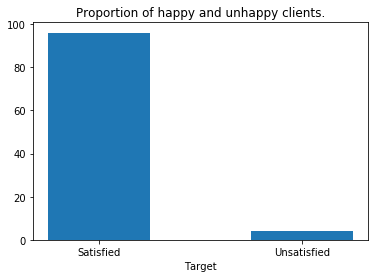

In [24]:
satisfaction = pd.Series(['Satisfied' if x == 0 else 'Unsatisfied' for x in df['TARGET']])
x = ((satisfaction.value_counts()/df.shape[0])*100).round(2)
plt.bar(x = x.index, height= x.values, width=0.5)
plt.xlabel('Target')
plt.title('Proportion of happy and unhappy clients.')
plt.show()

In [25]:
df['TARGET'].value_counts()

0    68398
1     2815
Name: TARGET, dtype: int64

### Presence of outliers

One of the first steps that I like to take in the begining of a project is to plot some boxplots to visualize the distribution of the data. They help us see the location, skewness, spread, tail length and outlying points, as observed below.

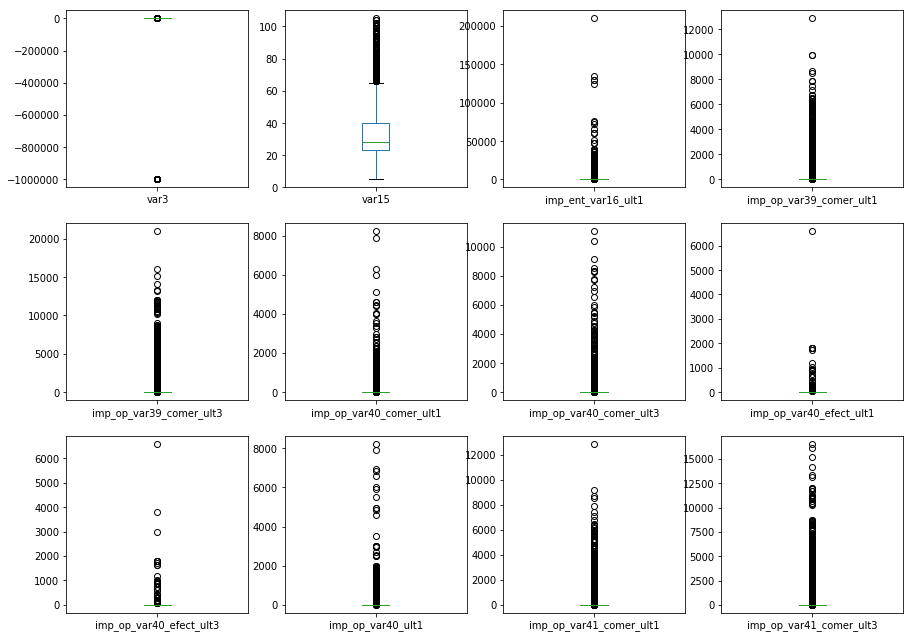

In [26]:
df[df.columns[0:12]].plot(kind = 'box', subplots = True, layout = (4,4), figsize = (15,15))
plt.show()

As will be shown further, most of the variables have a high frequency of unique values. This is why the boxplots presented a distribution skewed to the left, since the most amount of samples have small values. This restricts the upper and lower limits of the boxplot and any number a little higher than the high frequency small value will appear as an outlier.

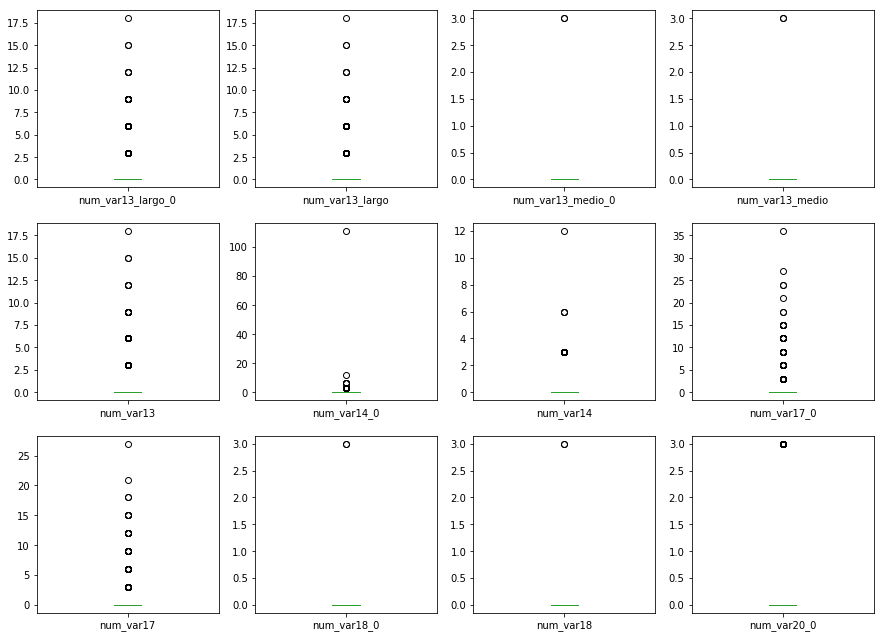

In [27]:
df[df.columns[100:112]].plot(kind = 'box', subplots = True, layout = (4,4), figsize = (15,15))
plt.show()

Boxplots above show there are also discrete/categorical variables in the dataset.

### Presence of variables with unique values

These variables is going to be removed since they do not give any information to the model.

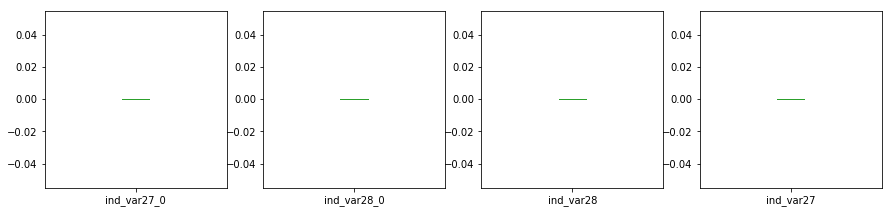

In [28]:
df[df.columns[56:60]].plot(kind = 'box', subplots = True, layout = (4,4), figsize = (15,15))
plt.show()

In [29]:
# Looking for variables with 0 variance (unique value)
def variables_with_one_level(dataframe):
    count = dataframe.apply(lambda x: len(x.unique()), axis = 0)
    one_level = [count.index[i] for i in range(len(count)) if count[i] == 1]
    return one_level

names = variables_with_one_level(df)
print('Number of variables with 0 variance:', len(names))
names

Number of variables with 0 variance: 34


['ind_var2_0',
 'ind_var2',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var41',
 'ind_var46_0',
 'ind_var46',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var28',
 'saldo_var27',
 'saldo_var41',
 'saldo_var46',
 'imp_amort_var18_hace3',
 'imp_amort_var34_hace3',
 'imp_reemb_var13_hace3',
 'imp_reemb_var33_hace3',
 'imp_trasp_var17_out_hace3',
 'imp_trasp_var33_out_hace3',
 'num_var2_0_ult1',
 'num_var2_ult1',
 'num_reemb_var13_hace3',
 'num_reemb_var33_hace3',
 'num_trasp_var17_out_hace3',
 'num_trasp_var33_out_hace3',
 'saldo_var2_ult1',
 'saldo_medio_var13_medio_hace3']

In [30]:
# Eliminating these variables from the dataset
df_new = df.copy()
df_new.drop(columns = names, inplace = True)
df_new.shape

(71213, 336)

In [31]:
df.shape

(71213, 370)

In [32]:
## Sklearn already have a method to remove features with low variance. Let's use this method to remove variables with variance
# smaller than 0.01.
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.01)
sel.fit(df_new)
print('Variables with variance = 0.01:')
[df_new.columns[i] for i in range(len(df_new.columns)) if sel.get_support()[i] == False]

Variables with variance = 0.01:


['ind_var1',
 'ind_var6_0',
 'ind_var6',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var14',
 'ind_var17_0',
 'ind_var17',
 'ind_var18_0',
 'ind_var18',
 'ind_var19',
 'ind_var20_0',
 'ind_var20',
 'ind_var29_0',
 'ind_var29',
 'ind_var30_0',
 'ind_var31_0',
 'ind_var31',
 'ind_var32_cte',
 'ind_var32_0',
 'ind_var32',
 'ind_var33_0',
 'ind_var33',
 'ind_var34_0',
 'ind_var34',
 'ind_var40',
 'ind_var39',
 'ind_var44_0',
 'ind_var44',
 'num_var6_0',
 'num_var6',
 'num_var13_medio_0',
 'num_var13_medio',
 'num_var18_0',
 'num_var18',
 'num_var29_0',
 'num_var29',
 'num_var33',
 'num_var34_0',
 'num_var34',
 'ind_var7_emit_ult1',
 'ind_var7_recib_ult1',
 'num_aport_var33_hace3',
 'num_aport_var33_ult1',
 'num_var7_emit_ult1',
 'num_meses_var13_medio_ult3',
 'num_meses_var17_ult3',
 'num_meses_var29_ult3',
 'num_meses_var33_ult3',
 'num_meses_var44_ult3',
 'num_reemb_var13_ult1',
 'num_reemb_var17_hace3',
 'num_reemb_var33_ult1',
 'num_trasp_var17_in_hace3',
 'num_trasp_var17_in_ult1'

In [33]:
df_new = df_new[df_new.columns[sel.get_support()]]
print('Number of columns remaining: ', df_new.shape[1])

Number of columns remaining:  276


https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html

https://www.kaggle.com/prashant111/comprehensive-guide-on-feature-selection

https://www.kaggle.com/selfishgene/advanced-feature-exploration

https://www.kaggle.com/srodriguex/model-and-feature-selection-with-python

### What the variables are related to?
Exploring the variables according to their names.

### Pure variables
There are some variables named 'var' followed by a number. These variables are going to be called pure variables.

In [34]:
pure_vars = [name for name in df.columns if re.search("(?:^|\W)(var\d+)(?:$|\W)", name)]
pure_vars

['var3', 'var15', 'var36', 'var21', 'var38']

In [35]:
df[pure_vars].describe()

var3         var15         var36         var21         var38
count   71213.00000  71213.000000  71213.000000  71213.000000  7.121300e+04
mean    -1499.77125     33.563142     38.416806     34.746465  1.171341e+05
std     38733.75145     13.108427     46.896934    406.816521  1.882276e+05
min   -999999.00000      5.000000      0.000000      0.000000  5.163750e+03
25%         2.00000     23.000000      2.000000      0.000000  6.587463e+04
50%         2.00000     28.000000      3.000000      0.000000  1.002062e+05
75%         2.00000     40.000000     99.000000      0.000000  1.228152e+05
max       238.00000    105.000000     99.000000  30000.000000  2.203474e+07

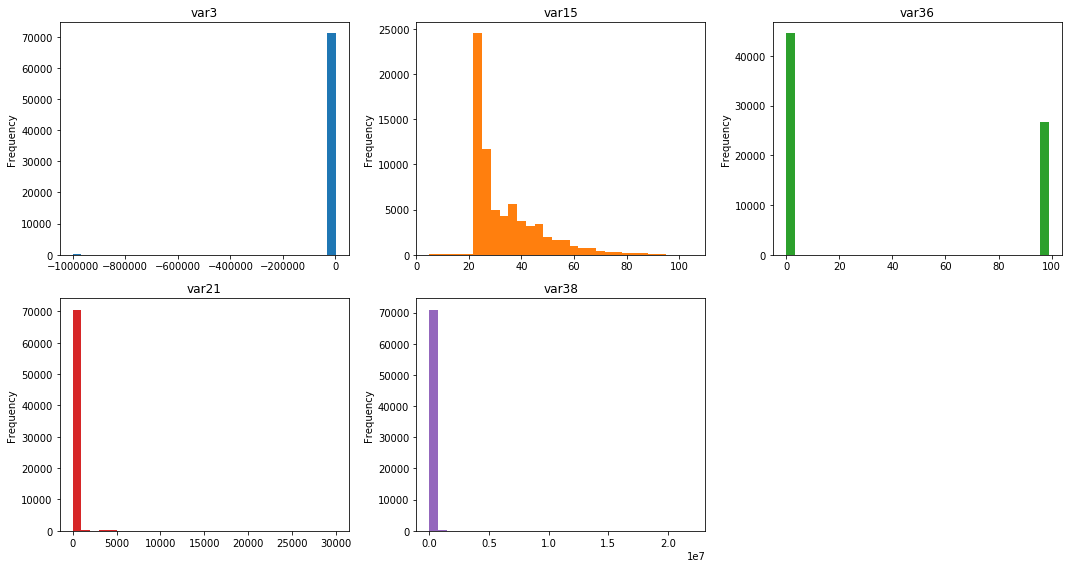

In [36]:
# Histograms
subplots(dataframe = df, variables=pure_vars, kind = 'hist', x = 2, y = 3, n_bins = 30, figsize= (15,8))

#### var3

This variable has some negative value of -999999, which seems to be related with missing values. These samples will be replaced by 2, the most frequent value in var3 and, also, the value that has the most number of satisfied and unsatisfied clients. Thus, this replacement will not change significantly the response rate of var3 = 2.

After replacement, var3 has 207 unique values, what makes me believe it is a categorical variable.

In [37]:
x = len(df_new['var3'].unique())
print('Number of unique values in var3: ', x)
print('\nTop 10 frequent values of var3. \n', df_new['var3'].value_counts().head(10))
print('\nFrequency of satisfaction in var3. \n', df_new.groupby('var3')['TARGET'].value_counts().head(10))


#replacing -999999 for 2
df_new.replace(to_replace = -999999, value = 2, inplace=True)

print('Number of unique values: ', x-1)

Number of unique values in var3:  208

Top 10 frequent values of var3. 
  2         69369
 8           138
 9           110
 3           108
-999999      107
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64

Frequency of satisfaction in var3. 
 var3     TARGET
-999999  0           105
         1             2
 0       0            67
         1             6
 1       0            94
         1            11
 2       0         66611
         1          2758
 3       0           106
         1             2
Name: TARGET, dtype: int64
Number of unique values:  207


In [38]:
# 98% of the samples belong to var3 = 2. This variable will be removed from the data because I believe it do not help predict
# the target variable

df_new.groupby('TARGET')['var3'].value_counts(normalize = True).unstack('TARGET').head()*100

TARGET          0          1
var3                        
0        0.097956   0.213144
1        0.137431   0.390764
2       97.540864  98.046181
3        0.154975   0.071048
4        0.119887   0.142096

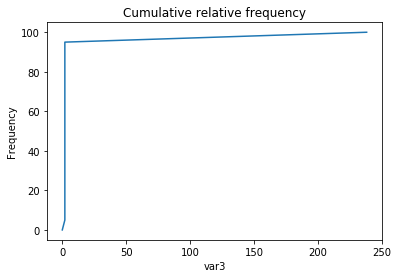

In [39]:
perct = pd.Series(np.percentile(df_new['var3'], np.arange(0,101,5)), index = np.arange(0,101,5))
plt.plot(perct, perct.index)
plt.xlabel('var3')
plt.ylabel('Frequency')
plt.title('Cumulative relative frequency')
plt.show()

In [40]:
df_new.drop(columns = ['var3'], inplace= True)
df_new.shape

(71213, 275)

#### Var15

According to some notebooks in Kaggle, this variable is possibly related to the age of the clients. We can see that unsatisfied clients have above 20 years old. Moreover, Santander clients presented in this dataset are pretty young, the most frequent age is 23.

The skewed distribution can be treated by applying log transformation to the data, as shown in the boxplot log(var15).

Analyzing the percentiles, 95% of the samples are under 61 years old, while the first 5% are composed by clients with less then 22 years old. All clients under 5 percentile are 0 labeled, i.e., they are all satisfied.

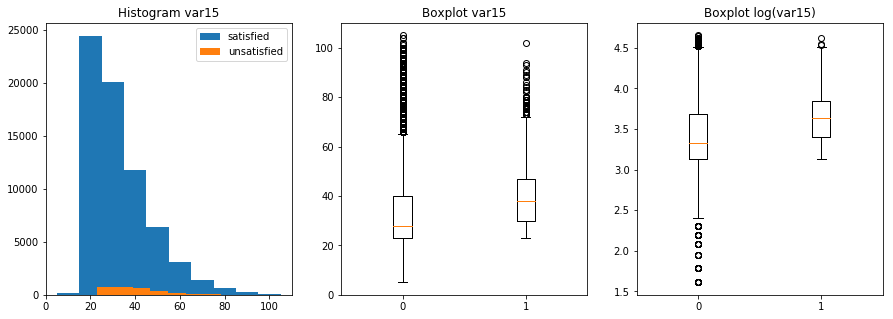

In [41]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
df.groupby('TARGET')['var15'].hist(grid = False)
plt.legend(labels = ['satisfied','unsatisfied'])
plt.title('Histogram var15')
plt.subplot(1,3,2)
x = [df[df['TARGET'] == 0]['var15'].values, df[df['TARGET'] == 1]['var15'].values]
label = [0,1]
plt.boxplot(x, labels= label)
plt.title('Boxplot var15')
plt.subplot(1,3,3)
plt.boxplot(list(map(np.log, x)), labels = label)
plt.title('Boxplot log(var15)')
plt.show()

In [42]:
# The bigger amount of clients have 23 years old
df['var15'].value_counts().head(1)

23    17943
Name: var15, dtype: int64

In [43]:
# Log transformation reduce the skew of the data
df['var15'].skew(), np.log1p(df['var15']).skew()

(1.5390192038423585, 0.7485835377968781)

In [44]:
# 95% of the clients have less than 61 years old. 
pd.Series(np.percentile(df['var15'], np.arange(0,101,5)), index = np.arange(0,101,5))

0        5.0
5       23.0
10      23.0
15      23.0
20      23.0
25      23.0
30      24.0
35      25.0
40      25.0
45      27.0
50      28.0
55      30.0
60      32.0
65      35.0
70      37.0
75      40.0
80      43.0
85      47.0
90      52.0
95      61.0
100    105.0
dtype: float64

In [45]:
# All samples under 5 percentile are 0 labeled
df[df['var15'].rank(pct=True) < 0.05].groupby('TARGET')['var15'].value_counts().index.levels[0]

Int64Index([0], dtype='int64', name='TARGET')

#### var36

This variable presents only 4 unique value, which is characteristic of a categorical variable. It is not clear what the value 99 means.

Category 0 has only label 0 samples.

In [46]:
df.groupby('TARGET')['var36'].value_counts().unstack('TARGET')

TARGET        0       1
var36                  
0         358.0     NaN
1       14202.0   461.0
2        8406.0   241.0
3       20498.0   368.0
99      24934.0  1745.0

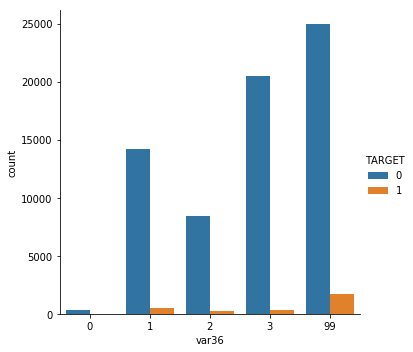

In [47]:
sns.catplot('var36', kind = 'count', hue = 'TARGET', data = df)
plt.show()

#### var21

This variable presents values organized by range. 99% of the samples are equal to 0, presenting no significant frequency related to other values when compared to var21 = 0. This is characteristic of a low variance variable, which do not provide enough information to explain the variability in the target variable. This variable will be removed.

In [48]:
df.groupby('TARGET')['var21'].value_counts(normalize = True).unstack('TARGET')*100

TARGET          0          1
var21                       
0       98.785052  98.685613
900      0.327495   0.426288
1200     0.014620   0.071048
1500     0.045323        NaN
1800     0.282172   0.461812
2100     0.001462   0.035524
2400     0.004386        NaN
2700     0.038013        NaN
3000     0.118425   0.106572
3300     0.002924        NaN
3600     0.074564   0.035524
4200     0.001462   0.035524
4500     0.135969   0.106572
5100     0.002924        NaN
5400     0.005848        NaN
5700     0.001462        NaN
6000     0.039475        NaN
6600     0.001462        NaN
7200     0.089184   0.035524
7500     0.001462        NaN
9000     0.020468        NaN
10500    0.001462        NaN
18000    0.002924        NaN
30000    0.001462        NaN

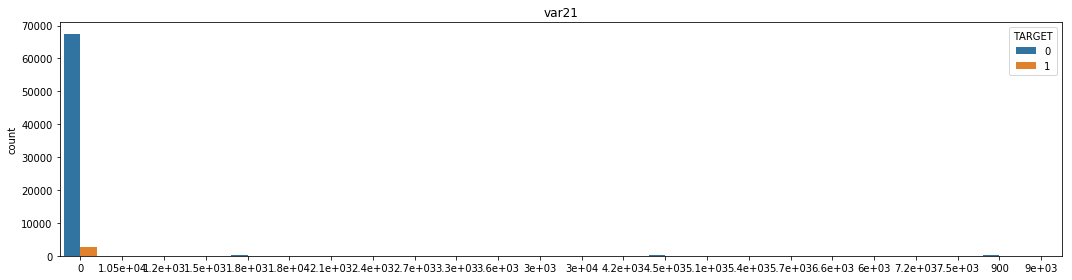

In [49]:
bar_plots_hue_categorical(df, ['var21'], 'TARGET', 1, 1, size_fig= (15,4))

In [50]:
df_new.drop(columns = 'var21', inplace = True)
df_new.shape

(71213, 274)

#### var38

This variable maybe related with the clients income. The histogram has two peaks, one at around 9.0e4 and another, sharper than the first, around 1.2e5. Values bigger than 5.0e6 are rare.

In [51]:
# 95% of the values are below 2.428e+05
np.percentile(df['var38'],np.arange(0,101,5))

array([5.16375000e+03, 3.85184220e+04, 4.70721120e+04, 5.39410920e+04,
       5.99862180e+04, 6.58746300e+04, 7.17407400e+04, 7.79411580e+04,
       8.47176060e+04, 9.20296800e+04, 1.00206210e+05, 1.09561272e+05,
       1.17310979e+05, 1.17310979e+05, 1.17310979e+05, 1.22815230e+05,
       1.37207310e+05, 1.56986100e+05, 1.87626714e+05, 2.48855520e+05,
       2.20347388e+07])

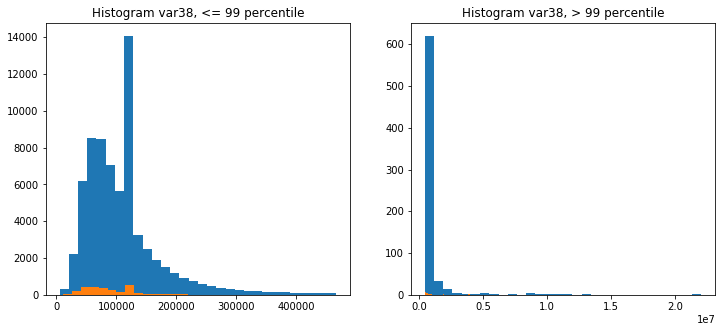

In [52]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
df[df['var38'].rank(pct=True) <= 0.99].groupby('TARGET')['var38'].hist(bins = 30, grid = False)
plt.title('Histogram var38, <= 99 percentile')
plt.subplot(1,2,2)
df[df['var38'].rank(pct=True) > 0.99].groupby('TARGET')['var38'].hist(bins = 30, grid = False)
plt.title('Histogram var38, > 99 percentile')
plt.show()

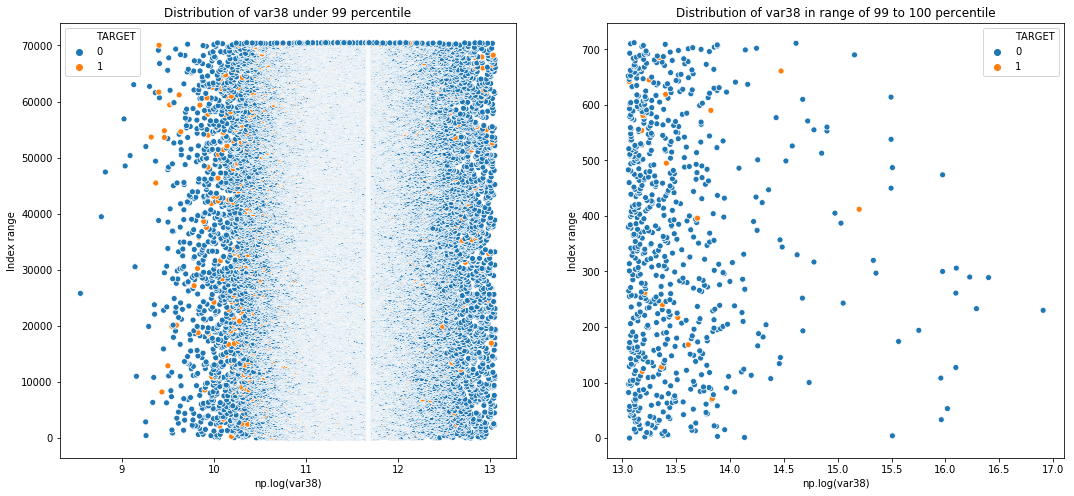

In [53]:
# Visualizing a scatter plot of 99% of the data and the remaining 1%.
data1 = df[df['var38'].rank(pct=True) <= 0.99]
data2 = df[df['var38'].rank(pct=True) > 0.99]

plt.figure(figsize = (18,8))
plt.subplot(1,2,1)
sns.scatterplot(x = np.log(data1['var38']), y = np.arange(0, data1.shape[0]), hue = data1['TARGET'])
plt.xlabel('np.log(var38)')
plt.ylabel('Index range')
plt.title('Distribution of var38 under 99 percentile')
plt.subplot(1,2,2)
sns.scatterplot(x = np.log(data2['var38']), y = np.arange(0, data2.shape[0]), hue = data2['TARGET'])
plt.xlabel('np.log(var38)')
plt.ylabel('Index range')
plt.title('Distribution of var38 in range of 99 to 100 percentile')
plt.show()

In [54]:
# Number of positive class in 99-100 percentile region
len(data2[data2['TARGET'] == 1]['var38'])

19

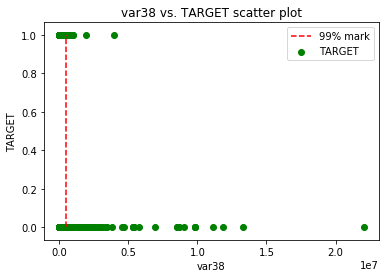

In [55]:
# Distribution of classes in var38. The dashed line marks the 95 percentile.
plt.scatter(x = df['var38'], y = df['TARGET'], color = 'green')
plt.plot([4.66770312e+05,4.66770312e+05],[0,1], '--', color = 'red', label = '99% mark')
plt.title('var38 vs. TARGET scatter plot')
plt.xlabel('var38')
plt.ylabel('TARGET')
plt.legend()
plt.show()

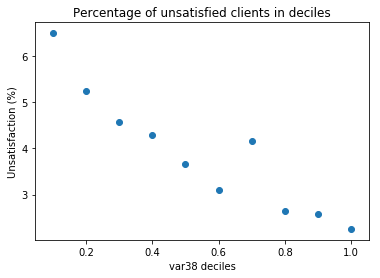

In [56]:
unsatisfaction_rate = []
j = 0
for i in np.arange(0.1,1.1,0.1):
    dt = df[(df['var38'].rank(pct=True) <= i)&(df['var38'].rank(pct=True) > j)]
    unsatisfaction_rate.append(dt[dt['TARGET'] == 1]['var38'].count() * 100 / dt.shape[0])
    j += 0.1
    
plt.scatter(x = np.arange(0.1,1.1,0.1), y = unsatisfaction_rate)
plt.xlabel('var38 deciles')
plt.ylabel('Unsatisfaction (%)')
plt.title('Percentage of unsatisfied clients in deciles')
plt.show()

The percentage of unsatisfied clients tends to decrease as the values of var38 increase, except in decile 70, the exact region of that second sharper peak in histogram.

The distribution of var38 can be normalized applying log transformation. Let's see how this would work.

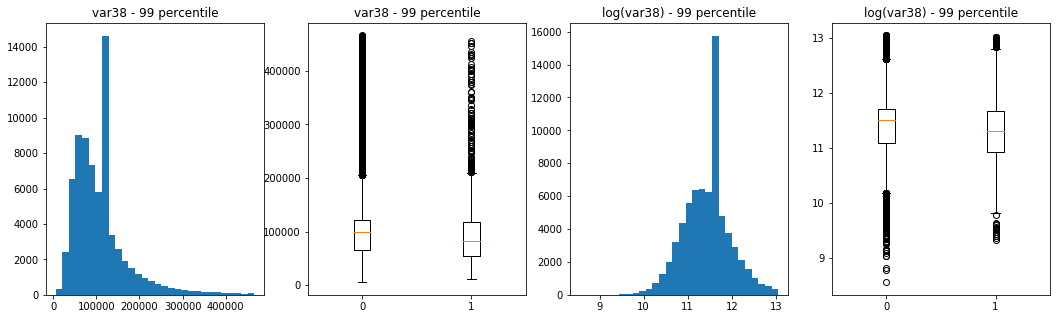

In [57]:
data1 = df[df['var38'].rank(pct=True) <= 0.99]

x = [data1[data1['TARGET'] == 0]['var38'], data1[data1['TARGET'] == 1]['var38']]
labels = [0,1]

# Histograms
plt.figure(figsize = (18,5))
plt.subplot(1,4,1)
plt.title('var38 - 99 percentile')
plt.hist(x = data1['var38'], bins = 30)
plt.subplot(1,4,2)
plt.title('var38 - 99 percentile')
plt.boxplot(x, labels = labels)
plt.subplot(1,4,3)
plt.title('log(var38) - 99 percentile')
plt.hist(x = np.log(data1['var38']), bins = 30)
plt.subplot(1,4,4)
plt.title('log(var38) - 99 percentile')
plt.boxplot(list(map(np.log, x)), labels = labels)
plt.show()

A strategy to treat outliers might be apply log transformation to the data and then winsorize the extremities.

### Composed variables

Besides the pure variables, the dataset have variables with composed names. These variables have some key suffixes in their names, which will be used identify them.

In [58]:
# Looking for variables with filters in their names
filters = ['saldo', 'delta', 'imp', 'num', 'ind']
soma = 0
names = dict()
for i, sufix in enumerate(filters):
    names[sufix] = [name for name in df_new.columns if sufix in name]
    print('Quantity of {} variables: {}'.format(sufix, len(names[sufix])))
    soma += len(names[sufix])
print('Total of variables: ', soma)

Quantity of saldo variables: 65
Quantity of delta variables: 26
Quantity of imp variables: 57
Quantity of num variables: 113
Quantity of ind variables: 35
Total of variables:  296


It is obvious that there are variables with more than one filter in their names, because the total of variables identified by the suffixes (296) is bigger than that in the dataset, 274. Let's look for variables that have two suffixes:

In [59]:
print('Number of variables with common suffixes:')
for filtro in filters:
    data = names[filtro]
    for filtro_ in filters:
        if filtro != filtro_:
            var = list(filter(lambda x: filtro_ in x, data))
            if len(var) > 0:
                print('{} - {}: {}'.format(filtro, filtro_,len(var)))

Number of variables with common suffixes:
delta - imp: 14
delta - num: 12
imp - delta: 14
num - delta: 12


In [60]:
names['delta']

['delta_imp_amort_var18_1y3',
 'delta_imp_amort_var34_1y3',
 'delta_imp_aport_var13_1y3',
 'delta_imp_aport_var17_1y3',
 'delta_imp_aport_var33_1y3',
 'delta_imp_compra_var44_1y3',
 'delta_imp_reemb_var13_1y3',
 'delta_imp_reemb_var17_1y3',
 'delta_imp_reemb_var33_1y3',
 'delta_imp_trasp_var17_in_1y3',
 'delta_imp_trasp_var17_out_1y3',
 'delta_imp_trasp_var33_in_1y3',
 'delta_imp_trasp_var33_out_1y3',
 'delta_imp_venta_var44_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_reemb_var17_1y3',
 'delta_num_reemb_var33_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var17_out_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_trasp_var33_out_1y3',
 'delta_num_venta_var44_1y3']

Delta variables have also num or imp in ther names. Thus, if all the delta variables were desconsidered, we find all the rest 270 variables in the dataset, not considering the target and the pure variables that were left.

These variables will be called: saldo-composed vars, imp-composed vars, num-composed vars, ind-composed vars.

#### ind-composed vars

These are all dummy variables, which represent categorical variables. Only var ind_var5 has a balanced distribution, the other presents the most frequent value as 1 or 0.

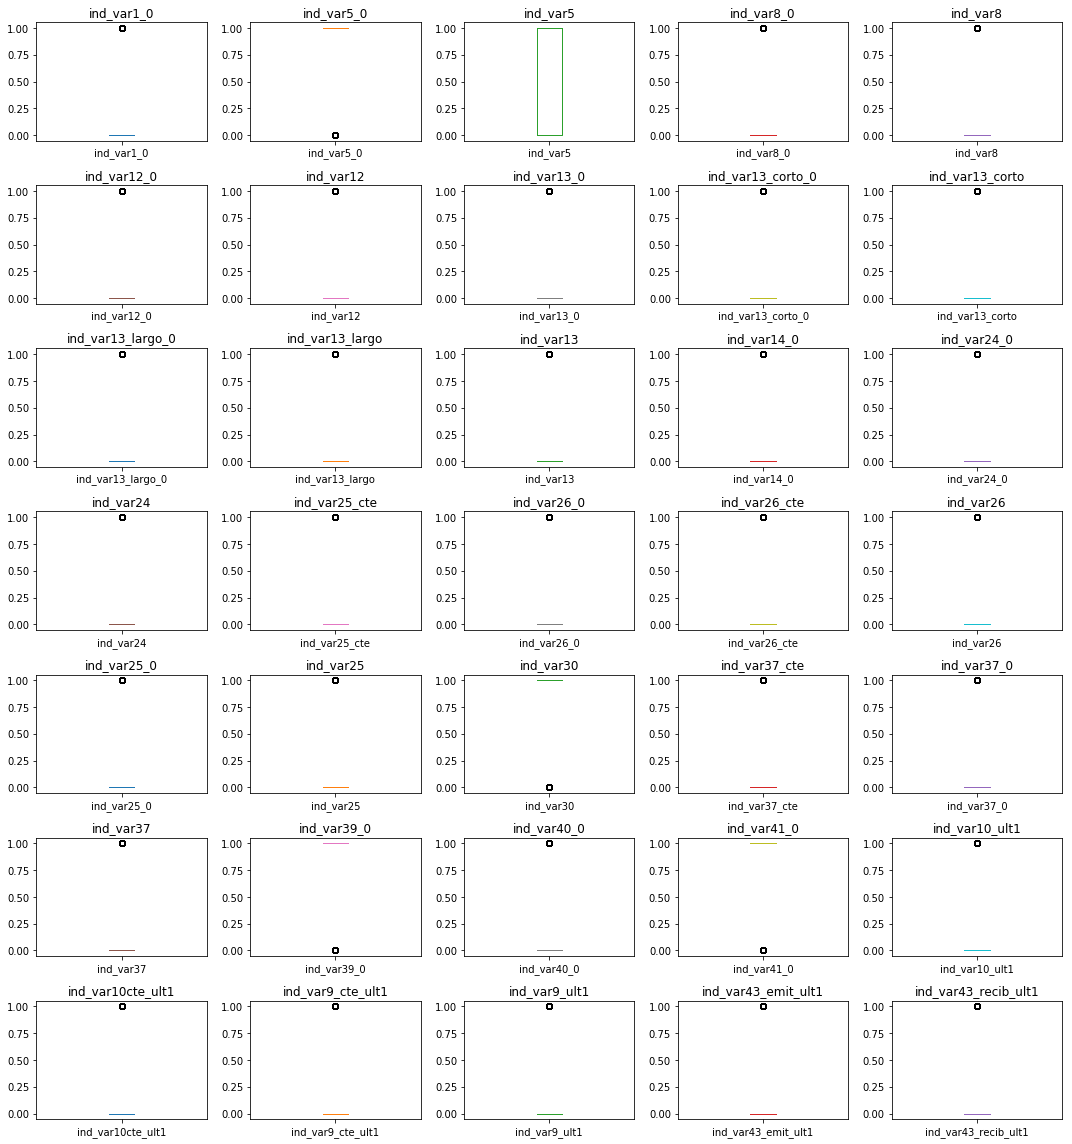

In [61]:
subplots(df, names['ind'], 'box', 7, 5, None, figsize = (15,16))

In [62]:
df[names['ind']].apply(lambda x: x.value_counts())

ind_var1_0  ind_var5_0  ind_var5  ind_var8_0  ind_var8  ind_var12_0  \
0       70342        3170     22856       68734     69039        66084   
1         871       68043     48357        2479      2174         5129   

   ind_var12  ind_var13_0  ind_var13_corto_0  ind_var13_corto  ...  ind_var37  \
0      67760        67241              67949            68060  ...      66252   
1       3453         3972               3264             3153  ...       4961   

   ind_var39_0  ind_var40_0  ind_var41_0  ind_var10_ult1  ind_var10cte_ult1  \
0         8194        70345         8306           65065              64207   
1        63019          868        62907            6148               7006   

   ind_var9_cte_ult1  ind_var9_ult1  ind_var43_emit_ult1  ind_var43_recib_ult1  
0              63849          64682                66151                 61384  
1               7364           6531                 5062                  9829  

[2 rows x 35 columns]

#### imp-composed variables

Variables might be discrete, categorical or continuous.

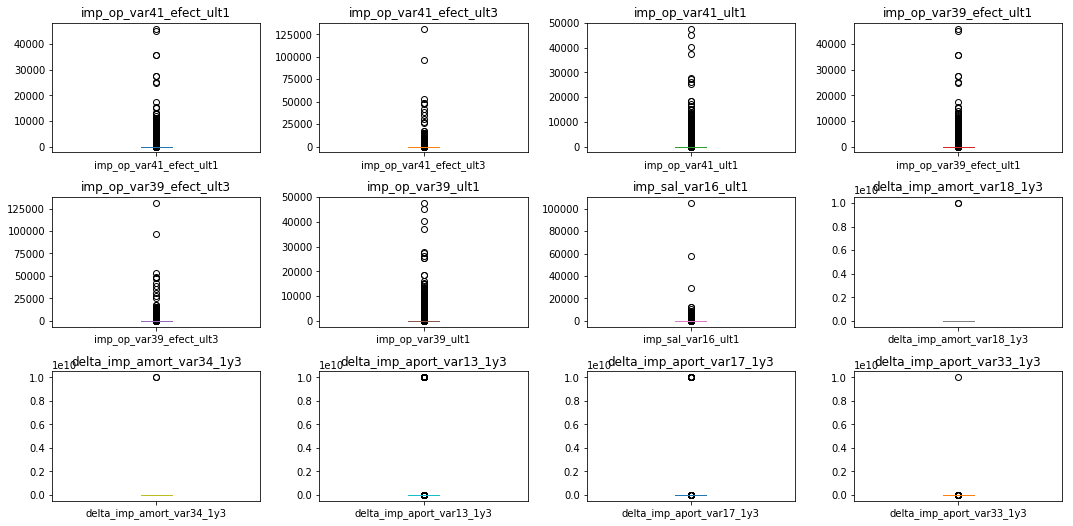

In [63]:
subplots(df, names['imp'][10:22], 'box', 5, 4, None, figsize = (15,12))

##### cat_imp_var

imp-composed variables with 2 unique values will be called cat_imp_var.

In [64]:
# Looking for dummy variables
cat_imp_var = [name for name in names['imp'] if len(df[name].unique()) < 3]
df[cat_imp_var].apply(lambda x: x.astype(str).value_counts())

delta_imp_amort_var18_1y3  delta_imp_amort_var34_1y3  \
0                             71211.0                    71211.0   
0.0                               NaN                        NaN   
1200                              NaN                        NaN   
12027.15                          NaN                        NaN   
3000                              NaN                        NaN   
9999999999                        2.0                        2.0   

            delta_imp_reemb_var13_1y3  delta_imp_reemb_var33_1y3  \
0                             71175.0                    71212.0   
0.0                               NaN                        NaN   
1200                              NaN                        NaN   
12027.15                          NaN                        NaN   
3000                              NaN                        NaN   
9999999999                       38.0                        1.0   

            delta_imp_trasp_var17_out_1y3  delta_imp_trasp_var33_out_1y3  \
0                                 71209.0                        71212.0   
0.0                                   NaN                            NaN   
1200                                  NaN                            NaN   
12027.15                              NaN                            NaN   
3000                                  NaN                            NaN   
9999999999                            4.0                            1.0   

            imp_reemb_var17_hace3  imp_reemb_var33_ult1  \
0                             NaN               71212.0   
0.0                       71212.0                   NaN   
1200                          NaN                   1.0   
12027.15                      1.0                   NaN   
3000                          NaN                   NaN   
9999999999                    NaN                   NaN   

            imp_trasp_var33_out_ult1  
0                            71212.0  
0.0                              NaN  
1200                             NaN  
12027.15                         NaN  
3000                             1.0  
9999999999                       NaN

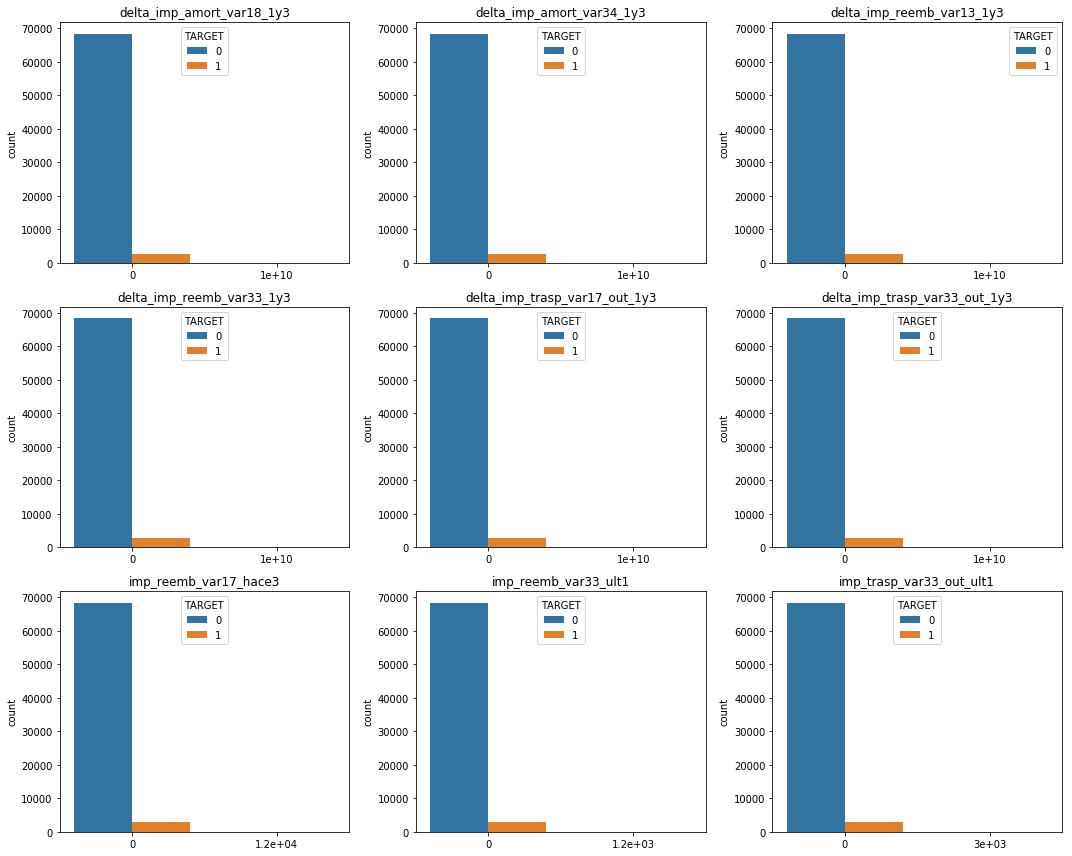

In [65]:
bar_plots_hue_categorical(df, cat_imp_var, 'TARGET', 3, 3, size_fig= (15,12))

3cat_imp_var variables present almost 100% of the samples with 0 value, condition that definitely do not help to explain the variation in the target variable. Furthermore, value 9999999999 possibly represents missing values. In this direction, cat_imp_var will be removed from the dataset.

In [66]:
# Drop columns from the dataset
df_new.drop(columns = cat_imp_var, inplace = True)
df_new.shape

(71213, 265)

In [67]:
# Drop colunms from names['imp']
names['imp'] = [name for name in names['imp'] if name not in cat_imp_var]
print(len(names['imp']))

48


##### cat_imp_var1

imp-composed variables with 2 < unique_values <= 10.

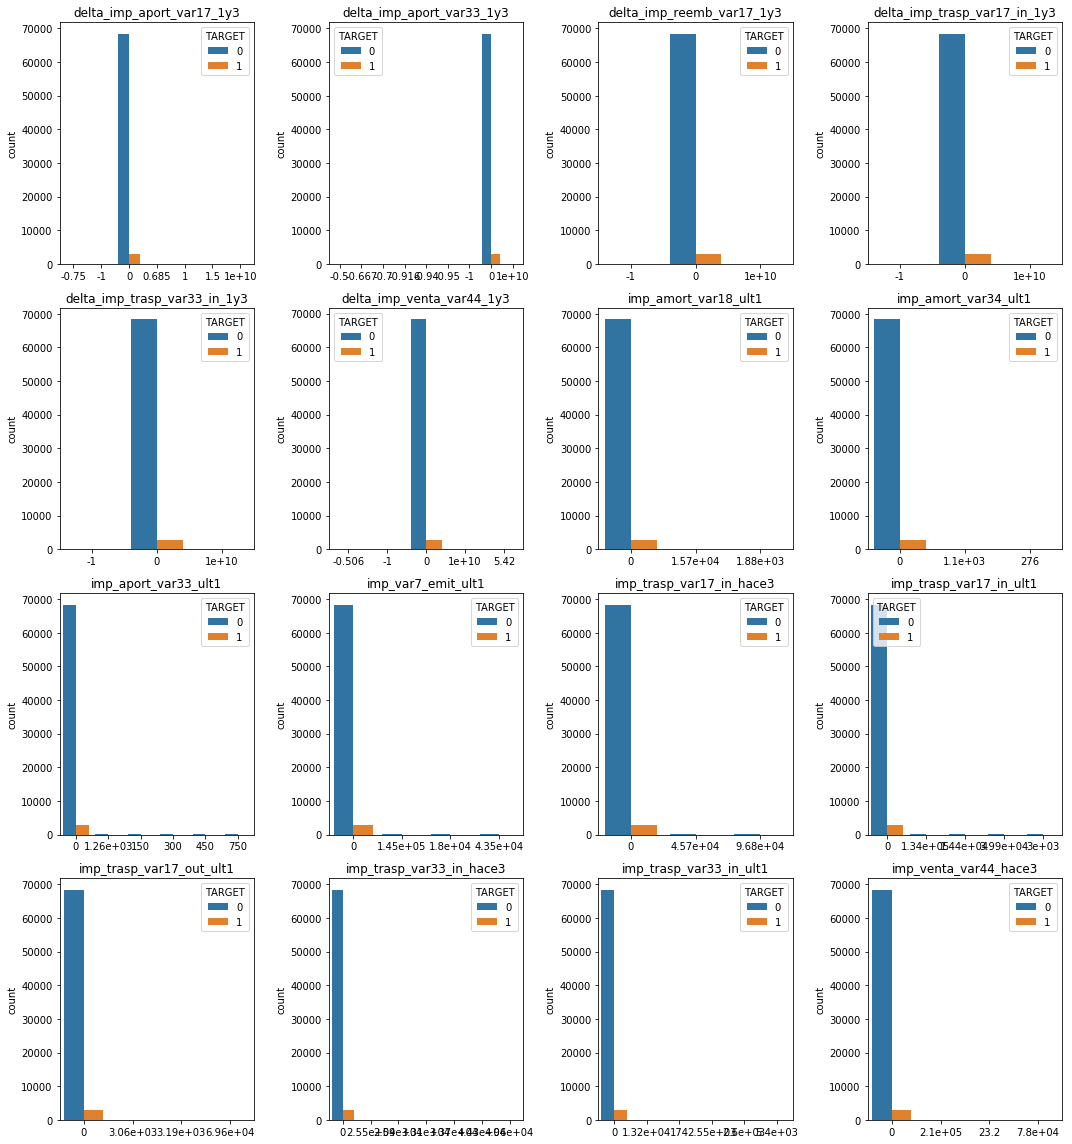

In [68]:
cat_imp_var1 = [name for name in names['imp'] if len(df[name].unique()) <= 10]
bar_plots_hue_categorical(df, cat_imp_var1, 'TARGET', 4, 4)

In [69]:
for var in cat_imp_var1:
    print(df.groupby('TARGET')[var].value_counts(normalize = True).unstack('TARGET').sort_values(by=0, ascending = False).head(5)*100)
    print()

TARGET                             0          1
delta_imp_aport_var17_1y3                      
 0.000000e+00              99.913740  99.964476
 1.000000e+10               0.055557   0.035524
-1.000000e+00               0.024855        NaN
-7.500000e-01               0.001462        NaN
 6.853333e-01               0.001462        NaN

TARGET                             0      1
delta_imp_aport_var33_1y3                  
 0.000000                  99.964911  100.0
-1.000000                   0.024855    NaN
-0.950000                   0.001462    NaN
-0.940476                   0.001462    NaN
-0.916000                   0.001462    NaN

TARGET                             0          1
delta_imp_reemb_var17_1y3                      
 0                         99.970759  99.964476
 9999999999                 0.027779   0.035524
-1                          0.001462        NaN

TARGET                                0      1
delta_imp_trasp_var17_in_1y3                  
 0                 

As can be seen, these variables also have more than 99% of samples with 0 value. They will be removed from the data.

In [70]:
# Removing cat_imp_var1 from names['imp']
names['imp'] = [name for name in names['imp'] if name not in cat_imp_var1]
print('Remaining imp-composed variables: ', len(names['imp']))

# Drop columns from the dataset
df_new.drop(columns = cat_imp_var1, inplace = True)
df_new.shape

Remaining imp-composed variables:  32


(71213, 249)

##### Investigating the rest of imp-composed variables

In [71]:
# Collecting the rest of imp-composed variables and the number of unique values
imp_count = df[names['imp']].apply(lambda x: len(x.unique()))
imp_count

imp_ent_var16_ult1             596
imp_op_var39_comer_ult1       7551
imp_op_var39_comer_ult3       9099
imp_op_var40_comer_ult1        293
imp_op_var40_comer_ult3        346
imp_op_var40_efect_ult1         23
imp_op_var40_efect_ult3         29
imp_op_var40_ult1              224
imp_op_var41_comer_ult1       7421
imp_op_var41_comer_ult3       8961
imp_op_var41_efect_ult1        331
imp_op_var41_efect_ult3        454
imp_op_var41_ult1             8032
imp_op_var39_efect_ult1        336
imp_op_var39_efect_ult3        462
imp_op_var39_ult1             8149
imp_sal_var16_ult1              66
delta_imp_aport_var13_1y3       27
delta_imp_compra_var44_1y3      17
imp_aport_var13_hace3          425
imp_aport_var13_ult1           182
imp_aport_var17_hace3           20
imp_aport_var17_ult1            42
imp_aport_var33_hace3           16
imp_var7_recib_ult1            184
imp_compra_var44_hace3          33
imp_compra_var44_ult1           85
imp_reemb_var13_ult1            33
imp_reemb_var17_ult1

##### imp_30: imp-composed variables with less than 30 unique values

In [75]:
imp_30 = imp_count[imp_count < 30].index

In [74]:
for var in imp_30:
    print(df.groupby('TARGET')[var].value_counts(normalize = True).unstack('TARGET').sort_values(by=0, ascending = False).head(5)*100)
    print()

TARGET                           0          1
imp_op_var40_efect_ult1                      
0.0                      99.960525  99.609236
1800.0                    0.004386   0.035524
900.0                     0.004386   0.106572
270.0                     0.002924        NaN
600.0                     0.002924   0.035524

TARGET                           0          1
imp_op_var40_efect_ult3                      
0.0                      99.951753  99.573712
1800.0                    0.004386   0.035524
900.0                     0.004386   0.106572
330.0                     0.002924        NaN
60.0                      0.002924        NaN

TARGET                             0          1
delta_imp_aport_var13_1y3                      
 0.000000e+00              96.986754  99.609236
-1.000000e+00               2.441592   0.177620
 1.000000e+10               0.532179   0.213144
-5.000000e-01               0.002924        NaN
 4.000000e+00               0.002924        NaN

TARGET           

imp_30 variables will be removed from the dataset because they present the same pattern as cat_imp_var and cat_imp_var1.

In [76]:
df_new.drop(columns = imp_30, inplace = True)
df_new.shape

(71213, 242)

##### imp_30_1000: imp-composed variables with 30 to 1000 unique values

In [77]:
# imp-composed vars with 30 to 1000 unique values.
imp_30_1000 = imp_count[(imp_count >= 30)&(imp_count < 1000)].index
df[imp_30_1000].describe()

imp_ent_var16_ult1  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
count        71213.000000             71213.000000             71213.000000   
mean            92.027471                 3.799377                 6.909616   
std           1668.207086                96.243797               158.831665   
min              0.000000                 0.000000                 0.000000   
25%              0.000000                 0.000000                 0.000000   
50%              0.000000                 0.000000                 0.000000   
75%              0.000000                 0.000000                 0.000000   
max         210000.000000              8237.820000             11073.570000   

       imp_op_var40_ult1  imp_op_var41_efect_ult1  imp_op_var41_efect_ult3  \
count       71213.000000             71213.000000             71213.000000   
mean            3.374069                72.809105               120.867944   
std            98.427472               549.251967               981.158810   
min             0.000000                 0.000000                 0.000000   
25%             0.000000                 0.000000                 0.000000   
50%             0.000000                 0.000000                 0.000000   
75%             0.000000                 0.000000                 0.000000   
max          8237.820000             45990.000000            131100.000000   

       imp_op_var39_efect_ult1  imp_op_var39_efect_ult3  imp_sal_var16_ult1  \
count             71213.000000             71213.000000        71213.000000   
mean                 73.249926               121.473593            5.847428   
std                 552.944874               984.763991          480.839983   
min                   0.000000                 0.000000            0.000000   
25%                   0.000000                 0.000000            0.000000   
50%                   0.000000                 0.000000            0.000000   
75%                   0.000000                 0.000000            0.000000   
max               45990.000000            131100.000000       105000.000000   

       imp_aport_var13_hace3  imp_aport_var13_ult1  imp_aport_var17_ult1  \
count           71213.000000          71213.000000          71213.000000   
mean             3014.570510            661.408064             33.204986   
std             26164.598562          11625.407175           2538.653490   
min                 0.000000              0.000000              0.000000   
25%                 0.000000              0.000000              0.000000   
50%                 0.000000              0.000000              0.000000   
75%                 0.000000              0.000000              0.000000   
max            840000.000000         450000.000000         432457.320000   

       imp_var7_recib_ult1  imp_compra_var44_hace3  imp_compra_var44_ult1  \
count         7.121300e+04            71213.000000           7.121300e+04   
mean          1.363181e+02               14.907214           1.246655e+02   
std           6.580359e+03             1189.735355           1.407261e+04   
min           0.000000e+00                0.000000           0.000000e+00   
25%           0.000000e+00                0.000000           0.000000e+00   
50%           0.000000e+00                0.000000           0.000000e+00   
75%           0.000000e+00                0.000000           0.000000e+00   
max           1.039260e+06           210001.350000           3.410059e+06   

       imp_reemb_var13_ult1  imp_venta_var44_ult1  
count          71213.000000          7.121300e+04  
mean              49.297489          8.693075e+01  
std             2954.654433          1.165697e+04  
min                0.000000          0.000000e+00  
25%                0.000000          0.000000e+00  
50%                0.000000          0.000000e+00  
75%                0.000000          0.000000e+00  
max           450000.000000          2.754476e+06

In [78]:
for var in imp_30_1000:
    print(df.groupby('TARGET')[var].value_counts(normalize = True).unstack('TARGET').sort_values(by=0, ascending = False).head(5)*100)
    print()

TARGET                      0          1
imp_ent_var16_ult1                      
0.0                 94.801018  94.209591
300.0                0.314337   0.213144
150.0                0.302640   0.355240
600.0                0.239773   0.284192
900.0                0.226615   0.319716

TARGET                           0         1
imp_op_var40_comer_ult1                     
0.00                     99.590631  99.46714
180.00                    0.002924       NaN
396.00                    0.002924       NaN
30.00                     0.002924       NaN
838.68                    0.001462       NaN

TARGET                           0          1
imp_op_var40_comer_ult3                      
0.00                     99.516068  99.396092
30.00                     0.004386        NaN
4.50                      0.002924        NaN
1236.00                   0.001462        NaN
1432.68                   0.001462        NaN

TARGET                     0          1
imp_op_var40_ult1                

In imp_30_1000 set of variables there are some variables that have less than 95% of the samples equal to 0. Those variables will be kept.

In [79]:
select_imp_var = (df[imp_30_1000].apply(lambda x: x.value_counts(normalize = True)).iloc[0] >= .95).tolist()
imp_30_1000_remove = imp_30_1000[select_imp_var]
imp_30_1000_remove

Index(['imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3',
       'imp_op_var40_ult1', 'imp_sal_var16_ult1', 'imp_aport_var13_hace3',
       'imp_aport_var13_ult1', 'imp_aport_var17_ult1', 'imp_var7_recib_ult1',
       'imp_compra_var44_hace3', 'imp_compra_var44_ult1',
       'imp_reemb_var13_ult1', 'imp_venta_var44_ult1'],
      dtype='object')

In [80]:
# Removing imp-var
df_new.drop(columns=imp_30_1000_remove, inplace = True)
df_new.shape

(71213, 230)

In [81]:
imp_30_1000_remain = [name for name in imp_30_1000 if name not in imp_30_1000_remove]
df_new[imp_30_1000_remain].describe()

imp_ent_var16_ult1  imp_op_var41_efect_ult1  imp_op_var41_efect_ult3  \
count        71213.000000             71213.000000             71213.000000   
mean            92.027471                72.809105               120.867944   
std           1668.207086               549.251967               981.158810   
min              0.000000                 0.000000                 0.000000   
25%              0.000000                 0.000000                 0.000000   
50%              0.000000                 0.000000                 0.000000   
75%              0.000000                 0.000000                 0.000000   
max         210000.000000             45990.000000            131100.000000   

       imp_op_var39_efect_ult1  imp_op_var39_efect_ult3  
count             71213.000000             71213.000000  
mean                 73.249926               121.473593  
std                 552.944874               984.763991  
min                   0.000000                 0.000000  
25%                   0.000000                 0.000000  
50%                   0.000000                 0.000000  
75%                   0.000000                 0.000000  
max               45990.000000            131100.000000

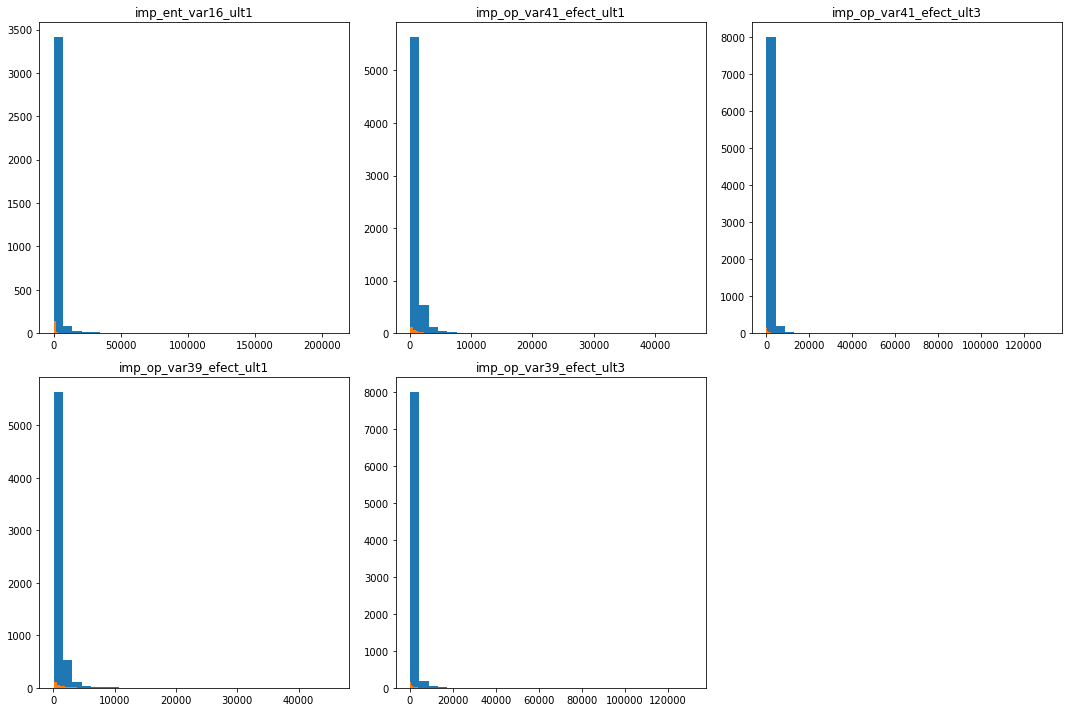

In [82]:
hist_percentile(df, imp_30_1000_remain, 0.85, 'TARGET', x = 2, y = 3, size_fig = (15,10))

##### imp_1000: imp-composed variables with more than 1000 unique values

In [83]:
# imp-composed vars with more than 1000 unique values.
imp_1000 = imp_count[imp_count >= 1000].index
df[imp_1000].describe()

imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  \
count             71213.000000             71213.000000   
mean                 77.247699               127.598088   
std                 350.042621               563.489653   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               12888.030000             21024.810000   

       imp_op_var41_comer_ult1  imp_op_var41_comer_ult3  imp_op_var41_ult1  \
count             71213.000000             71213.000000       71213.000000   
mean                 73.448321               120.688472         146.506886   
std                 329.699561               528.287454         719.934776   
min                   0.000000                 0.000000           0.000000   
25%                   0.000000                 0.000000           0.000000   
50%                   0.000000                 0.000000           0.000000   
75%                   0.000000                 0.000000           0.000000   
max               12888.030000             16566.810000       47598.090000   

       imp_op_var39_ult1  imp_var43_emit_ult1  imp_trans_var37_ult1  
count       71213.000000         7.121300e+04          7.121300e+04  
mean          149.880955         9.117754e+02          2.063431e+03  
std           735.466170         1.472740e+04          2.619239e+04  
min             0.000000         0.000000e+00          0.000000e+00  
25%             0.000000         0.000000e+00          0.000000e+00  
50%             0.000000         0.000000e+00          0.000000e+00  
75%             0.000000         0.000000e+00          0.000000e+00  
max         47598.090000         1.155003e+06          2.310003e+06

In [84]:
# Percentage of samples that are equal to 0.
df[imp_1000].apply(lambda x: x.value_counts(normalize = True)).iloc[0].round(4)*100

imp_op_var39_comer_ult1    86.03
imp_op_var39_comer_ult3    83.58
imp_op_var41_comer_ult1    86.25
imp_op_var41_comer_ult3    83.80
imp_op_var41_ult1          83.67
imp_op_var39_ult1          83.50
imp_var43_emit_ult1        92.89
imp_trans_var37_ult1       86.20
Name: 0.0, dtype: float64

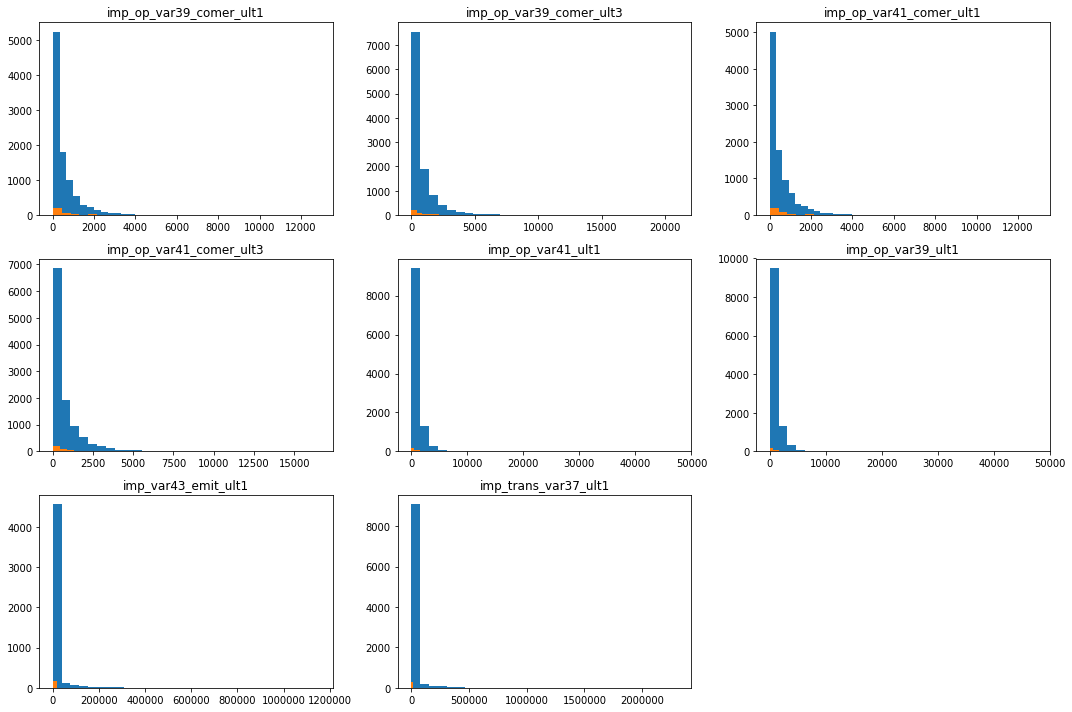

In [85]:
# Histograms with values above 90 percentile
hist_percentile(df, imp_1000, 0.75, 'TARGET', x = 3, y = 3, size_fig = (15,10))

In [86]:
# Looking for features with the same information
equals = []
for var in imp_1000:
    for var1 in imp_1000:
        if var != var1:
            if (df[var] == df[var1]).all():
                equals.append(var1)
equals

[]

#### saldo-composed variables

There are 65 variables in this group.

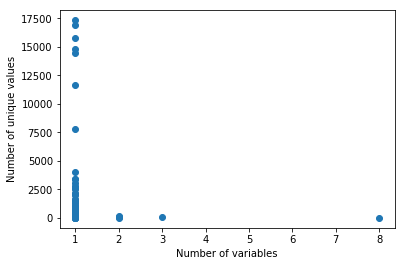

In [87]:
# The graphic shows the number with different unique values.
saldo_var_unique_values = df[names['saldo']].apply(lambda x: len(x.unique()))
data = saldo_var_unique_values.to_frame(name = 'count_unique')
data = data['count_unique'].value_counts()
plt.scatter(x = data, y = data.index)
plt.xlabel('Number of variables')
plt.ylabel('Number of unique values')
plt.show()

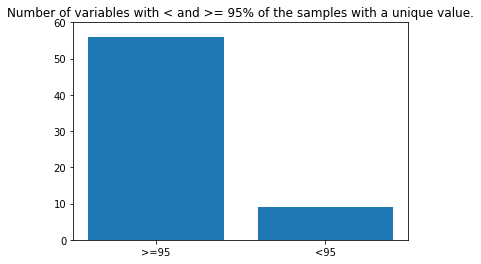

9 variables have less than 95% of the samples with a unique value. These variables will be kept in the dataset.

saldo_var5
saldo_var13
saldo_var30
saldo_var37
saldo_var42
saldo_medio_var5_hace2
saldo_medio_var5_hace3
saldo_medio_var5_ult1
saldo_medio_var5_ult3


In [88]:
# Number of variables having less and more than 95% of the samples with a unique value.
data = df[names['saldo']].apply(lambda x: x.value_counts(normalize = True)).loc[0]*100
data = data.to_frame(name = 'percentage')
height =[data[data['percentage'] >= 95]['percentage'].count(), data[data['percentage'] < 95]['percentage'].count()]
plt.bar(x = ['>=95','<95'], height = height)
plt.ylim((0,60))
plt.title('Number of variables with < and >= 95% of the samples with a unique value.')
plt.show()
print('{} variables have less than 95% of the samples with a unique value. These variables will be kept in the dataset.\n'\
      .format(data[data['percentage'] <= 95]['percentage'].count()))
print('\n'.join(data[data['percentage'] < 95]['percentage'].index))

In [89]:
# Removing the variables
saldo_var_remove = data[data['percentage'] >= 95]['percentage'].index
df_new.drop(columns=saldo_var_remove, inplace = True)
df_new.shape

(71213, 174)

##### Exploring the remaining saldo-composed variables

In [90]:
saldo_vars = [name for name in names['saldo'] if name not in saldo_var_remove]
df[saldo_vars].apply(lambda x: x.value_counts(normalize = True)).loc[0]*100

saldo_var5                32.095264
saldo_var13               94.571216
saldo_var30               24.725823
saldo_var37               93.033575
saldo_var42               26.798478
saldo_medio_var5_hace2    28.837431
saldo_medio_var5_hace3    37.640599
saldo_medio_var5_ult1     30.835662
saldo_medio_var5_ult3     30.835662
Name: 0.0, dtype: float64

In [91]:
df[saldo_vars].describe()

saldo_var5   saldo_var13   saldo_var30   saldo_var37   saldo_var42  \
count   71213.000000  7.121300e+04  7.121300e+04  71213.000000  7.121300e+04   
mean     1097.356924  6.925896e+03  1.460205e+04     39.398493  7.676150e+03   
std     10175.544204  3.965397e+04  6.500265e+04    487.672017  5.074026e+04   
min     -2895.720000  0.000000e+00 -4.942260e+03      0.000000 -4.942260e+03   
25%         0.000000  0.000000e+00  1.500000e-01      0.000000  0.000000e+00   
50%         3.000000  0.000000e+00  5.430000e+00      0.000000  3.000000e+00   
75%        90.000000  0.000000e+00  3.150000e+02      0.000000  1.500000e+02   
max    619329.150000  1.500000e+06  3.458077e+06  60000.000000  3.008077e+06   

       saldo_medio_var5_hace2  saldo_medio_var5_hace3  saldo_medio_var5_ult1  \
count            71213.000000            7.121300e+04           71213.000000   
mean              1685.197020            9.513472e+02            1149.438754   
std              12544.693401            1.021412e+04            9929.973925   
min               -128.370000           -8.040000e+00            -922.380000   
25%                  0.000000            0.000000e+00               0.000000   
50%                  3.000000            1.050000e+00               3.000000   
75%                 90.000000            1.587000e+01              90.000000   
max             812137.260000            1.542339e+06          601428.600000   

       saldo_medio_var5_ult3  
count           71213.000000  
mean             1119.226676  
std              8457.226711  
min              -476.070000  
25%                 0.000000  
50%                 2.790000  
75%                89.490000  
max            544365.570000

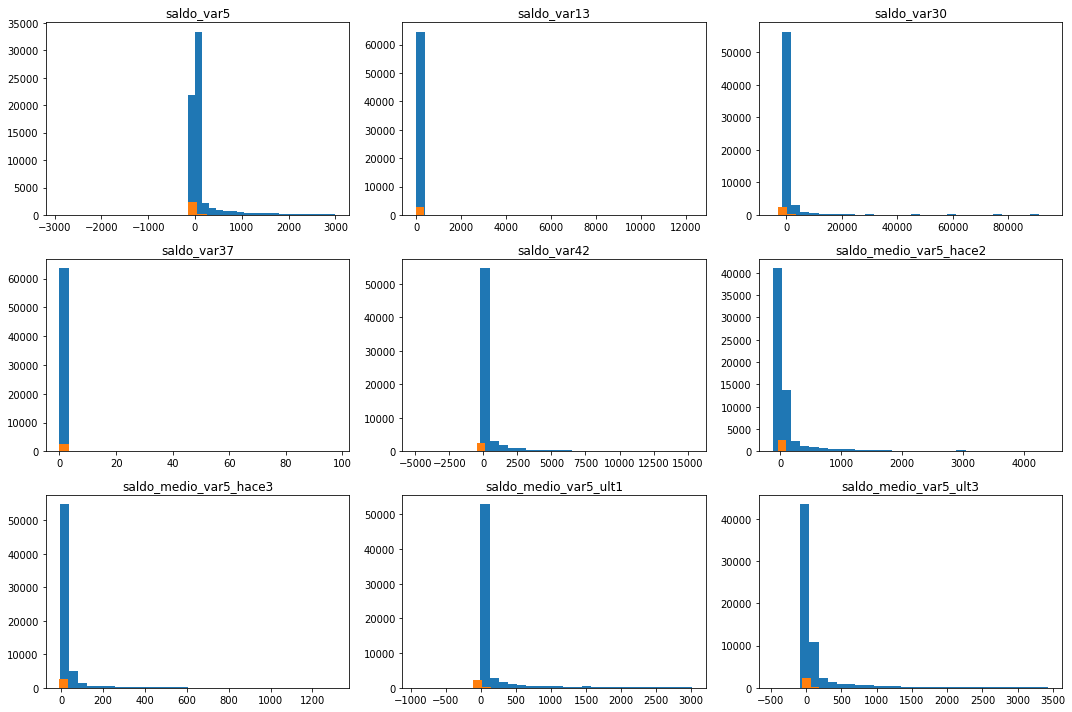

In [92]:
# Histograms of 95% of saldo_vars
bar_plot_hue_percentile(df, saldo_vars, 0.95, 'TARGET', x = 3, y = 3, size_fig = (15,10))

##### num-composed variables

There 113 variables in this group.

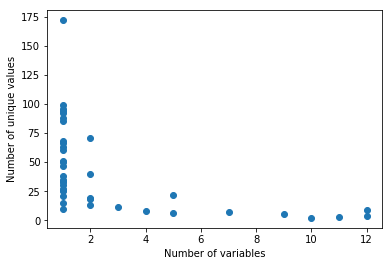

In [94]:
# Number of unique values in num-composed variables
num_unique_values = df[names['num']].apply(lambda x: len(x.unique()))
data = num_unique_values.to_frame(name = 'count_unique')
data = data['count_unique'].value_counts()
plt.scatter(x = data, y = data.index)
plt.xlabel('Number of variables')
plt.ylabel('Number of unique values')
plt.show()

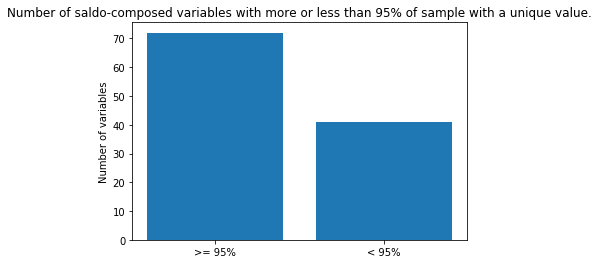

In [95]:
# Looking for num-composed variables with more than 95% of samples with a unique value. 
num_var_remove = []
num_var = []
for name in names['num']:
    count = df[name].value_counts(normalize = True).round(2)
    if (count >= .95).any():
        num_var_remove.append(name)
    else:
        num_var.append(name)
plt.bar(x = ['>= 95%', '< 95%'], height=[len(num_var_remove), len(num_var)])
plt.title('Number of saldo-composed variables with more or less than 95% of sample with a unique value.')
plt.ylabel('Number of variables')
plt.xlabel('')
plt.show()

In [96]:
df_new.drop(columns=num_var_remove, inplace = True)
df_new.shape

(71213, 102)

In [97]:
for var in num_var:
    print(df.groupby('TARGET')[var].value_counts(normalize = True).unstack('TARGET').sort_values(by=0, ascending = False).head(5)*100)
    print()

TARGET            0          1
num_var4                      
1         51.682798  24.582593
0         22.342759  54.849023
2         18.069242  11.829485
3          6.133220   6.465364
4          1.422556   2.060391

TARGET            0          1
num_var5                      
3         68.892365  37.015986
0         30.834235  62.735346
6          0.267552   0.248668
9          0.004386        NaN
15         0.001462        NaN

TARGET               0          1
num_var12_0                      
0            92.590427  97.833037
3             7.152256   2.060391
6             0.251469   0.071048
9             0.004386        NaN
15            0.001462        NaN

TARGET               0          1
num_var13_0                      
0            94.232287  99.040853
3             5.429983   0.923623
6             0.290944   0.035524
9             0.032165        NaN
12            0.010234        NaN

TARGET                      0          1
num_op_var41_hace2                      
0   

TARGET                   0          1
num_var45_hace2                      
0                61.650925  70.444050
3                11.665546   8.134991
6                 6.614228   4.795737
9                 4.448960   2.415631
12                3.213544   2.344583

TARGET                   0          1
num_var45_hace3                      
0                64.610076  64.795737
3                13.035469  15.452931
6                 6.663938   6.110124
9                 4.000117   4.760213
12                2.662359   2.309059

TARGET                  0          1
num_var45_ult1                      
0               69.409924  75.808171
3                9.922805   6.181172
6                5.570338   3.978686
9                3.476710   2.415631
12               2.358256   1.420959

TARGET                  0          1
num_var45_ult3                      
0               47.263078  52.255773
3               11.193310  11.793961
6                6.769204   6.856128
9                4.85

In [98]:
# Looking for features with the same information
equals = []
for var in num_var:
    for var1 in num_var:
        if var != var1:
            if (df[var] == df[var1]).all():
                equals.append(var1)
equals

['num_var37', 'num_var37_0']

In [99]:
df_new.drop(columns='num_var37_0', inplace= True)
df_new.shape

(71213, 101)

In [100]:
num_var.remove('num_var37_0')
len(num_var)

40

###### Exploring the remaining variables

In [101]:
num_count = df_new[num_var].apply(lambda x: len(x.unique()))
num_count

num_var4                      8
num_var5                      5
num_var12_0                   6
num_var13_0                   7
num_op_var41_hace2           51
num_op_var41_ult1            68
num_op_var41_ult3            96
num_op_var39_hace2           50
num_op_var39_ult1            71
num_op_var39_ult3            99
num_var30_0                  11
num_var30                     9
num_var35                    13
num_var37                    22
num_var39_0                   9
num_var41_0                   9
num_var42_0                   8
num_var42                     7
num_var22_hace2              22
num_var22_hace3              19
num_var22_ult1               18
num_var22_ult3               33
num_med_var22_ult3           15
num_med_var45_ult3           71
num_meses_var5_ult3           4
num_meses_var39_vig_ult3      4
num_op_var39_comer_ult1      63
num_op_var39_comer_ult3      92
num_op_var41_comer_ult1      60
num_op_var41_comer_ult3      88
num_op_var41_efect_ult1      25
num_op_v

###### num_20: num-composed variables that have until 20 unique variables

In [102]:
num_20 = num_count[num_count <= 20].index
num_20

Index(['num_var4', 'num_var5', 'num_var12_0', 'num_var13_0', 'num_var30_0',
       'num_var30', 'num_var35', 'num_var39_0', 'num_var41_0', 'num_var42_0',
       'num_var42', 'num_var22_hace3', 'num_var22_ult1', 'num_med_var22_ult3',
       'num_meses_var5_ult3', 'num_meses_var39_vig_ult3'],
      dtype='object')

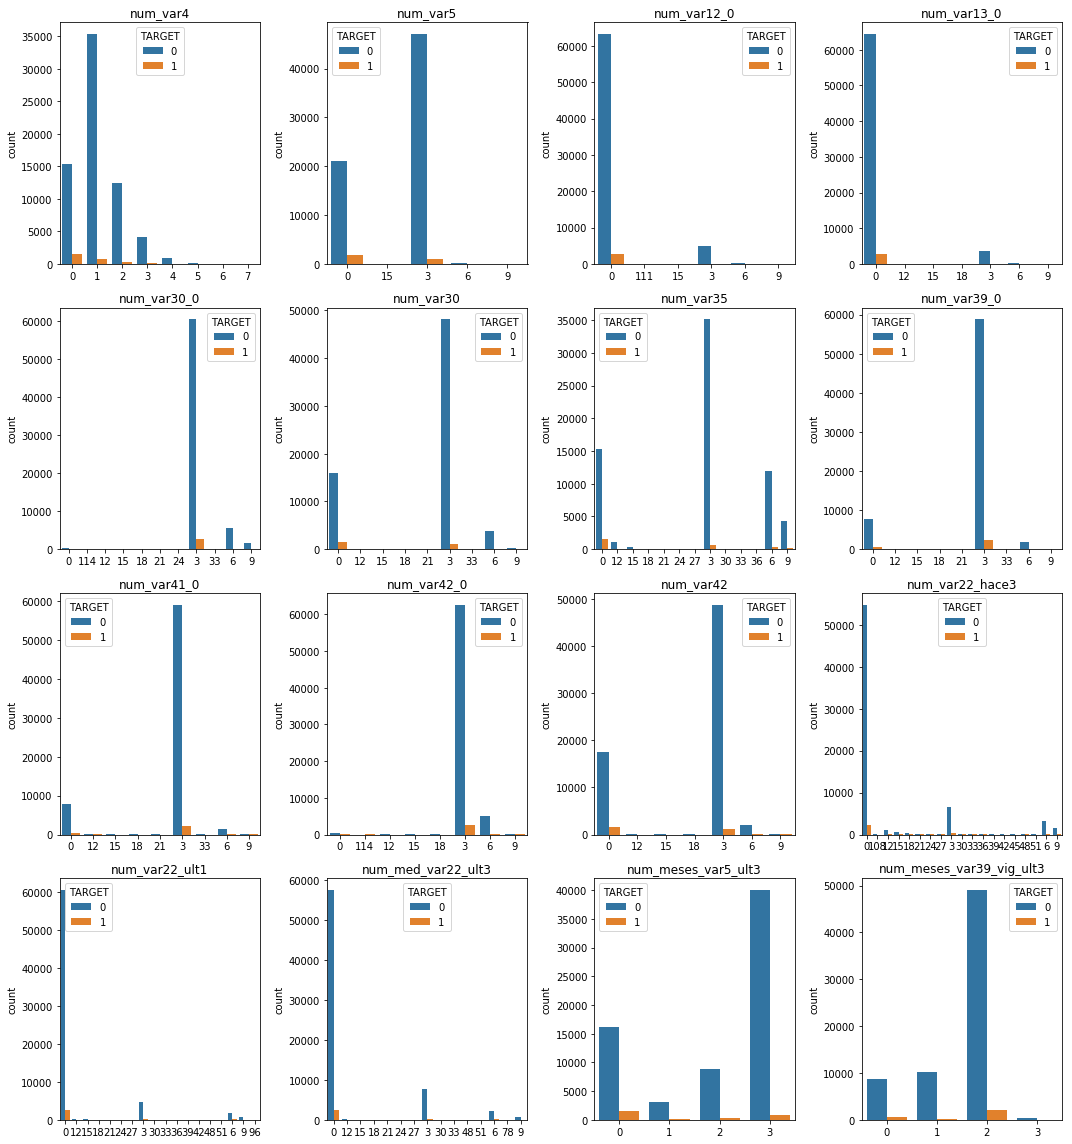

In [103]:
bar_plots_hue_categorical(df_new, num_20, 'TARGET', x = 4, y = 4, size_fig = (15,16))

##### num_20_50

In [104]:
num_20_50 = num_count[(num_count > 20)&(num_count <= 50)].index

In [105]:
df_new[num_20_50].describe()

num_op_var39_hace2     num_var37  num_var22_hace2  num_var22_ult3  \
count        71213.000000  71213.000000     71213.000000    71213.000000   
mean             1.730836      0.447053         1.385604        3.247202   
std              7.622457      2.312817         3.547634        6.360470   
min              0.000000      0.000000         0.000000        0.000000   
25%              0.000000      0.000000         0.000000        0.000000   
50%              0.000000      0.000000         0.000000        0.000000   
75%              0.000000      0.000000         0.000000        3.000000   
max            249.000000    114.000000       123.000000      234.000000   

       num_op_var41_efect_ult1  num_op_var41_efect_ult3  \
count             71213.000000             71213.000000   
mean                  0.767978                 1.293977   
std                   3.311980                 5.321784   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                  90.000000               156.000000   

       num_op_var39_efect_ult1  num_op_var39_efect_ult3  num_var43_emit_ult1  \
count             71213.000000             71213.000000         71213.000000   
mean                  0.770632                 1.297895             0.419334   
std                   3.327791                 5.343146             2.286990   
min                   0.000000                 0.000000             0.000000   
25%                   0.000000                 0.000000             0.000000   
50%                   0.000000                 0.000000             0.000000   
75%                   0.000000                 0.000000             0.000000   
max                  90.000000               156.000000           180.000000   

       num_var43_recib_ult1  
count          71213.000000  
mean               0.869968  
std                3.669251  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max              264.000000

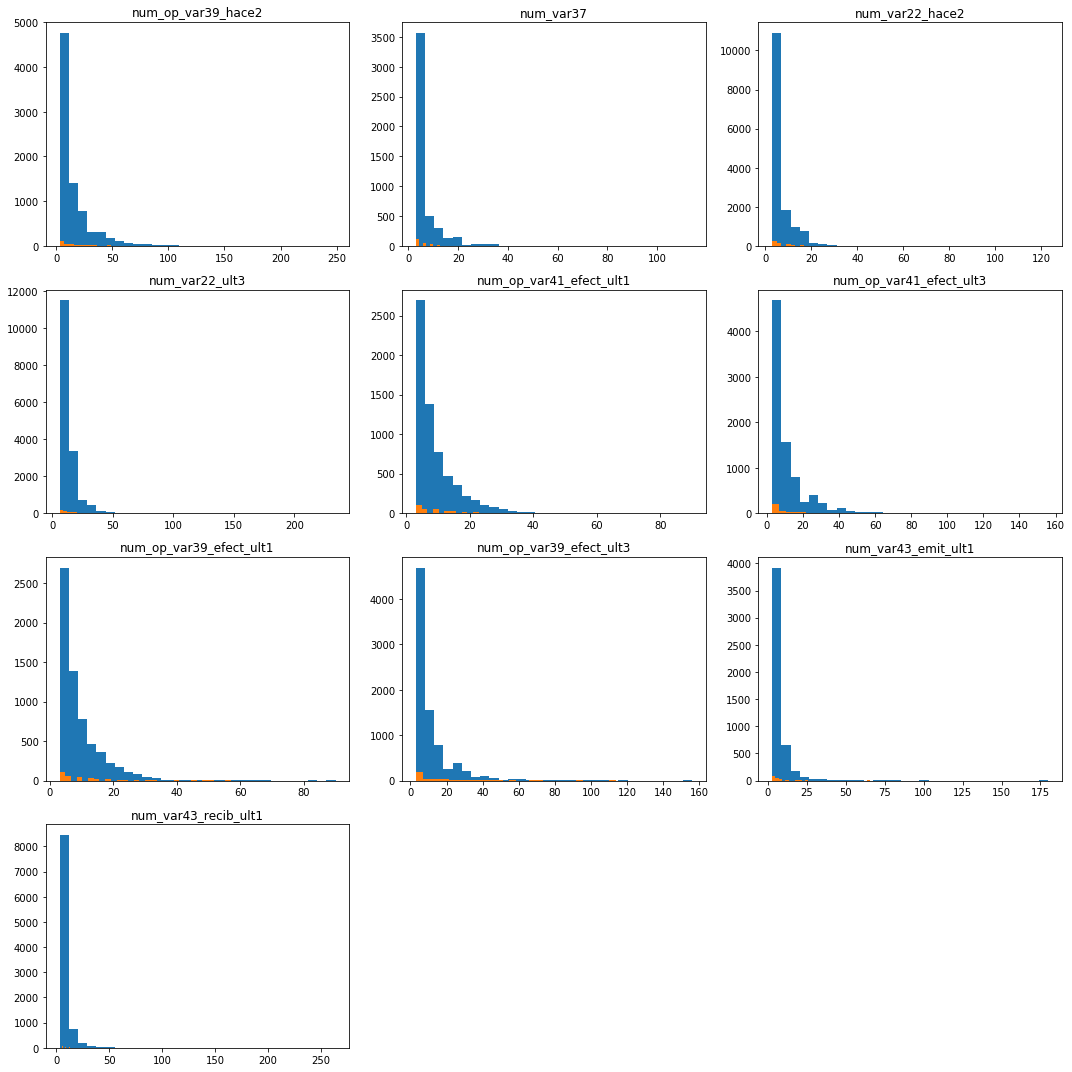

In [106]:
# Histogram of the last quartile of the data 
hist_percentile(df_new, num_20_50, .75, 'TARGET', x = 4, y = 3, size_fig = (15,15))

##### num_50

In [107]:
num_50 = num_count[num_count > 50].index
df_new[num_50].describe()

num_op_var41_hace2  num_op_var41_ult1  num_op_var41_ult3  \
count        71213.000000       71213.000000       71213.000000   
mean             1.709224           3.051816           4.861303   
std              7.552877          11.221531          17.409747   
min              0.000000           0.000000           0.000000   
25%              0.000000           0.000000           0.000000   
50%              0.000000           0.000000           0.000000   
75%              0.000000           0.000000           0.000000   
max            249.000000         468.000000         468.000000   

       num_op_var39_ult1  num_op_var39_ult3  num_med_var45_ult3  \
count       71213.000000       71213.000000        71213.000000   
mean            3.112690           4.944884            4.295999   
std            11.455138          17.702526           11.241511   
min             0.000000           0.000000            0.000000   
25%             0.000000           0.000000            0.000000   
50%             0.000000           0.000000            0.000000   
75%             0.000000           0.000000            3.000000   
max           468.000000         468.000000          267.000000   

       num_op_var39_comer_ult1  num_op_var39_comer_ult3  \
count             71213.000000             71213.000000   
mean                  2.342943                 3.850547   
std                   9.416156                15.384623   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                 438.000000               600.000000   

       num_op_var41_comer_ult1  num_op_var41_comer_ult3  num_var45_hace2  \
count             71213.000000             71213.000000     71213.000000   
mean                  2.262901                 3.695940         5.753598   
std                   9.073814                14.580532        14.908186   
min                   0.000000                 0.000000         0.000000   
25%                   0.000000                 0.000000         0.000000   
50%                   0.000000                 0.000000         0.000000   
75%                   0.000000                 0.000000         6.000000   
max                 438.000000               438.000000       342.000000   

       num_var45_hace3  num_var45_ult1  num_var45_ult3  
count     71213.000000    71213.000000    71213.000000  
mean          4.149608        4.656945       14.560151  
std          10.713351       14.838840       34.218562  
min           0.000000        0.000000        0.000000  
25%           0.000000        0.000000        0.000000  
50%           0.000000        0.000000        3.000000  
75%           3.000000        3.000000       15.000000  
max         339.000000      510.000000      801.000000

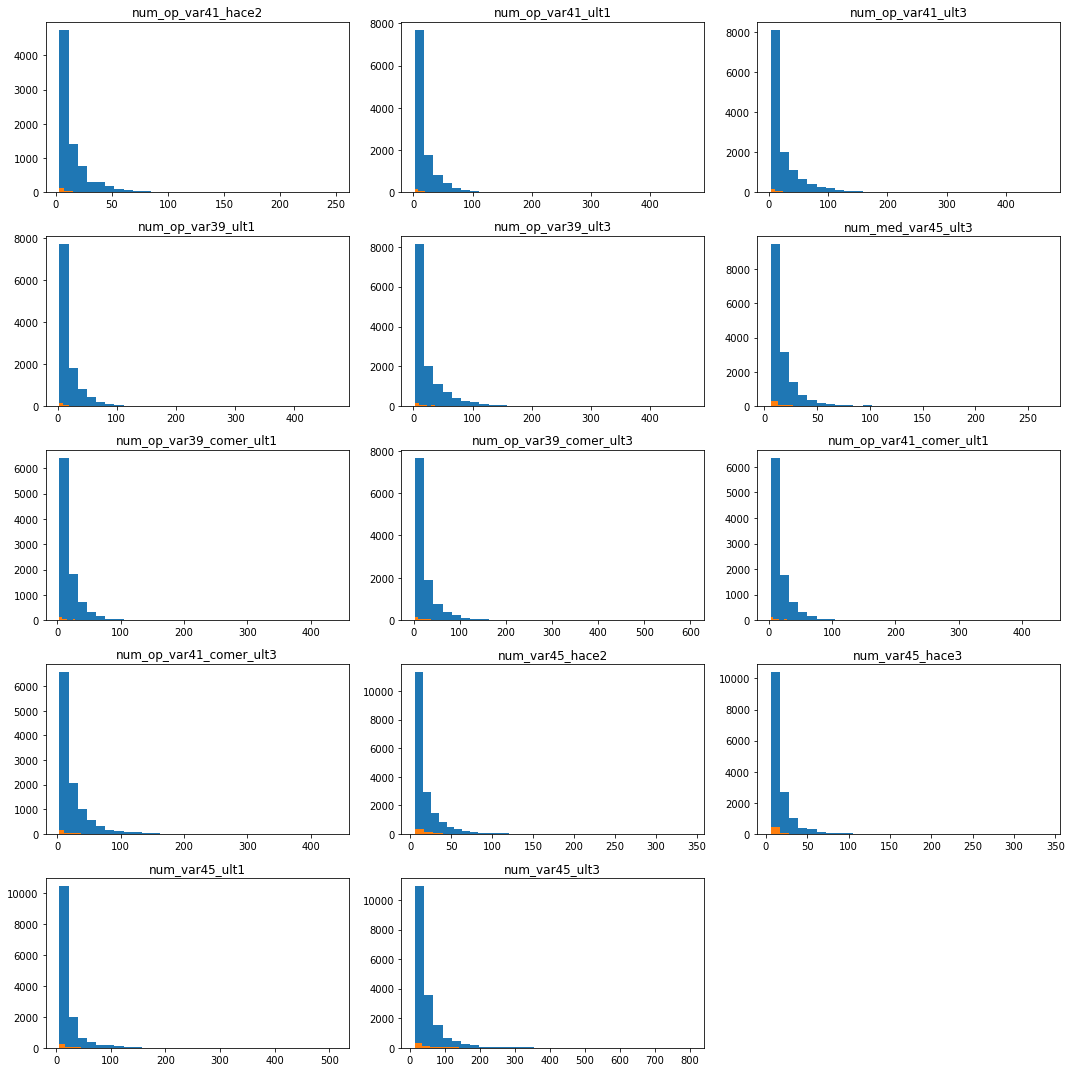

In [108]:
# Histogram of the last quartile of the data 
hist_percentile(df_new, num_50, .75, 'TARGET', x = 5, y = 3, size_fig = (15,15))

### Saving df_new dataset

In [ ]:
# Saving df_new dataset as a csv file
df_new.to_csv('df_new.csv', index = False)

### Importing new dataset

In [11]:
# Import df_new.csv
df_new = pd.read_csv('df_new.csv')

In [6]:
# Importing original data
df = pd.read_csv('train.csv')
df.drop(columns = 'ID', inplace = True)

## Splitting the data

In [13]:
# Splitting the data

def split_data(dataframe):
    from sklearn.model_selection import train_test_split

    # Data
    X = dataframe.drop(columns = ['TARGET'])
    y = dataframe['TARGET']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    return X_train, X_test, y_train, y_test

# Splitting df_new data
x_train, x_test, y_train, y_test = split_data(df)
x_new_train, x_new_test, y_new_train, y_new_test = split_data(df_new)

In [8]:
print('Evaluating the fractions of target categories in the splitted data.')
print('Fraction in the original data: \n{}'.format(df_new['TARGET'].value_counts()*100/df_new.shape[0]))
print()
values, count = np.unique(y_new_train, return_counts= True)
count = np.round(count * 100 / len(y_new_train),2)
print('Fraction in the train data: \n{} {} \n{} {}'.format(values[0], count[0], values[1], count[1]))
print()

values1, count1 = np.unique(y_new_test, return_counts= True)
count1 = np.round(count1 * 100 / len(y_new_test), 2)
print('Fraction in the train data: \n{} {} \n{} {}'.format(values[0], count1[0], values[1], count1[1]))

Evaluating the fractions of target categories in the splitted data.
Fraction in the original data: 
0    96.04707
1     3.95293
Name: TARGET, dtype: float64

Fraction in the train data: 
0 96.03 
1 3.97

Fraction in the train data: 
0 96.09 
1 3.91


## Comparing most important variables in df_new and df datasets

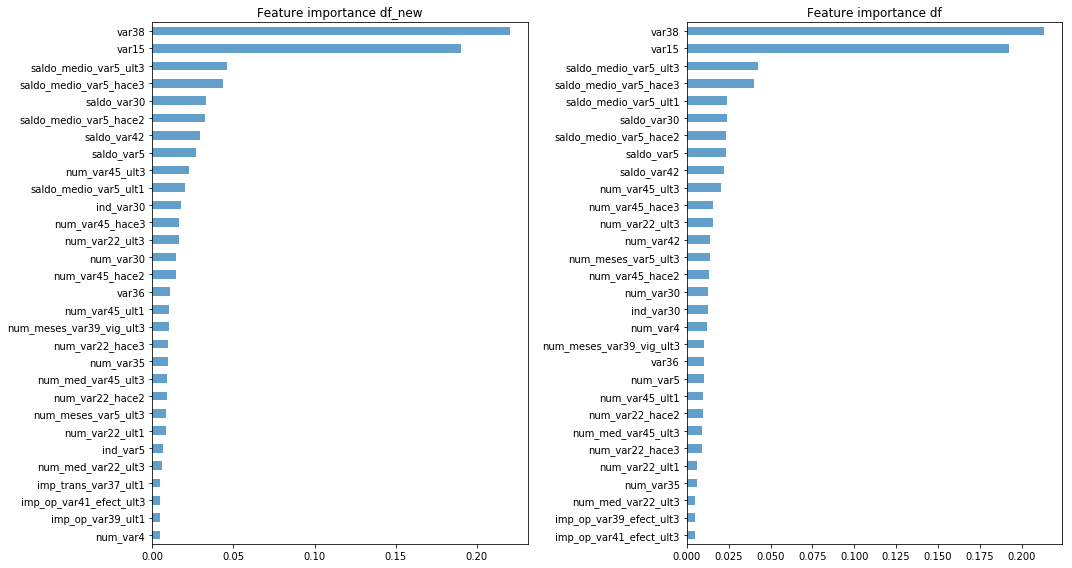

Performance with df_new dataset - cross validation: 0.7493318867317605 +- 0.017396566424230223, test data: 0.7589225196440758
Performance with df dataset - cross validation: 0.7410687505264326 +- 0.011343354228141036, test data: 0.7518901330098366


In [27]:
# Let's compare the results using df_new and df datasets

def feature_selection_rf(dataframe, X_train, y_train, X_test, y_test):

    rf = RandomForestClassifier(class_weight= 'balanced', random_state=42)
    rf.fit(X_train, y_train)
    
    # Preparing the data to plot
    feature_imp = pd.Series(data = rf.feature_importances_, index = X_train.columns)
    feature_imp.sort_values(ascending = True, inplace = True)
    
    # Evaluating train performance
    skf = StratifiedKFold(n_splits=5, random_state = 42)
    val_cv = cross_val_score(estimator = rf, X = X_train, y= y_train, scoring = 'roc_auc', cv = skf)

    # Evaluating test performance 
    pred = rf.predict_proba(X_test)
    from sklearn.metrics import roc_auc_score
    p_test = roc_auc_score(y_test, pred[:,1])
    
    return feature_imp, val_cv, p_test

feature_imp_df_new, val_new_train, p_new_test = feature_selection_rf(df_new, x_new_train, y_new_train, x_new_test, y_new_test)
feature_imp_df, val_train, p_test = feature_selection_rf(df, x_train, y_train, x_test, y_test)

# Plot
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
feature_imp_df_new.tail(30).plot(kind = 'barh',  alpha = 0.7)
plt.title('Feature importance df_new')
plt.subplot(1,2,2)
feature_imp_df.tail(30).plot(kind = 'barh',  alpha = 0.7)
plt.title('Feature importance df')
plt.tight_layout()
plt.show()

# Evaluation
print('Performance with df_new dataset - cross validation: {} +- {}, test data: {}'.format(np.mean(val_new_train),
                                                                                           np.std(val_new_train),
                                                                                           p_new_test))
print('Performance with df dataset - cross validation: {} +- {}, test data: {}'.format(np.mean(val_train),
                                                                                 np.std(val_train),
                                                                                 p_test))

In [28]:
len([i for i in feature_imp_df_new.tail(30).index if i in feature_imp_df.tail(30).index])

27

Results were similar using df and df_new datasets. Variables is not ranked equally, however 27 variables in feature_imp_df_new are also in feature_imp_df, considering the 30 most important variables. This might be an indication that the removed variables were irrelevant to build the predictive model. Considering these results, df_new dataset will be used from now on.

## 1. Model 1 - Decision Tree Classifier

### 1.1 Base model

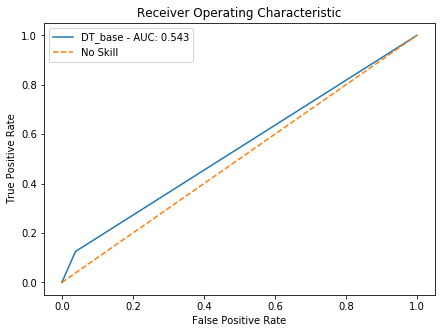

In [11]:
# Performance of a base model.
steps = [[('model', DecisionTreeClassifier(class_weight='balanced',random_state=42))]]
label = ['DT_base']

best_thresolds = train_roc_plot(steps, label, x_new_train, y_new_train, x_new_test, y_new_test)

The base decision tree model presented similar performance of a no skill model.

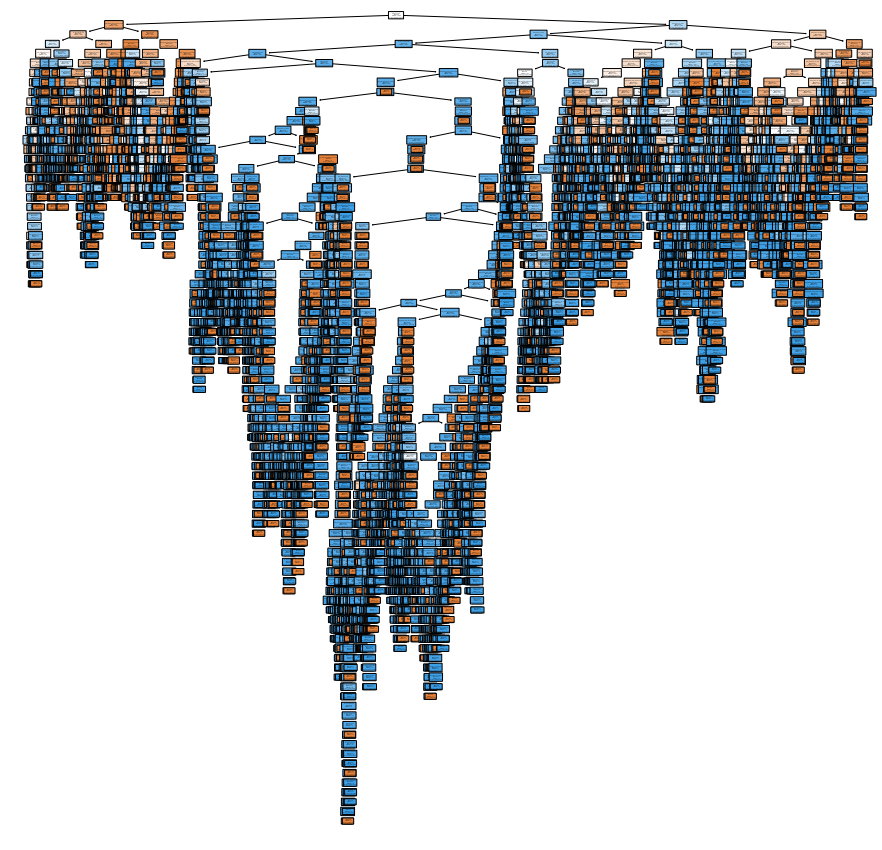

In [22]:
clf_base = DecisionTreeClassifier(class_weight='balanced',random_state=42).fit(x_new_train, y_new_train)
plt.figure(figsize = (15,15))
plot_tree(clf_base, filled = True, rounded = True, class_names = ['Satisfied', 'Unsatisfied'], feature_names=x_new_train.columns)
plt.show()

In [13]:
# ROC-AUC score
print('ROC-AUC for training data: ', np.round(roc_auc_score(y_new_train, clf_base.predict_proba(x_new_train)[:,1]), 3))
print('ROC-AUC for testing data: ', np.round(roc_auc_score(y_new_test, clf_base.predict_proba(x_new_test)[:,1]), 3))

ROC-AUC for training data:  1.0
ROC-AUC for testing data:  0.543


This model definitely suffers of overfitting. Let's restrict the growth of the tree by maximize the max_depth hyperparameter. 

### 1.2 - Optimizing max_depth

In [76]:
# Training the model with different max_depth
tuned_param = {'max_depth': [1,2,3,4,5,6,10,20]}

# GridSearch
gridsh_dt = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = 'balanced', random_state = 42), 
                     param_grid = tuned_param, 
                     scoring = 'roc_auc', 
                     cv = StratifiedKFold(5), n_jobs= -1).fit(x_new_train, y_new_train)

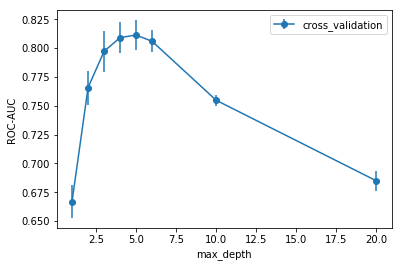

In [77]:
dt_grid = pd.DataFrame(gridsh_dt.cv_results_)[['param_max_depth','mean_test_score','std_test_score']]
# Plot
fig, ax = plt.subplots()
ax.set_xlabel('max_depth')
ax.set_ylabel('ROC-AUC')
ax.errorbar('param_max_depth', 'mean_test_score', yerr = 'std_test_score',  marker = 'o', label = 'cross_validation', data = dt_grid)
ax.legend()
plt.show()

In [16]:
gridsh_dt.best_score_

0.8113457996095903

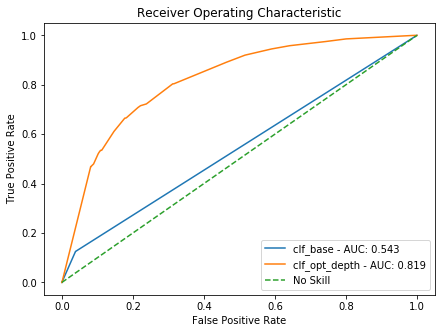

[('clf_base', 0.9603001063210896), ('clf_opt_depth', 0.46872743325138316)]

In [17]:
# ROC Curve
predictions = [clf_base.predict_proba(x_new_test),
              gridsh_dt.best_estimator_.predict_proba(x_new_test)]

labels = ['clf_base', 'clf_opt_depth']
roc_plot(predictions, labels, y_new_test)

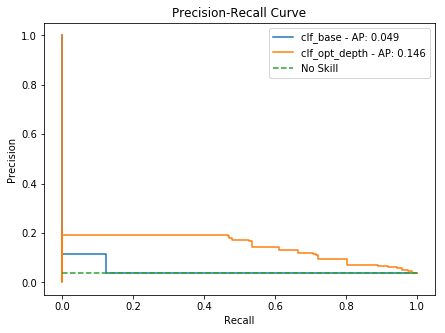

[('clf_base', 0.9603001063210896), ('clf_opt_depth', 0.8815553826534135)]

In [18]:
# PRC curve
prc_plot(predictions, labels, y_new_test)

In [19]:
# ROC-AUC score
print('ROC-AUC for training data: ', np.round(roc_auc_score(y_new_train, gridsh_dt.best_estimator_.predict_proba(x_new_train)[:,1]), 3))
print('ROC-AUC for testing data: ', np.round(roc_auc_score(y_new_test, gridsh_dt.best_estimator_.predict_proba(x_new_test)[:,1]), 3))

ROC-AUC for training data:  0.835
ROC-AUC for testing data:  0.819


A much better model was obtained by optimizing the max_depth and the overfitting was eliminated. 

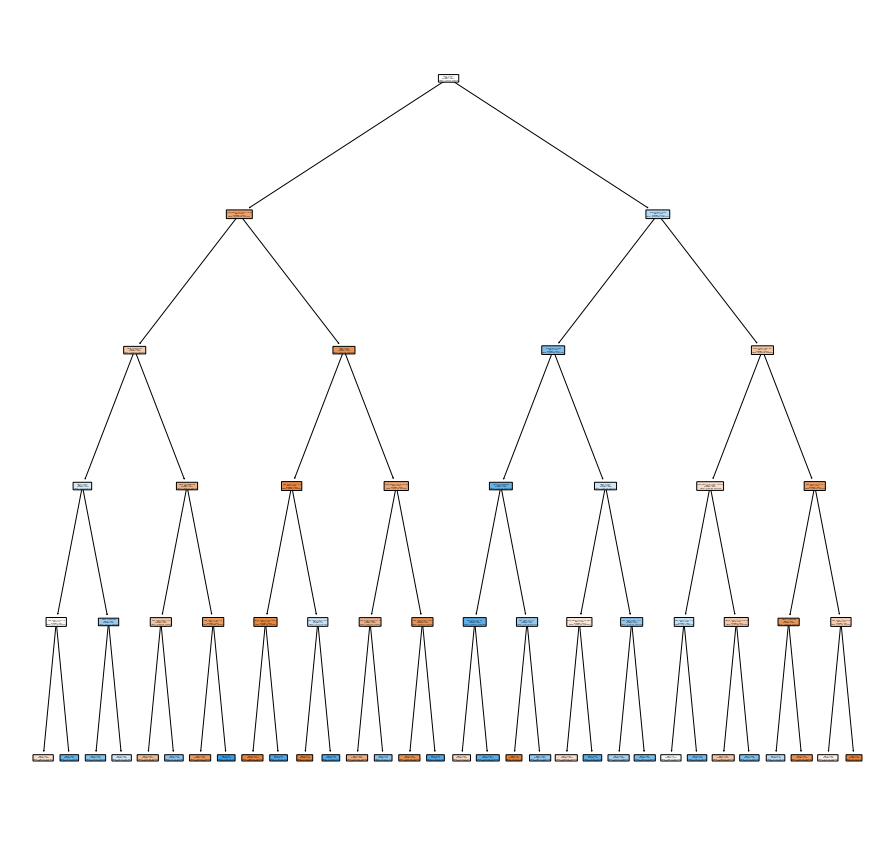

In [38]:
plt.figure(figsize = (15,15))
plot_tree(gridsh_dt.best_estimator_, filled = True, rounded = True, class_names = ['Satisfied', 'Unsatisfied'], feature_names=x_new_train.columns)
plt.show()

In [44]:
# Variable importance
clf_opt_depth_varImp = pd.Series(data = gridsh_dt.best_estimator_.feature_importances_, index = x_new_train.columns)
clf_opt_depth_varImp.sort_values(ascending = False, inplace = True)
clf_opt_depth_varImp[:20]

var15                     0.437283
saldo_var30               0.312420
saldo_var5                0.068232
saldo_medio_var5_hace2    0.059649
var38                     0.046189
num_var22_ult3            0.016525
imp_op_var39_ult1         0.008905
num_var22_hace3           0.006877
saldo_medio_var5_ult3     0.005988
num_var30_0               0.005484
saldo_medio_var5_ult1     0.005146
num_var42_0               0.005085
num_var22_ult1            0.004544
num_var45_ult1            0.003885
num_var45_hace2           0.003525
num_var45_ult3            0.003068
num_var22_hace2           0.002593
imp_op_var41_ult1         0.002338
num_op_var41_hace2        0.002266
ind_var25_cte             0.000000
dtype: float64

Now, I will use recursive feature elimination (RFE) in order to find the variables that might result in the most information gain and built another model using only these variables.

### 1.3 Finding the most important features with recursive feature elimination with cross-validation (RFECV)

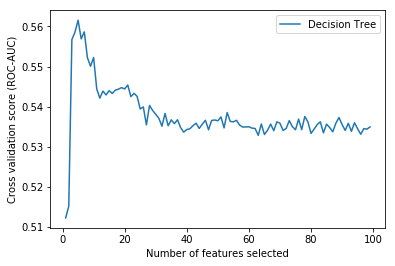

In [8]:
# Model
dt = DecisionTreeClassifier(class_weight= 'balanced')

# RFECV search
# mininum number of features to consider
min_features_to_select = 1  
rfecv = RFECV(estimator = dt, step=1, cv=StratifiedKFold(5),
              scoring='roc_auc',
              min_features_to_select=min_features_to_select)
rfecv.fit(x_new_train, y_new_train)

# Plot the performance x number of features selected
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (ROC-AUC)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_, label = 'Decision Tree')
plt.legend()
plt.show()

In [9]:
print('Decision Tree - Best number of features: {}'.format(rfecv.n_features_))
dc_features = x_new_train.columns[rfecv.ranking_ == 1]
dc_features

Decision Tree - Best number of features: 5


Index(['var15', 'saldo_var30', 'saldo_medio_var5_hace3',
       'saldo_medio_var5_ult3', 'var38'],
      dtype='object')

In [9]:
dc_features = ['var15', 'saldo_var30', 'saldo_medio_var5_hace3',
       'saldo_medio_var5_ult3', 'var38']

### 1.4 Max_depth customization

Now let's use the most important features obtained before and customize the max_depth hyperparameter in order to improve the model prediction and evaluate overfitting.

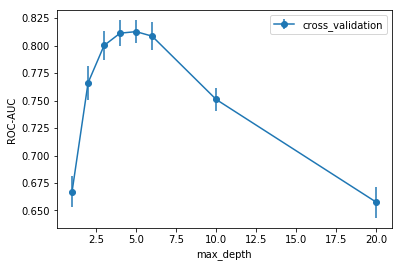

In [10]:
# Training the model with different max_depth
tuned_param = {'max_depth': [1,2,3,4,5,6,10,20]}

# GridSearch
gridsh_dt_dc_features = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = 'balanced', random_state = 42), 
                     param_grid = tuned_param, 
                     scoring = 'roc_auc', 
                     cv = StratifiedKFold(5), n_jobs= -1).fit(x_new_train[dc_features], y_new_train)

dt_grid = pd.DataFrame(gridsh_dt_dc_features.cv_results_)[['param_max_depth','mean_test_score','std_test_score']]
# Plot
fig, ax = plt.subplots()
ax.set_xlabel('max_depth')
ax.set_ylabel('ROC-AUC')
ax.errorbar('param_max_depth', 'mean_test_score', yerr = 'std_test_score',  marker = 'o', label = 'cross_validation', data = dt_grid)
ax.legend()
plt.show()

In [20]:
gridsh_dt_dc_features.best_params_

{'max_depth': 5}

In [21]:
# ROC-AUC score
print('ROC-AUC for training data: ', np.round(roc_auc_score(y_new_train, gridsh_dt_dc_features.best_estimator_.predict_proba(x_new_train[dc_features])[:,1]), 3))
print('ROC-AUC for testing data: ', np.round(roc_auc_score(y_new_test, gridsh_dt_dc_features.best_estimator_.predict_proba(x_new_test[dc_features])[:,1]), 3))

ROC-AUC for training data:  0.831
ROC-AUC for testing data:  0.815


By using the most important variables returned by RFE, the optimum max_depth is also 5.

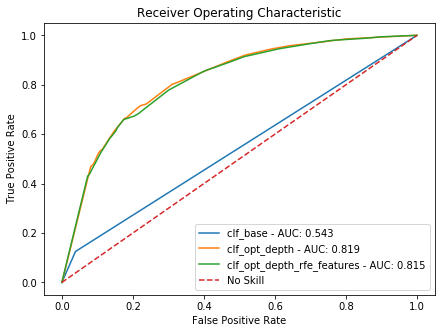

In [22]:
# ROC Curve
predictions = [clf_base.predict_proba(x_new_test),
              gridsh_dt.best_estimator_.predict_proba(x_new_test),
              gridsh_dt_dc_features.best_estimator_.predict_proba(x_new_test[dc_features])]

labels = ['clf_base', 'clf_opt_depth', 'clf_opt_depth_rfe_features']
_ = roc_plot(predictions, labels, y_new_test)

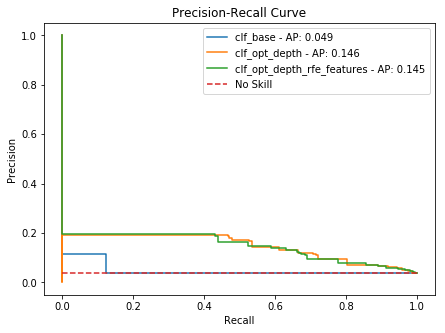

In [23]:
_ = prc_plot(predictions, labels, y_new_test)

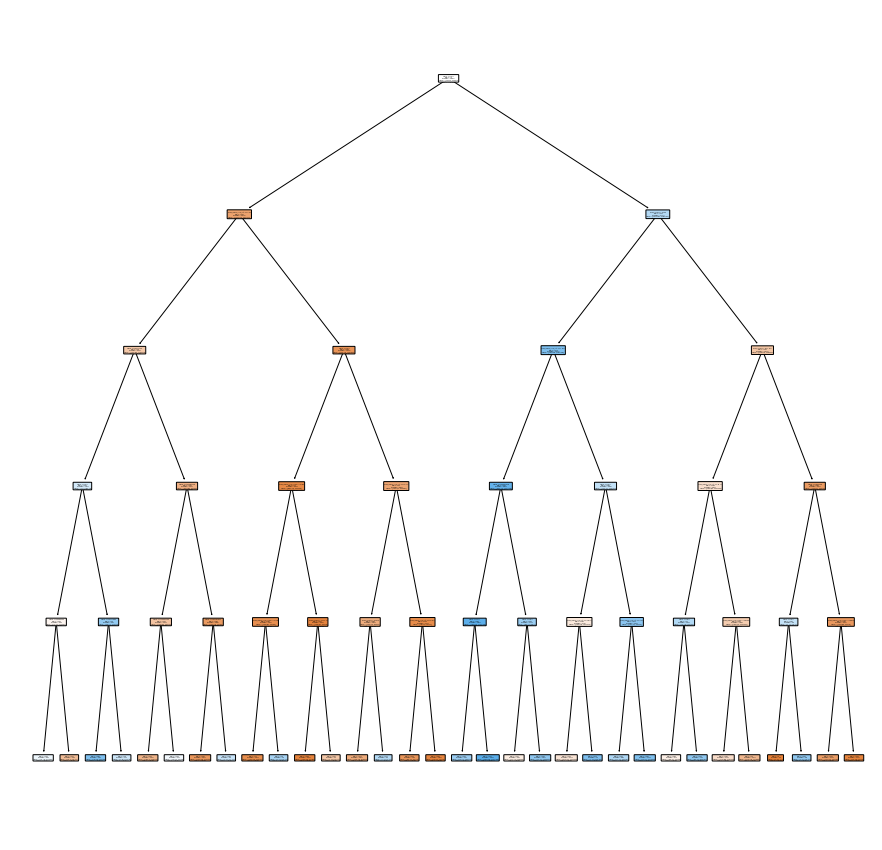

In [24]:
plt.figure(figsize = (15,15))
plot_tree(gridsh_dt_dc_features.best_estimator_, filled = True, rounded = True, 
          class_names = ['Satisfied', 'Unsatisfied'], feature_names=dc_features)
plt.show()

### 1.5 Decision tree model optimization using Cost Complexity Pruning

This is a simple way to avoid overfitting and maximize the performance in decision trees, whithout worrying about prior feature selection (in random forests, though, it might be important to perform a prior feature selection, since irrelevant attributes might be randomly selected to build trees in the forest). Optimizing ccp_alpha hyperparameter is very effective in pruning the trees, limiting its growth. The larger ccp_alpha value is, the smaller is the tree (fewer number of nodes). Pruning prevents overfitting by increasing the impurity in the nodes.

In [ ]:
# ***** This cell might take lots of time to run, the results were saved in gridsc_dt_prune.csv file, run the next cell
# in order to see the results. *****

# Getting the values for alpha
clf_dc = DecisionTreeClassifier(class_weight= 'balanced', random_state = 42)
path = clf_dc.cost_complexity_pruning_path(x_new_train, y_new_train)
ccp_alpha, impurities = path.ccp_alphas, path.impurities

ccp_alpha = ccp_alpha[ccp_alpha>0]
tuned_param = {'ccp_alpha': ccp_alpha}

# GridSearch
grids1 = GridSearchCV(estimator = clf_dc, 
                     param_grid = tuned_param, 
                     scoring = 'roc_auc', 
                     cv = 5, n_jobs= 4).fit(x_new_train, y_new_train)

# Creating a dataframe with the GridSearchCV results
gridsc_dt_prune = pd.DataFrame(grids1.cv_results_)

# Saving the results in a csv file
#gridsc_dt_prune.to_csv('gridsc_dt_prune')

In [8]:
gridsc_dt_prune = pd.read_csv('gridsc_dt_prune')
gridsc_dt_prune = gridsc_dt_prune[['param_ccp_alpha','mean_test_score','std_test_score','rank_test_score']]
gridsc_dt_prune.tail()

param_ccp_alpha  mean_test_score  std_test_score  rank_test_score
1915         0.006211         0.781784        0.017857               47
1916         0.007130         0.779652        0.018540               49
1917         0.011926         0.766251        0.019479               67
1918         0.048397         0.699416        0.047558              333
1919         0.069143         0.593711        0.076681              774

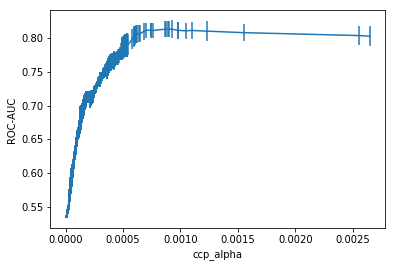

In [9]:
plt.errorbar(x = 'param_ccp_alpha', y ='mean_test_score', yerr = 'std_test_score', 
             data = gridsc_dt_prune[gridsc_dt_prune['param_ccp_alpha'] <= 0.003])
plt.xlabel('ccp_alpha')
plt.ylabel('ROC-AUC')
plt.show()

In [10]:
best_ccp_alpha = gridsc_dt_prune[gridsc_dt_prune['rank_test_score'] == 1]['param_ccp_alpha'].values[0]
best_ccp_alpha

0.0008699213346656104

### 1.6 Decision Tree Model Pruned

In [28]:
clf_prune = DecisionTreeClassifier(class_weight= 'balanced', ccp_alpha= best_ccp_alpha)
clf_prune.fit(x_new_train, y_new_train)
pred = clf_prune.predict_proba(x_new_test)
# ROC-AUC score
print('ROC-AUC for training data: ', np.round(roc_auc_score(y_new_train, clf_prune.predict_proba(x_new_train)[:,1]), 3))
print('ROC-AUC for testing data: ', np.round(roc_auc_score(y_new_test, clf_prune.predict_proba(x_new_test)[:,1]), 3))

ROC-AUC for training data:  0.831
ROC-AUC for testing data:  0.813


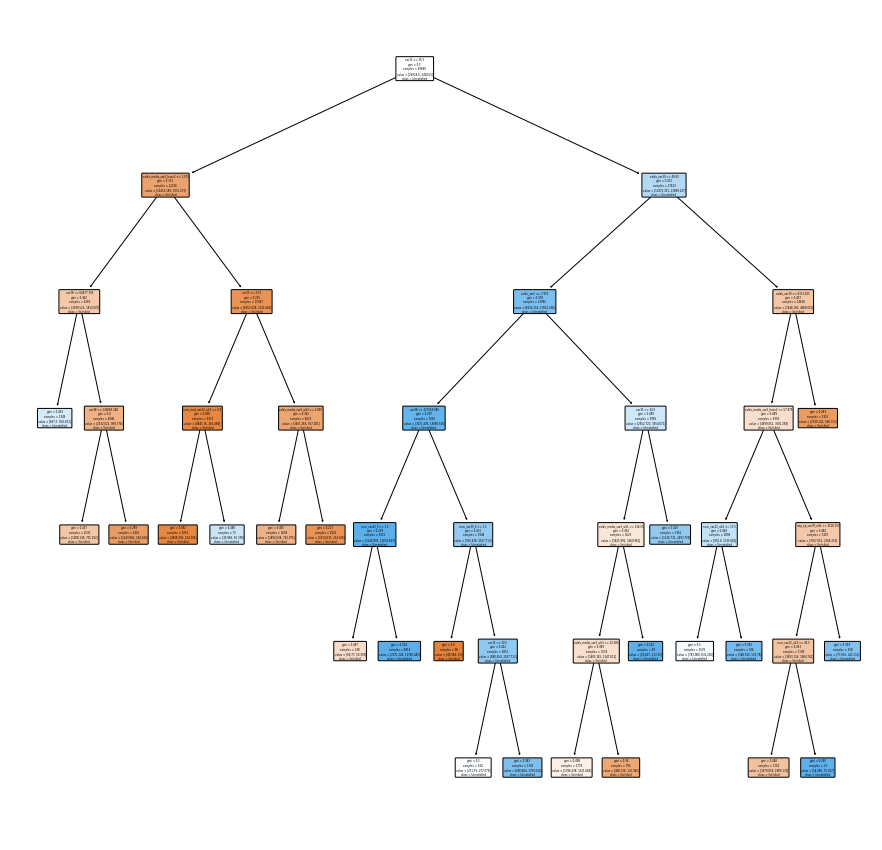

In [29]:
plt.figure(figsize = (15,15))
plot_tree(clf_prune, filled = True, rounded = True, class_names = ['Satisfied', 'Unsatisfied'], feature_names=x_new_train.columns)
plt.show()

### 1.7 Decision Tree max_depth customized + RFE vars x Decision Tree Pruned

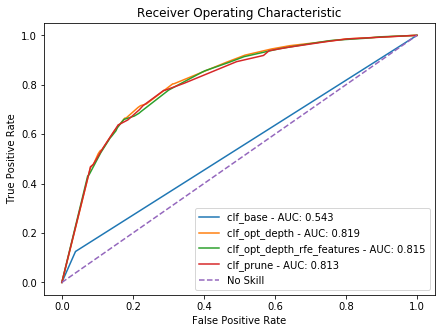

[('clf_base', 0.9603001063210896),
 ('clf_opt_depth', 0.46872743325138316),
 ('clf_opt_depth_rfe_features', 0.6241896392841305),
 ('clf_prune', 0.4666222761215037)]

In [30]:
# ROC Curve
predictions = [clf_base.predict_proba(x_new_test),
               gridsh_dt.best_estimator_.predict_proba(x_new_test),
              gridsh_dt_dc_features.best_estimator_.predict_proba(x_new_test[dc_features]),
              clf_prune.predict_proba(x_new_test)]

labels = ['clf_base', 'clf_opt_depth', 'clf_opt_depth_rfe_features', 'clf_prune']
roc_plot(predictions, labels, y_new_test)

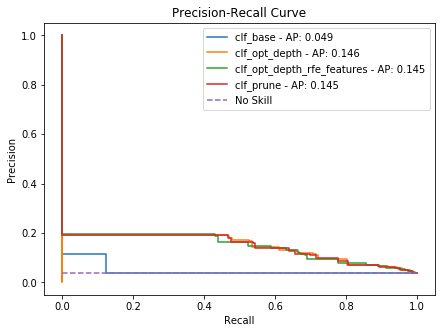

[('clf_base', 0.9603001063210896),
 ('clf_opt_depth', 0.8815553826534135),
 ('clf_opt_depth_rfe_features', 0.8559244702529486),
 ('clf_prune', 0.850557250925039)]

In [31]:
prc_plot(predictions, labels, y_new_test)

In this section two different procedures were used to generalize a decision tree model:
1) Optimization of max_depth hyperparameter (model called clf_opt_depth);
2) RFE + optimization of max_depth;
3) Cost complexity pruning (model called clf_prune);

There is not much difference between the models. Considering the ROC and PRC curves above, clf_opt_depth model will be selected as the 'best' decision tree model.

In [7]:
# Saving the model
pickle.dump(clf_opt_depth, open('models/decision_tree_model', 'wb'))

### 1.8 Comparing the performances of clf_dt with max_depth = 5 and clf_prune with test set provided by Kaggle.

In [10]:
# This test_set do not have the labels
test_set = pd.read_csv('test.csv')
test_set = test_set[df_new.columns[:-1]]

In [35]:
clf_opt_depth = gridsh_dt.best_estimator_
prediction = clf_opt_depth.predict_proba(x_new_test)

# Considering the best threshold to label the classes
pred = np.round(prediction[:,1] > 0.46872743325138316)

print('Performance of pruned decision tree model')
unique , counts = np.unique(pred, return_counts = True)
count = list(zip(unique, counts))
print('Predictions: ', count)
print('{:.2f}% of the samples were labeled as unsatisfied'.format(count[1][1]*100/len(prediction)))

Performance of pruned decision tree model
Predictions:  [(0.0, 16367), (1.0, 4997)]
23.39% of the samples were labeled as unsatisfied


Since the predictions of unsatisfied clients were around 23% (this proportion is around 4% in the population), we can say that this model is very permissive, i.e, in order to retrieve the most amount of true positive observations, it ends up with a huge amount of false positives. 

These results show that there is a trade-off between true positive and false positive rates that must be specificied. This decision must be made considering details about the business problem. Is it better to recover the maximum true positive instances as possible and accept a higher rate of false positives? What will be the impact of false positives and false negatives to the business? Will the impacts have the same weight? In real situations, the impact of each error will be different depending on the business problem we are trying to solve. What will be the costs to the company if actions are taken to improve the satisfaction of clients that in fact are already satisfied (false positives)? And what are the costs to not take action to improve the satisfaction of unsatisfied clients because they were classified as false negatives by the model? 

In this project, I don't have enough information to evaluate these considerations, but in real situations these questions would have to be taken into account in the definition of the business problem. 

To build the decision tree models, class_weight = 'balanced' hyperparameter was used to compensate the strong imbalance of the data. The weights attributed to each class are presented below:

In [33]:
print('Weights attributed to each class')
print(list(zip(['Satisfied', 'Unsatisfied'], y_new_train.count() / (2 * np.bincount(y_new_train)))))

Weights attributed to each class
[('Satisfied', 0.5206705661165657), ('Unsatisfied', 12.594492167761496)]


Let's use a different technique to balance the data, called SMOTE and compare the performances of the decision tree model.

## 2. Balancing classes with SMOTE technique

SMOTE first selects a minority class instance at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.

A general downside of the approach is that synthetic examples are created without considering the majority class, possibly resulting in ambiguous examples if there is a strong overlap for the classes.

The original paper on SMOTE suggested combining SMOTE with random undersampling of the majority class.

Reference: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

### 2.1 Visualizing the distribution of the classes

In [12]:
# Scaling the data
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_new_train)
x_test_scaled = scaler.transform(x_new_test)

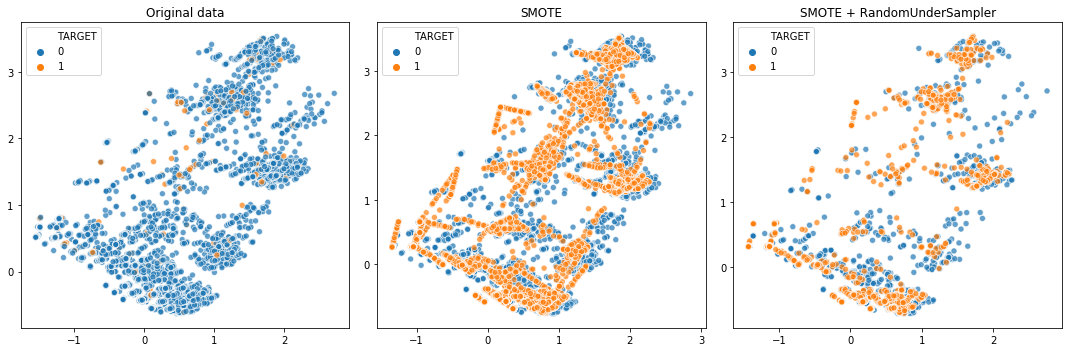

In [37]:
# Comparing the distribution of two classes in the original data, SMOTE data, SMOTE + under sampling of majority class

# Applying SMOTE
x_train_smote, y_train_smote = SMOTE().fit_resample(x_train_scaled, y_new_train)

# Applying SMOTE + Random undersampling of majority class
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under)]
pipe = Pipeline(steps = steps)
x_smote_under, y_smote_under = pipe.fit_resample(x_train_scaled, y_new_train)

# Data for the plot
data = [('Original data', x_train_scaled, y_new_train),
        ('SMOTE', x_train_smote, y_train_smote),
        ('SMOTE + RandomUnderSampler', x_smote_under, y_smote_under)]

# Plot
plt.figure(figsize=(15,5))
for i, x in enumerate(data):
    y = x[2]
    X = x[1]
    
    # Scale + PCA
    fit_pca = PCA(n_components = 2).fit_transform(X)
    
    # plot
    plt.subplot(1,3,i+1)
    sns.scatterplot(x= fit_pca[:,0], y= fit_pca[:,1], hue=y, legend="full", alpha=0.7)
    plt.title(x[0])
    
plt.tight_layout()
plt.show()

The figure above shows how the data is distributed when reduced to two dimensions. It is noticeable that the classes are overlapped in original data making it difficult to determine a decision boundary to classify the data. It is also possible to visualize different groups in the data, which is very interesting. Those groups represent instances that have similar characteristics with each other. Here, a clustering technique could be applied in order to explore those groups.

It is visible the increase in examples of minority class when SMOTE is applied.

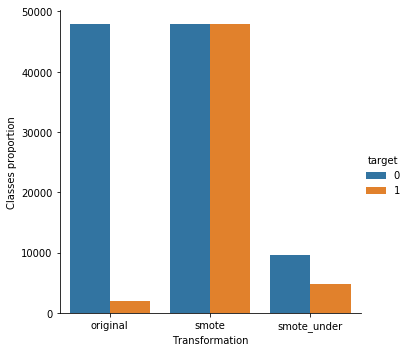

In [31]:
# Comparing the classes proportions 
target = pd.concat([y_new_train, y_train_smote, y_smote_under])

transformation = []
for x in list(zip(['original', 'smote', 'smote_under'], [y_new_train, y_train_smote, y_smote_under])):
    transformation.append(pd.Series(np.array([x[0]]*x[1].shape[0]), index = x[1].index))

label_data = pd.concat(transformation).to_frame(name = 'transformation')

# Data to plot
label_data['target'] = target

sns.catplot('transformation', kind = 'count', hue = 'target', data= label_data)
plt.ylabel('Classes proportion')
plt.xlabel('Transformation')
plt.show()

### 2.2 Performance of decision tree models built using SMOTE x class_weight = 'balanced'

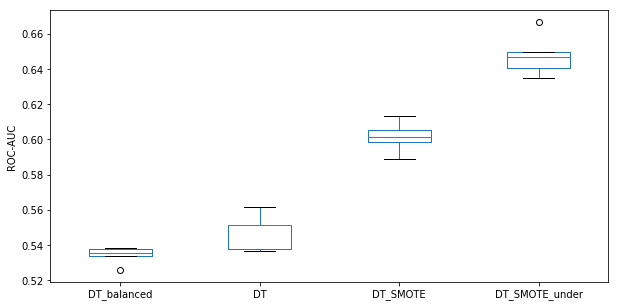

In [38]:
steps = [[('model', DecisionTreeClassifier(class_weight='balanced'))],
         [('model', DecisionTreeClassifier())],
         [('over', SMOTE()), ('model', DecisionTreeClassifier())],
        [('over', SMOTE(sampling_strategy=0.1)), ('under', RandomUnderSampler(sampling_strategy=0.5)), ('model', DecisionTreeClassifier())]]
label = ['DT_balanced', 'DT', 'DT_SMOTE', 'DT_SMOTE_under']
result = compare_models(steps, label, 'roc_auc', 5, x_train_scaled, y_new_train)

plt.figure(figsize = (10,5))
result.boxplot(grid = False)
plt.ylabel('ROC-AUC')
plt.show()

This is a promising result. It can be seen that balancing the data using SMOTE improved significantly the model, compared to using class_weight = 'balanced' (DT_balanced model in the figure). The best result was obtained using SMOTE with oversampling of minority class followed by undersampling of the majority class.

### 2.3 GridSearchCV in SMOTE parameters

In [10]:
pipe = Pipeline([('over', SMOTE(random_state=42)), 
                ('under', RandomUnderSampler(random_state=42)), 
                ('model', DecisionTreeClassifier(random_state=42))])

param_grid = {'over__sampling_strategy': [0.1,0.2,0.3,0.4], 'over__k_neighbors': [5,7,9,11,15],
             'under__sampling_strategy': ['auto', 0.5]}

search = GridSearchCV(pipe, param_grid, scoring = 'roc_auc', cv = 5, n_jobs=-1).fit(x_train_scaled, y_new_train)

In [11]:
search.best_estimator_

Pipeline(steps=[('over',
                 SMOTE(k_neighbors=9, random_state=42, sampling_strategy=0.1)),
                ('under', RandomUnderSampler(random_state=42)),
                ('model', DecisionTreeClassifier(random_state=42))])

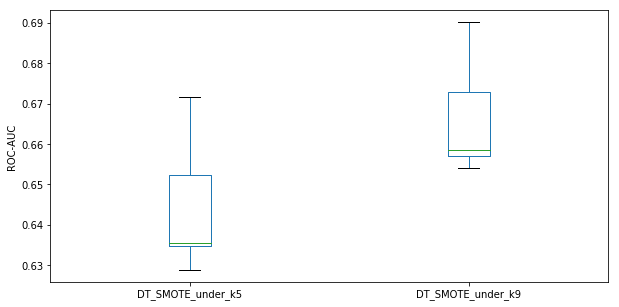

In [12]:
steps = [[('over', SMOTE(sampling_strategy=0.1,random_state=42)), ('under', RandomUnderSampler(sampling_strategy=0.5,random_state=42)), ('model', DecisionTreeClassifier(random_state=42))],
        [('over', SMOTE(sampling_strategy=0.1, k_neighbors=9, random_state=42)), ('under', RandomUnderSampler(random_state = 42)), ('model', DecisionTreeClassifier(random_state=42))]]
label = ['DT_SMOTE_under_k5', 'DT_SMOTE_under_k9']
result = compare_models(steps, label, 'roc_auc', 5, x_train_scaled, y_new_train)
plt.figure(figsize = (10,5))
result.boxplot(grid = False)
plt.ylabel('ROC-AUC')
plt.show()

### 2.4 Optimization of max_depth using SMOTE data

In [39]:
pipe = Pipeline([('over', SMOTE(k_neighbors=9, sampling_strategy=0.1, random_state=42)), 
        ('under', RandomUnderSampler(random_state=42))])
x_smote_under, y_smote_under = pipe.fit_resample(x_train_scaled, y_new_train)

clf_dc = DecisionTreeClassifier(random_state = 42)

param_grid = {'max_depth': [1,2,3,4,5,6,10,20]}

search = GridSearchCV(clf_dc, param_grid, scoring = 'roc_auc', cv = StratifiedKFold(5),
                      n_jobs=-1).fit(x_smote_under, y_smote_under)

In [42]:
search.best_score_

0.8322734907816385

In [44]:
clf_smote_opt_depth = search.best_estimator_
clf_smote_opt_depth

DecisionTreeClassifier(max_depth=6, random_state=42)

In [45]:
# Predictions with train and test data. There is no overfitting.
print('ROC-AUC for training data: ', np.round(roc_auc_score(y_new_train, clf_smote_opt_depth.predict_proba(x_train_scaled)[:,1]), 3))
print('ROC-AUC for testing data: ', np.round(roc_auc_score(y_new_test, clf_smote_opt_depth.predict_proba(x_test_scaled)[:,1]), 3))

ROC-AUC for training data:  0.826
ROC-AUC for testing data:  0.813


### 2.5 Comparing clf_smote_opt_depth x clf_opt_depth

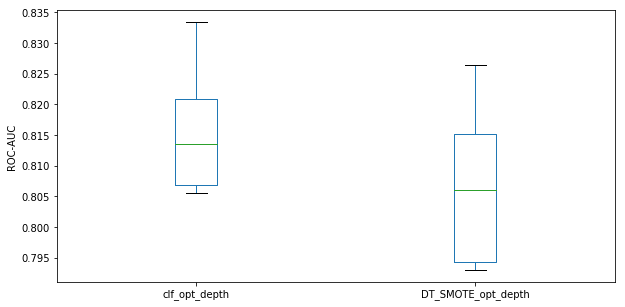

In [41]:
steps = [[('clf_opt_depth', DecisionTreeClassifier(class_weight= 'balanced', max_depth= 5, random_state=42))],
        [('over', SMOTE(sampling_strategy=0.1, k_neighbors=9)), ('under', RandomUnderSampler()), 
         ('model',clf_smote_opt_depth)]]
label = ['clf_opt_depth', 'DT_SMOTE_opt_depth']

result = compare_models(steps, label, 'roc_auc', 5, x_train_scaled, y_new_train)

plt.figure(figsize = (10,5))
result.boxplot(grid = False)
plt.ylabel('ROC-AUC')
plt.show()


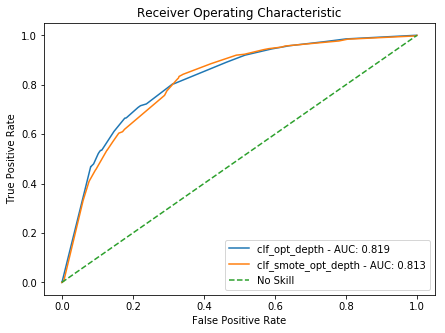

[('clf_opt_depth', 0.46872743325138316),
 ('clf_smote_opt_depth', 0.35294117647058826)]

In [46]:
# ROC-AUC in test data
predictions = [clf_opt_depth.predict_proba(x_new_test), 
               clf_smote_opt_depth.predict_proba(x_test_scaled)]
labels = ['clf_opt_depth', 'clf_smote_opt_depth']

roc_plot(predictions, labels, y_new_test)

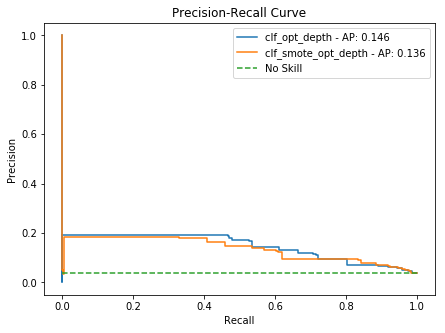

[('clf_opt_depth', 0.8815553826534135),
 ('clf_smote_opt_depth', 0.7648902821316614)]

In [47]:
# Average precision in test data
prc_plot(predictions, labels, y_new_test)

No further improvements were achieved by balancing the data with SMOTE. Thus, from now on, I will use the class_weight hyperparameter when available, instead of SMOTE technique to balance the data.

## 3. Model 2 - Random Forest

### 3.1 Training a base model

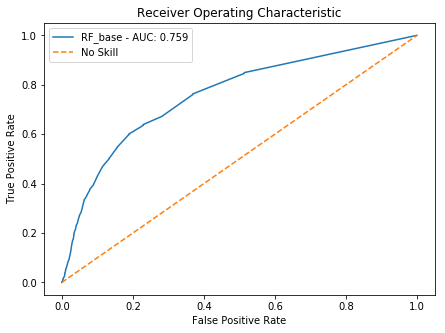

In [49]:
# Performance of a base model.
steps = [[('model', RandomForestClassifier(class_weight='balanced',random_state=42))]]
label = ['RF_base']

best_thresolds = train_roc_plot(steps, label, x_new_train, y_new_train, x_new_test, y_new_test)

In [50]:
rf_base = RandomForestClassifier(class_weight='balanced',random_state=42).fit(x_new_train, y_new_train)
# ROC-AUC score
print('ROC-AUC for training data: ', np.round(roc_auc_score(y_new_train, rf_base.predict_proba(x_new_train)[:,1]), 3))
print('ROC-AUC for testing data: ', np.round(roc_auc_score(y_new_test, rf_base.predict_proba(x_new_test)[:,1]), 3))

ROC-AUC for training data:  0.999
ROC-AUC for testing data:  0.759


The base Random Forest model has a much better performance than the base decision tree model, but also suffers of overfitting. 

Because Random Forest randomly select the variables that will compose each tree in the forest, irrelevant variables might have a negative impact in the overall model. Thus, RFE method will be used to find the most important variables and then an optimized model will be trained considering those variables.

### 3.2 Finding the most important features with RFE (recursive feature elimination)
https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

In [14]:
# **This cell takes lots of time to run**

# Model
rf = RandomForestClassifier(class_weight= 'balanced')

# Minimum number of features to consider
min_features_to_select = 1  
rfecv1 = RFECV(estimator = rf, step=1, cv=StratifiedKFold(5),
              scoring='roc_auc',
              min_features_to_select=min_features_to_select)
rfecv1.fit(x_new_train, y_new_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(class_weight='balanced'),
      scoring='roc_auc')

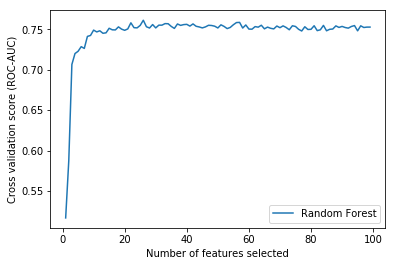

In [15]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (ROC-AUC)")
plt.plot(range(min_features_to_select,
               len(rfecv1.grid_scores_) + min_features_to_select),
         rfecv1.grid_scores_, label = 'Random Forest')
plt.legend()
plt.show()

In [19]:
print('Random Forest - Best number features: {}'.format(rfecv1.n_features_))
rando_forest_features = x_new_train.columns[rfecv1.ranking_ == 1]

Random Forest - Best number features: 26


In [20]:
rando_forest_features

Index(['var15', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'ind_var30',
       'num_var4', 'num_var30_0', 'num_var30', 'saldo_var5', 'saldo_var30',
       'saldo_var42', 'var36', 'num_var22_hace2', 'num_var22_hace3',
       'num_var22_ult1', 'num_var22_ult3', 'num_med_var45_ult3',
       'num_meses_var39_vig_ult3', 'num_var45_hace2', 'num_var45_hace3',
       'num_var45_ult1', 'num_var45_ult3', 'saldo_medio_var5_hace2',
       'saldo_medio_var5_hace3', 'saldo_medio_var5_ult1',
       'saldo_medio_var5_ult3', 'var38'],
      dtype='object')

### 3.3 Optimization of the hyperparameters

It is paramount to keep in mind that GridSearchCV is going to use the value of the scoring metric to determine the best hyperparameters values. Thus, the model returned will be scoring metric dependent, different metrics results in different optimized values. In this case, ROC-AUC is being used. 

In [ ]:
## This cell takes lots of time to run, the results were saved, run the cell below.

rf = RandomForestClassifier(class_weight = 'balanced')

tuned_param = [{'n_estimators': [100,150,200,300,500,550], 'max_features': [4, 'auto', 6, 8, 10], 'max_depth': [3,5,8,10,15]}]

# If, refit = True (default value), gridSearchCV returns a model fitted with the best parameters, thus it is possible to make 
# predictions using de GridSearchCV object. It is possible to return the training scores by setting return_train_score = True.
grids = GridSearchCV(estimator = rf, 
                     param_grid= tuned_param, 
                     scoring = 'roc_auc', 
                     cv = 5, n_jobs= 4).fit(x_new_train[rando_forest_features], y_new_train)

In [7]:
# GridSearch results were saved in a csv file

# grids_result = pd.DataFrame(grids.cv_results_)
# grids_result.to_csv('grids_result_2.csv')

# Importing GridSearchCV results
grid_result = pd.read_csv('grids_result_2.csv')

# Selecting the columns of interest
grid_result = grid_result[['param_max_depth','param_max_features','param_n_estimators', 'mean_test_score','std_test_score','rank_test_score']]

# Preparing the data to visualization usign max_features = 10
data_graph = grid_result[grid_result['param_max_features'] == '10']
data_graph = data_graph[['param_max_depth','param_n_estimators','mean_test_score']]
data_graph.columns = ['max_depth','n_estimators','mean_AUC_cv']
data_graph = data_graph.pivot('max_depth','n_estimators')
x = data_graph.columns.levels[1].values
y = data_graph.index.values
z = data_graph.values

import plotly.graph_objects as go

# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='max_depth') 
            ) )

fig = go.Figure(data= [go.Surface(z=z, y=y, x=x)], layout=layout)
fig.update_layout(title='Hyperparameter tuning',
                  scene = dict(
                    xaxis_title='n_estimators',
                    yaxis_title='max_depth',
                    zaxis_title='ROC_AUC'),
                  autosize=False,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

### 3.4 Comparing models

In order to investigate the influence of using irrelevant variables in Random Forest model, the hyperparameters max_depth, max_features, n_estimators were optimized in a Random Forest model using all the available features. The results are presented below. It can be seen that ROC-AUC for this model is smaller than the model where only RFE variables were used.

In [51]:
rf = RandomForestClassifier(class_weight = 'balanced')

tuned_param = [{'n_estimators': [100,150,200,300,500,550], 'max_features': [4, 'auto', 6, 8, 10], 'max_depth': [3,5,8,10,15]}]

grids = GridSearchCV(estimator = rf, 
                     param_grid= tuned_param, 
                     scoring = 'roc_auc', 
                     cv = 5, n_jobs= -1).fit(x_new_train, y_new_train)

In [52]:
grids.best_params_

{'max_depth': 8, 'max_features': 10, 'n_estimators': 300}

In [53]:
grids.best_score_

0.8168017182932712

#### Evaluating the Random Forest models

Models trained without RFE:
1. model1 - Random Forest with class_weight = 'balanced'
2. model2 - Random Forest with class_weight = 'balanced' + max_depth: 8, max_features: 10, n_estimators: 300

Model traine with RFE:
3. model3 - Random Forest with class_weight = 'balanced' + max_depth=5, max_features=10, n_estimators=150

In [12]:
RF_base = RandomForestClassifier(class_weight='balanced',
                                 random_state=42).fit(x_new_train, y_new_train)

RF_all_features_opt = RandomForestClassifier(class_weight='balanced',
                                             max_depth=8, max_features=10,
                                             n_estimators=300, random_state=42).fit(x_new_train, y_new_train)

RF_RFE_vars_opt = RandomForestClassifier(class_weight='balanced',
                                         max_depth=5, max_features=10, 
                                         n_estimators=150, random_state=42).fit(x_new_train[rando_forest_features], y_new_train)

predictions = [RF_base.predict_proba(x_new_test),
              RF_all_features_opt.predict_proba(x_new_test),
              RF_RFE_vars_opt.predict_proba(x_new_test[rando_forest_features])]

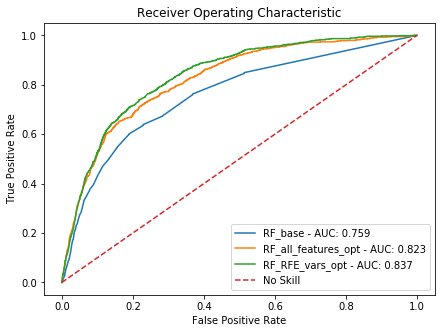

In [13]:
label = ['RF_base', 'RF_all_features_opt', 'RF_RFE_vars_opt']

thresholds = roc_plot(predictions,label,y_new_test)

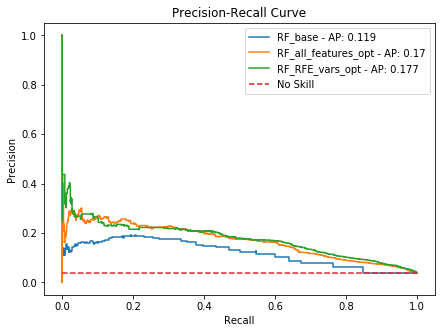

In [14]:
thresholds = prc_plot(predictions,label,y_new_test)

It is noticeable that tuning hyperparameters and selecting the best variables resulted in the increased of the model performance.

In [67]:
# Saving the model
pickle.dump(RF_RFE_vars_opt, open('models/random_forest_model', 'wb'))

### 3.5 Comparing best Random Forest model with Decision Tree

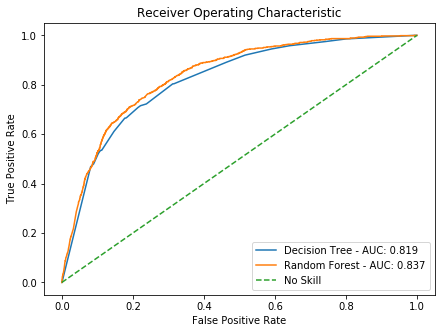

In [28]:
clf_opt_depth = DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42).fit(x_new_train, y_new_train)

predictions = [clf_opt_depth.predict_proba(x_new_test),
              RF_RFE_vars_opt.predict_proba(x_new_test[rando_forest_features])]

label = ['Decision Tree', 'Random Forest']

thresholds = roc_plot(predictions,label,y_new_test)

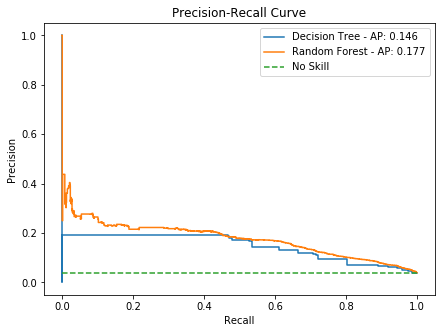

In [22]:
thresholds = prc_plot(predictions,label,y_new_test)

#### Making predictions at threshold = 0.5

Accuracy: 0.804
Precision: 0.131
Recall: 0.711
F1-score: 0.221
ROC AUC: 0.759


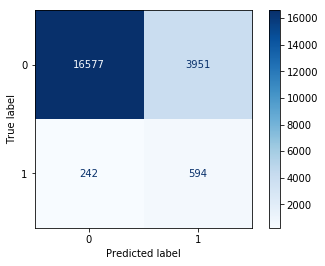

In [33]:
from custom_functions.functions import evaluate_model_without_cv

evaluate_model_without_cv(x_new_test[rando_forest_features], y_new_test,np.round(predictions[1][:,1]>0.5), RF_RFE_vars_opt)

Accuracy: 0.782
Precision: 0.118
Recall: 0.708
F1-score: 0.203
ROC AUC: 0.747


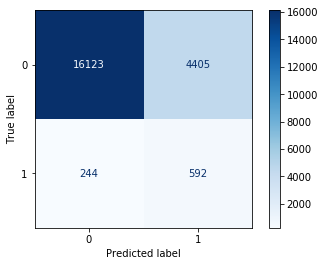

In [34]:
evaluate_model_without_cv(x_new_test, y_new_test,np.round(predictions[0][:,1]>0.5), clf_opt_depth)

Random Forest was able to decrease the FP, what increased the model performance compared to decision tree.

### 3.6 Making predictions with Random Forest

In [23]:
# test_set does not have the labels. It is provided by kaggle to submit the solutions in the competitions.
test_set = pd.read_csv('test.csv')
test_set = test_set[df_new.columns[:-1]]

# Selecting only Random Forest most important variables
test_set = test_set[rando_forest_features]

predictions = RF_RFE_vars_opt.predict(test_set)
unique, counts = np.unique(predictions, return_counts= True)
count = list(zip(unique, counts))
print('Predictions: ', count)
print('{:.2f}% of the samples were labeled as unsatisfied'.format(count[1][1]*100/test_set.shape[0]))
print()

Predictions:  [(0, 59351), (1, 16467)]
21.72% of the samples were labeled as unsatisfied



## 4. Model 3 - AdaBoost

In [69]:
from sklearn.ensemble import AdaBoostClassifier

### 4.1 Creating a base model

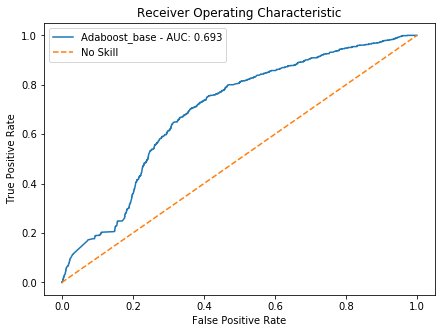

[('Adaboost_base', 0.00012979149274891267)]

In [45]:
adaboost_base = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced')).fit(x_new_train, y_new_train)

predictions = [adaboost_base.predict_proba(x_new_test)]

label = ['Adaboost_base']

roc_plot(predictions, label, y_new_test)

### 4.2 Tuning hyperparameters

In [22]:
def tune_adaboost(weak_leaner, estimator, learning_rate, feature_names):
    adaboost = AdaBoostClassifier(base_estimator= weak_leaner)

    tuned_param = [{'n_estimators': estimator, 'learning_rate': learning_rate}]

    grid_adaboost = GridSearchCV(estimator = adaboost, 
                     param_grid= tuned_param, 
                     scoring = 'roc_auc', 
                     cv = 5, n_jobs= -1).fit(x_new_train[feature_names], y_new_train)
    return grid_adaboost.best_estimator_, grid_adaboost.best_score_

In [24]:
# Model 1
# decision tree class_weight = 'balanced' + all variables
weak_leaner = DecisionTreeClassifier(max_depth = 1, class_weight='balanced')
estimator = [50, 100 ,150,200,300,500]
learning_rate = [0.01, 0.1, 1]
feature_names = x_new_train.columns

#adaboost2 = tune_adaboost(weak_leaner, estimator, learning_rate, feature_names)
print('Best model: ', adaboost2[0])
print('ROC-AUC: ', adaboost2[1])

Best model:  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1),
                   learning_rate=0.1, n_estimators=200)
ROC-AUC:  0.8288538355207908


In [26]:
# Model 2
# class_weight = 'balanced' + dc_features variables
weak_leaner = DecisionTreeClassifier(max_depth = 1, class_weight = 'balanced')
estimator = [50, 100 ,150,200,300,500]
learning_rate = [0.01, 0.1, 1]
feature_names = dc_features

#adaboost3 = tune_adaboost(weak_leaner, estimator, learning_rate, feature_names)
print('Best model: ', adaboost3[0])
print('ROC-AUC: ', adaboost3[1])

Best model:  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1),
                   learning_rate=0.1, n_estimators=300)
ROC-AUC:  0.8218812630166298


In [27]:
# Model 3
# Pruned decision tree model
weak_leaner = DecisionTreeClassifier(class_weight = 'balanced', ccp_alpha = best_ccp_alpha)
estimator = [50, 100 ,150,200,300,500]
learning_rate = [0.01, 0.1, 1]
feature_names = x_new_train.columns

#adaboost4 = tune_adaboost(weak_leaner, estimator, learning_rate, feature_names)
print('Best model: ', adaboost4[0])
print('ROC-AUC: ', adaboost4[1])

Best model:  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0008699213346656104,
                                                         class_weight='balanced'),
                   learning_rate=0.1, n_estimators=300)
ROC-AUC:  0.8219030454843798


Model 1 is the best.

We can see that AdaBoost model has improved the performance of the pruned decision tree model considering both ROC and PRC AUC. However, the best performance was obtained when a decision tree with max_depth = 1 was used as weak learner rather than ccp_alpha. Besides, using all 99 features resulted in better performance. This demonstrate that predictions are complementary in some extend, i.e, models built in the ensemble method were able to correct the predictions of previous decision trees. 

Let's see if the performance can be improved by changing max_depth.

### 4.2 Evaluating the max_depth

In [31]:
score = {}
for i in range(1,10):
    base_estim = DecisionTreeClassifier(class_weight='balanced', max_depth= i)
    model = AdaBoostClassifier(base_estimator=base_estim, learning_rate=0.1, n_estimators=200)
    cv = StratifiedKFold(n_splits=5)
    # evaluate the model and collect the results
    scores = cross_val_score(model, x_new_train, y_new_train, scoring='roc_auc', cv=cv, n_jobs=-1)
    key = 'max_depth' + str(i)
    score[key] = scores

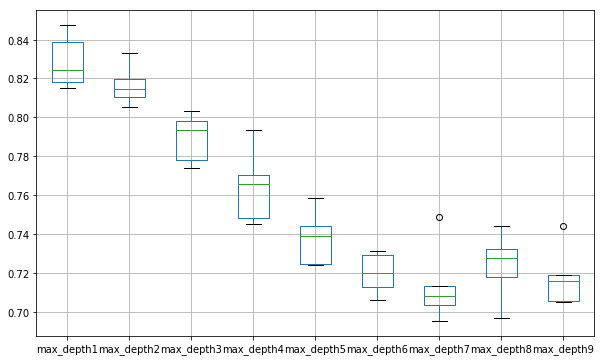

In [32]:
plt.figure(figsize=(10,6))
pd.DataFrame(score).boxplot()

No further improvements were achieved by changing the max_depth of the weak learner. 

### 4.2 Comparing base Adaboost with optimized Adaboost

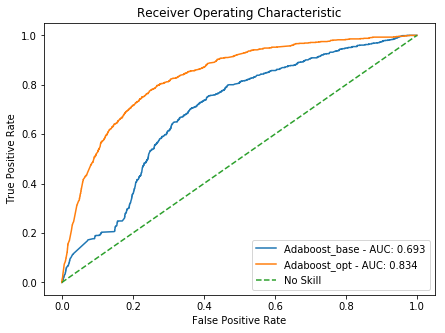

[('Adaboost_base', 0.00012979149274891267),
 ('Adaboost_opt', 0.4983514467169207)]

In [36]:
adaboost_base = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced')).fit(x_new_train, y_new_train)

adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',max_depth=1),
                            learning_rate=0.1, n_estimators=200).fit(x_new_train, y_new_train)

predictions = [adaboost_base.predict_proba(x_new_test),
              adaboost.predict_proba(x_new_test)]

label = ['Adaboost_base', 'Adaboost_opt']

roc_plot(predictions, label, y_new_test)

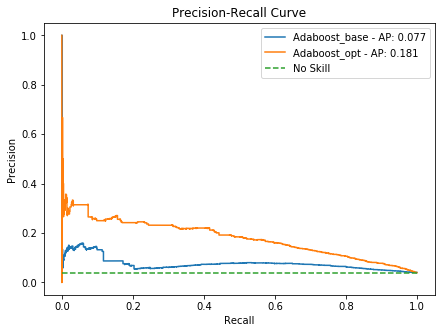

[('Adaboost_base', 0.0022814128785079743),
 ('Adaboost_opt', 0.5479698345713696)]

In [37]:
prc_plot(predictions, label, y_new_test)

In [72]:
# Saving model
pickle.dump(adaboost, open('models/adaboost_model', 'wb'))

### 4.3 Comparing with other models

In [14]:
# Loading the models
decision_tree = pickle.load(open('models/decision_tree_model', 'rb'))
random_forest = pickle.load(open('models/random_forest_model', 'rb'))
adaboost = pickle.load(open('models/adaboost_model', 'rb'))

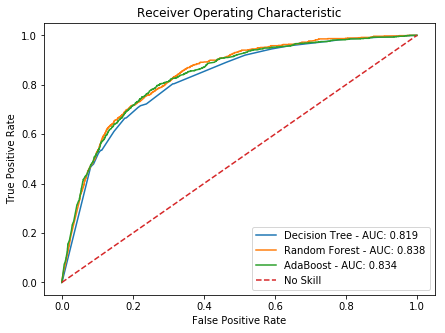

In [19]:
predictions = [decision_tree.predict_proba(x_new_test),
              random_forest.predict_proba(x_new_test[rando_forest_features]),
              adaboost.predict_proba(x_new_test)]

label = ['Decision Tree', 'Random Forest','AdaBoost']

thres = roc_plot(predictions, label, y_new_test)

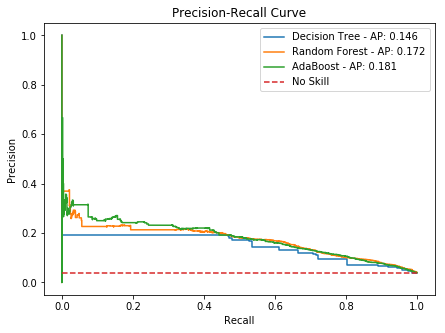

In [20]:
thres = prc_plot(predictions, label, y_new_test)

### 4.3 Making predictions with the model

In [59]:
# test_set does not have the labels. It is provided by kaggle to submit the solutions in the competitions.
test_set = pd.read_csv('test.csv')
test_set = test_set[df_new.columns[:-1]]

# Selecting only Random Forest most important variables
predictions = adaboost.predict(test_set)
unique, counts = np.unique(predictions, return_counts= True)
count = list(zip(unique, counts))
print('Predictions: ', count)
print('{:.2f}% of the samples were labeled as unsatisfied'.format(count[1][1]*100/test_set.shape[0]))
print()

Predictions:  [(0, 56269), (1, 19549)]
25.78% of the samples were labeled as unsatisfied



#### Confusion matrix at threshold = 0.5

Accuracy: 0.764
Precision: 0.116
Recall: 0.757
F1-score: 0.201
ROC AUC: 0.761


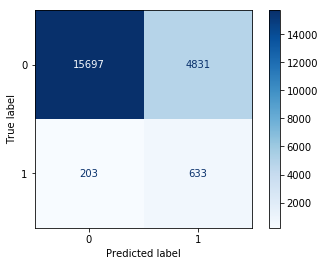

In [52]:
from custom_functions.functions import evaluate_model_without_cv
y_pred = adaboost.predict(x_new_test)
evaluate_model_without_cv(x_new_test, y_new_test, y_pred, adaboost)

Adaboost model is able to recover more TP, but increases the FP when compared to Random Forest. This explains the increase in positive labeled examples to 25%.

## 5. Model 4 - Gradient Boosting

Gradient Boosting does not have a class_weight hyperparameter, thus SMOTE technique will be used to balance the data and then train the model.

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

### 5.1 Balancing the data

Let's compare the result of balancing the data with SMOTE with a base Gradient Boosting model.

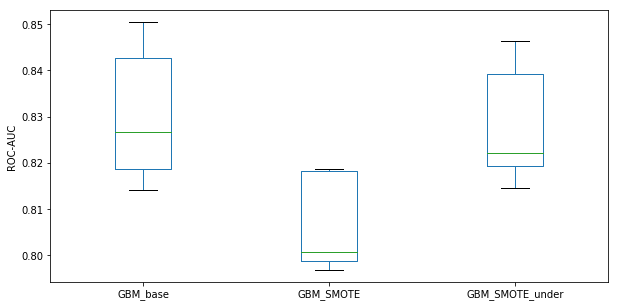

In [36]:
steps = [[('scale', MinMaxScaler()),('model', GradientBoostingClassifier(random_state=42))],
         [('scale', MinMaxScaler()), ('over', SMOTE(random_state=42)), 
          ('model', GradientBoostingClassifier(random_state=42))],
        [('scale', MinMaxScaler()), ('over', SMOTE(sampling_strategy=0.1,random_state=42)), 
         ('under', RandomUnderSampler(sampling_strategy=0.5, random_state=42)), 
         ('model', GradientBoostingClassifier(random_state=42))]]
label = ['GBM_base', 'GBM_SMOTE', 'GBM_SMOTE_under']
result = compare_models(steps, label, 'roc_auc', 5, x_new_train[gbm_20.index], y_new_train)

plt.figure(figsize = (10,5))
result.boxplot(grid = False)
plt.ylabel('ROC-AUC')
plt.show()

Note that the base Gradient Boosting model performance is comparable with the SMOTE with over and undersampling (GBM_SMOTE_under). The model GBM trained in a balanced data where only oversampling was performed presented lower performance compared to the others.

#### Searching best SMOTE parameters

In [46]:
pipe = Pipeline([('scale', MinMaxScaler()),
                 ('over', SMOTE(random_state=42)), 
                ('under', RandomUnderSampler(random_state=42)), 
                ('model', GradientBoostingClassifier(random_state=42))])

param_grid = {'over__sampling_strategy': [0.1,0.2,0.3,0.4], 'over__k_neighbors': [5,7,9,11,15],
             'under__sampling_strategy': ['auto', 0.5]}

search = GridSearchCV(pipe, param_grid, scoring = 'roc_auc', cv = 5, n_jobs=-1).fit(x_new_train, y_new_train)

In [47]:
print('Best SMOTE parameters: ', search.best_params_)

Best SMOTE parameters:  {'over__k_neighbors': 5, 'over__sampling_strategy': 0.1, 'under__sampling_strategy': 0.5}


In [48]:
print('Best ROC-AUC score: ', np.round(search.best_score_,3))

Best ROC-AUC score:  0.83


#### Balancing the data with the best parameters 

In [11]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_new_train)
x_test_scaled = scaler.transform(x_new_test)

pipe = Pipeline([('over', SMOTE(sampling_strategy=0.1, k_neighbors=5, random_state=42)), 
         ('under', RandomUnderSampler(sampling_strategy=0.5, random_state = 42))])
x_train_smote, y_train_smote = pipe.fit_resample(x_train_scaled, y_new_train)

y_train_smote.value_counts()

0    9574
1    4787
Name: TARGET, dtype: int64

### 5.2 - Training the model

Here I will compare the performance of the models trained with original and balanced dataset. 

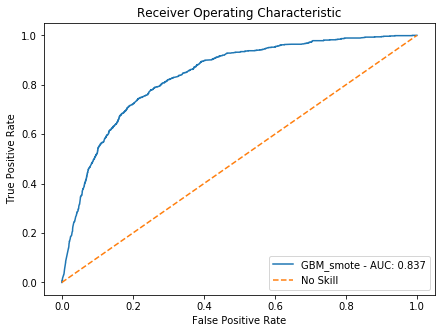

[('GBM_smote', 0.2898425201235664)]

In [15]:
gbm_smote = GradientBoostingClassifier(random_state=42).fit(x_train_smote,y_train_smote)

predictions = [gbm_smote.predict_proba(x_test_scaled)]

label = ['GBM_smote']

roc_plot(predictions, label, y_new_test)

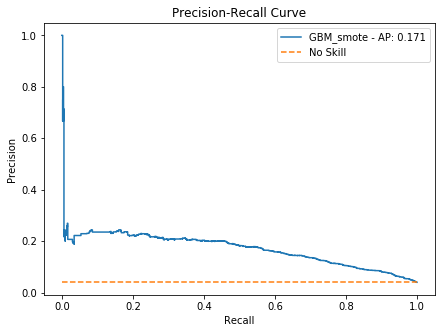

[('GBM_smote', 0.5343059739305017)]

In [28]:
prc_plot(predictions, label, y_new_test)

In [15]:
# Performance of gbm_smote in train and test
print('ROC-AUC for training data: ', np.round(roc_auc_score(y_train_smote, gbm_smote.predict_proba(x_train_smote)[:,1]), 3))
print('ROC-AUC for testing data: ', np.round(roc_auc_score(y_new_test, gbm_smote.predict_proba(x_test_scaled)[:,1]), 3))

ROC-AUC for training data:  0.9
ROC-AUC for testing data:  0.837


It can be noticed that gbm_smote learned more during training (its ROC-AUC is 0.9 in training) but this did not improve the performance in test when compared with gbm_base model trained with imbalanced data.

### 5.3 - Training a new model with the most important features

#### Selecting the top 25 important features

In [16]:
varImp_smote = pd.Series(gbm_smote.feature_importances_, index = x_new_train.columns).sort_values(ascending = False).head(25)
varImp_smote

var15                      0.322207
saldo_var30                0.125143
num_meses_var5_ult3        0.075908
num_var30                  0.065805
num_var45_hace3            0.065033
var38                      0.051842
num_var4                   0.043203
num_var22_hace2            0.042133
num_var22_ult1             0.025086
num_med_var22_ult3         0.017156
num_op_var41_efect_ult3    0.017131
num_var45_hace2            0.016011
num_var22_hace3            0.014705
var36                      0.011143
saldo_medio_var5_hace2     0.011042
saldo_medio_var5_ult3      0.010733
num_op_var41_efect_ult1    0.010018
imp_ent_var16_ult1         0.008577
num_var30_0                0.007236
num_var42_0                0.007072
saldo_medio_var5_ult1      0.005961
num_med_var45_ult3         0.005848
saldo_var5                 0.005600
imp_op_var41_efect_ult1    0.005579
saldo_medio_var5_hace3     0.004198
dtype: float64

In [17]:
varImp_smote = varImp_smote.index
varImp_smote

Index(['var15', 'saldo_var30', 'num_meses_var5_ult3', 'num_var30',
       'num_var45_hace3', 'var38', 'num_var4', 'num_var22_hace2',
       'num_var22_ult1', 'num_med_var22_ult3', 'num_op_var41_efect_ult3',
       'num_var45_hace2', 'num_var22_hace3', 'var36', 'saldo_medio_var5_hace2',
       'saldo_medio_var5_ult3', 'num_op_var41_efect_ult1',
       'imp_ent_var16_ult1', 'num_var30_0', 'num_var42_0',
       'saldo_medio_var5_ult1', 'num_med_var45_ult3', 'saldo_var5',
       'imp_op_var41_efect_ult1', 'saldo_medio_var5_hace3'],
      dtype='object')

In [13]:
x_train_smote = pd.DataFrame(x_train_smote, columns = x_new_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_new_test.columns)

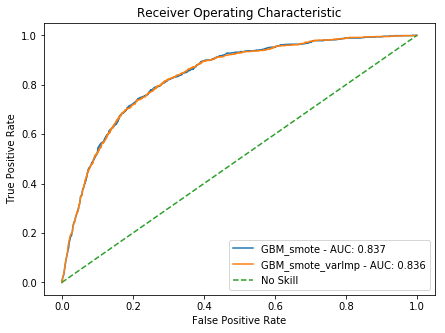

[('GBM_smote', 0.2898425201235664), ('GBM_smote_varImp', 0.24535880394093523)]

In [18]:
gbm_smote_varImp = GradientBoostingClassifier(random_state=42).fit(x_train_smote[varImp_smote],y_train_smote)

predictions = [gbm_smote.predict_proba(x_test_scaled),
               gbm_smote_varImp.predict_proba(x_test_scaled[varImp_smote])]

label = ['GBM_smote','GBM_smote_varImp']

roc_plot(predictions, label, y_new_test)

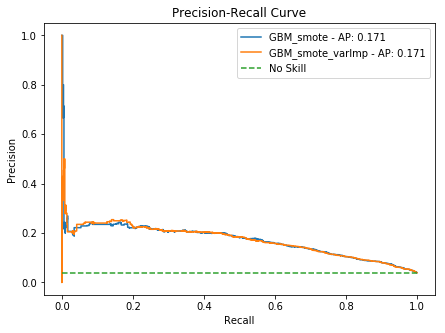

[('GBM_smote', 0.5343059739305017), ('GBM_smote_varImp', 0.8506883691032674)]

In [19]:
prc_plot(predictions, label, y_new_test)

In [20]:
# The performance of gbm_smote_varImp model
print('ROC-AUC for training data: ', np.round(roc_auc_score(y_train_smote, 
                                                            gbm_smote_varImp.predict_proba(x_train_smote[varImp_smote])[:,1]), 3))
print('ROC-AUC for testing data: ', np.round(roc_auc_score(y_new_test, 
                                                           gbm_smote_varImp.predict_proba(x_test_scaled[varImp_smote])[:,1]), 3))

ROC-AUC for training data:  0.9
ROC-AUC for testing data:  0.836


The performance considering ROC-AUC remained the same when the model was trained with the top 25 variables.

#### Plot the error of the models according to the number of estimators

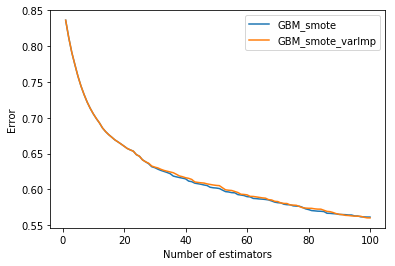

In [21]:
# Function to calculate the error in each estimator

def gbm_deviance(gbm_model,x_test, y_test):
    test_deviance = np.zeros(gbm_model.n_estimators)
    for i, y_pred in enumerate(gbm_model.staged_decision_function(x_test)):
        test_deviance[i] = gbm_model.loss_(y_test, y_pred)
    return test_deviance

gbm_smote_deviance = gbm_deviance(gbm_smote, x_test_scaled, y_new_test)
gbm_smote_varImp_deviance = gbm_deviance(gbm_smote_varImp, x_test_scaled[varImp_smote], y_new_test)

# Plot
label = ['GBM_smote','GBM_smote_varImp']

for i,deviance in enumerate([gbm_smote_deviance,gbm_smote_varImp_deviance]):
    plt.plot(np.arange(1,gbm_smote.n_estimators+1),deviance, label = label[i])
plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('Error')
plt.show()

We can see that the error in Gradient Boosting was not affected by removing 74 features of the model.

### 5.4 Tuning GBM hyperparameters

In [36]:
## This cell takes lots of time to run ###
model = GradientBoostingClassifier(random_state=42)

params = {'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 400, 600],
         'max_depth': [3,5,7,10], 'subsample': [0.5,0.7,0.8,1], 'max_features': [3,'sqrt',6]}

grid_search_gb_smote = GridSearchCV(estimator = model, 
                                  param_grid=params, 
                                  scoring = 'roc_auc', 
                                  cv =5,
                                  n_jobs=-1).fit(x_train_smote[varImp_smote], y_train_smote)

In [37]:
grid_search_gb_smote.best_score_

0.9078192517205934

In [38]:
print('ROC-AUC for testing data: ', np.round(roc_auc_score(y_new_test, 
                                                           grid_search_gb_smote.best_estimator_.predict_proba(x_test_scaled[varImp_smote])[:,1]), 3))

ROC-AUC for testing data:  0.822


In [40]:
grid_search_gb_smote.best_params_

{'learning_rate': 0.05,
 'max_depth': 10,
 'max_features': 6,
 'n_estimators': 200,
 'subsample': 0.8}

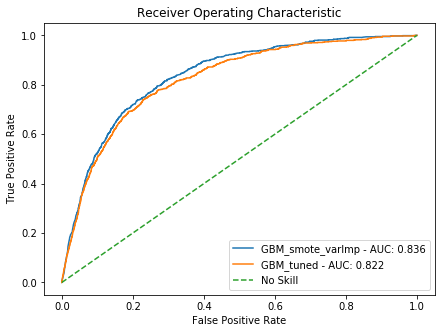

[('GBM_smote_varImp', 0.24535880394093523), ('GBM_tuned', 0.18748042604720158)]

In [41]:
predictions = [gbm_smote_varImp.predict_proba(x_test_scaled[varImp_smote]),
              grid_search_gb_smote.best_estimator_.predict_proba(x_test_scaled[varImp_smote])]

label = ['GBM_smote_varImp','GBM_tuned']

roc_plot(predictions, label, y_new_test)

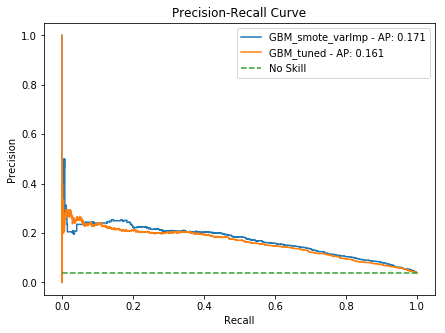

[('GBM_smote_varImp', 0.8506883691032674), ('GBM_tuned', 0.9575447234134358)]

In [42]:
prc_plot(predictions, label, y_new_test)

Tuning the hyperparameters did not improve the performance of Gradient Boosting model. Thus, let's save the gbm_smote_varImp model.

In [44]:
# Saving model
pickle.dump(gbm_smote_varImp, open('models/gradient_boosting_model', 'wb'))

### 5.5 Comparing the models: Decision Tree x Random Forest x AdaBoost x Gradient Boosting

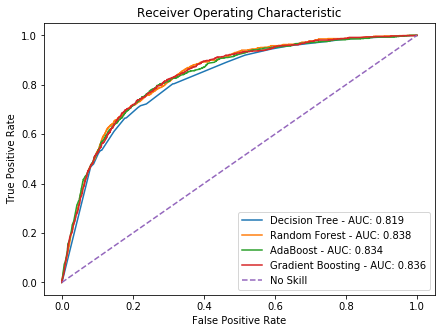

[('Decision Tree', 0.46872743325138316),
 ('Random Forest', 0.4953203807284142),
 ('AdaBoost', 0.4983514467169207),
 ('Gradient Boosting', 0.24535880394093523)]

In [22]:
# Loading the models
decision_tree = pickle.load(open('models/decision_tree_model', 'rb'))
random_forest = pickle.load(open('models/random_forest_model', 'rb'))
adaboost = pickle.load(open('models/adaboost_model', 'rb'))
gradient_boosting = pickle.load(open('models/gradient_boosting_model','rb'))

# Making predictions with test set
predictions = [decision_tree.predict_proba(x_new_test),
              random_forest.predict_proba(x_new_test[rando_forest_features]),
              adaboost.predict_proba(x_new_test),
              gradient_boosting.predict_proba(x_test_scaled[varImp_smote])]

label = ['Decision Tree', 'Random Forest','AdaBoost', 'Gradient Boosting']

roc_plot(predictions, label, y_new_test)

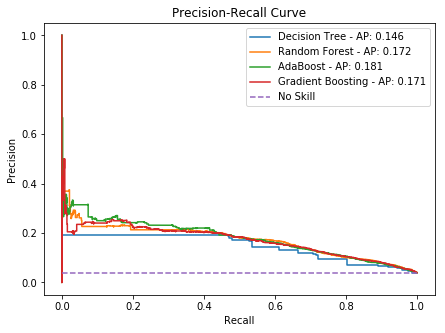

[('Decision Tree', 0.8815553826534135),
 ('Random Forest', 0.8490705656024816),
 ('AdaBoost', 0.5479698345713695),
 ('Gradient Boosting', 0.8506883691032674)]

In [51]:
prc_plot(predictions, label, y_new_test)

### 5.6 - Making predictions with Gradient Boosting model

In [31]:
# test_set does not have the labels. It is provided by kaggle to submit the solutions in the competitions.
test_set = pd.read_csv('test.csv')
test_set = test_set[x_new_train.columns]

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_new_train)
test_set_scaled = scaler.transform(test_set)

test_set_scaled = pd.DataFrame(test_set_scaled, columns = x_new_train.columns)

# Selecting only Random Forest most important variables
predictions = gradient_boosting.predict(test_set_scaled[varImp_smote])
unique, counts = np.unique(predictions, return_counts= True)
count = list(zip(unique, counts))
print('Predictions: ', count)
print('{:.2f}% of the samples were labeled as unsatisfied'.format(count[1][1]*100/test_set_scaled.shape[0]))
print()

Predictions:  [(0, 67459), (1, 8359)]
11.03% of the samples were labeled as unsatisfied



#### Confusion Matrix at threshold = 0.5

Accuracy: 0.898
Precision: 0.186
Recall: 0.480
F1-score: 0.268
ROC AUC: 0.697


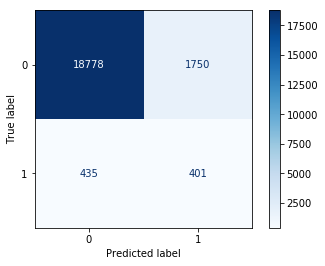

In [33]:
from custom_functions.functions import evaluate_model_without_cv
y_pred = gradient_boosting.predict(x_test_scaled[varImp_smote])
evaluate_model_without_cv(x_test_scaled[varImp_smote], y_new_test, y_pred, gradient_boosting)

Gradient Boosting model returned only 11% of samples labeled as unsatisfied, the smallest amount among the evaluated models until now at threshold = 0.5. However, the confusion matrix of the model at threshold = 0.5 show us that about 50% of the true positives are labeled incorrectly as negatives. 

Considering the true positives, gradient boosting is the worst model at threshold = 0.5, because the other models are capable to identify correctly many more true positives.

## 6. Model 5 - Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

### 6.1 - Training the model

In [23]:
# Base model
logit = LogisticRegression(class_weight= 'balanced')
scores = cross_val_score(logit, x_new_train, y_new_train, scoring='roc_auc', cv=StratifiedKFold(5), n_jobs=-1)
print('Base Logistic Regression Model')
print('ROC-AUC: ', np.mean(scores), ' std: ', np.std(scores))

Base Logistic Regression Model
ROC-AUC:  0.6872044766829098  std:  0.006467737334167754


In [24]:
# Applying MinMaxScaler
pipe = Pipeline([('scaler', MinMaxScaler()), ('logit', LogisticRegression(class_weight='balanced'))])
scores1 = cross_val_score(pipe, x_new_train, y_new_train, scoring='roc_auc', cv=StratifiedKFold(5), n_jobs=-1)
print('MinMaxScaler + Logistic Regression')
print('ROC-AUC: ', np.mean(scores1), ' std: ', np.std(scores1))

MinMaxScaler + Logistic Regression
ROC-AUC:  0.7863321151291802  std:  0.011692848511826124


### 6.2 - Correlation between variables

Let's evaluate the correlation between the variables using different Cramer's V, Pearson's and Sperman's methods in order to have understand better the data and improve Logistic Regression Model.

In [6]:
# Cramer's V method
import scipy.stats as ss

def cramers_corrected_stat(x,y):

    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    result=-1
    if len(x.value_counts())==1 :
        print("First variable is constant")
    elif len(y.value_counts())==1:
        print("Second variable is constant")
    else:   
        conf_matrix=pd.crosstab(x, y)

        if conf_matrix.shape[0]==2:
            correct=False
        else:
            correct=True
        
        # Chi2 statistics
        chi2 = ss.chi2_contingency(conf_matrix, correction=correct)[0]

        n = sum(conf_matrix.sum())
        phi2 = chi2/n
        r,k = conf_matrix.shape
        # Bias correction
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        result=np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
    return round(result,6)

### Summary of variable types

In [11]:
# Selecting all variables except names['ind']
cols = [name for name in df_new.columns if name not in names['ind']]
# Counting the unique values
unique = df_new[cols].apply(lambda x: len(x.unique()))

In [12]:
# Types of variables
dichotomous_x = names['ind']
dichotomous_y = 'TARGET'
discrete_ordinal = unique[unique <= 30][:-1].index
continuous_discrete = unique[unique > 30].index

##### Association between ind-composed variables and TARGET

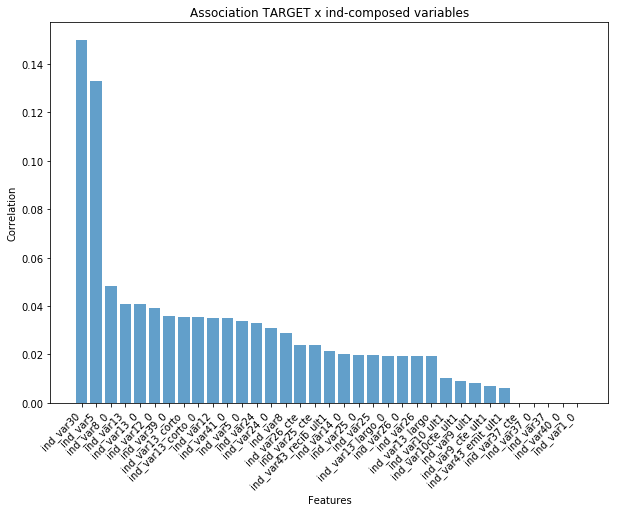

In [13]:
# Association between ind-composed variables and TARGET
assoc = []
for var in dichotomous_x:
    y = df_new['TARGET']
    x = df_new[var]
    assoc.append(cramers_corrected_stat(x,y))
dicho_association = pd.Series(data = assoc, index = dichotomous_x)
dicho_association.sort_values(ascending = False, inplace = True)

# Bar plot
plt.figure(figsize = (10,7))
plt.bar(x = dicho_association.index, height = dicho_association, alpha = 0.7)
plt.title("Association TARGET x ind-composed variables")
plt.ylabel("Correlation")
plt.xlabel("Features")
plt.xticks(rotation=45, ha="right")
plt.show()

In [14]:
# Comparing the results of Cramer's V with Pearson 
test = dichotomous_x.copy()
test.append('TARGET')
pearson_d = df_new[test].corr()['TARGET'].abs().sort_values(ascending = False)[1:]
pearson_d.name = 'Pearson'
dicho_association.name = "Cramer's V"
pd.concat([dicho_association, pearson_d], axis = 1).sort_values(by = "Cramer's V", ascending = False)[:8]

Cramer's V   Pearson
ind_var30          0.149791  0.149837
ind_var5           0.133097  0.133149
ind_var8_0         0.048217  0.048362
ind_var13          0.040801  0.040973
ind_var13_0        0.040656  0.040828
ind_var12_0        0.039336  0.039513
ind_var39_0        0.035963  0.036157
ind_var13_corto    0.035410  0.035607

Cramer's V and Pearson coefficients are basically the same, indicating that dichotomous variables have a linear relationship with TARGET. Thus, let's use all variables and evaluate their relationship with the target variable using Pearson and Spearman.

##### Association between variables and TARGET using Pearson's and Spearman's methods.

In [22]:
spearman = df_new.corr(method = 'spearman')['TARGET'].sort_values(ascending = False)[1:]
spearman.name = 'spearman'
pearson = df_new.corr()['TARGET'].sort_values(ascending = False)[1:]
pearson.name = 'pearson'
corr = pd.concat([spearman, pearson], axis = 1)
corr.head(10)

spearman   pearson
imp_ent_var16_ult1       0.004883 -0.000007
imp_op_var39_comer_ult1 -0.005667  0.010763
imp_op_var39_comer_ult3 -0.005467  0.003687
imp_op_var39_efect_ult1  0.013794  0.031448
imp_op_var39_efect_ult3  0.014545  0.022955
imp_op_var39_ult1       -0.001200  0.028418
imp_op_var41_comer_ult1 -0.004735  0.010483
imp_op_var41_comer_ult3 -0.004341  0.004041
imp_op_var41_efect_ult1  0.013649  0.030515
imp_op_var41_efect_ult3  0.014647  0.022245

It can be seen that Spearman's and Pearson's coefficients presented comparable values for some of the variables. However, there were some cases where Pearson coefficient was significantly stronger than Spearman's (see for example num_med_var22_ult3, imp_op_var41_ult1) indicating that those variables have a stronger linear relationship with TARGET. On the other hand, a stronger monotonic relationship is observed in cases where Spearman's coefficient was larger.

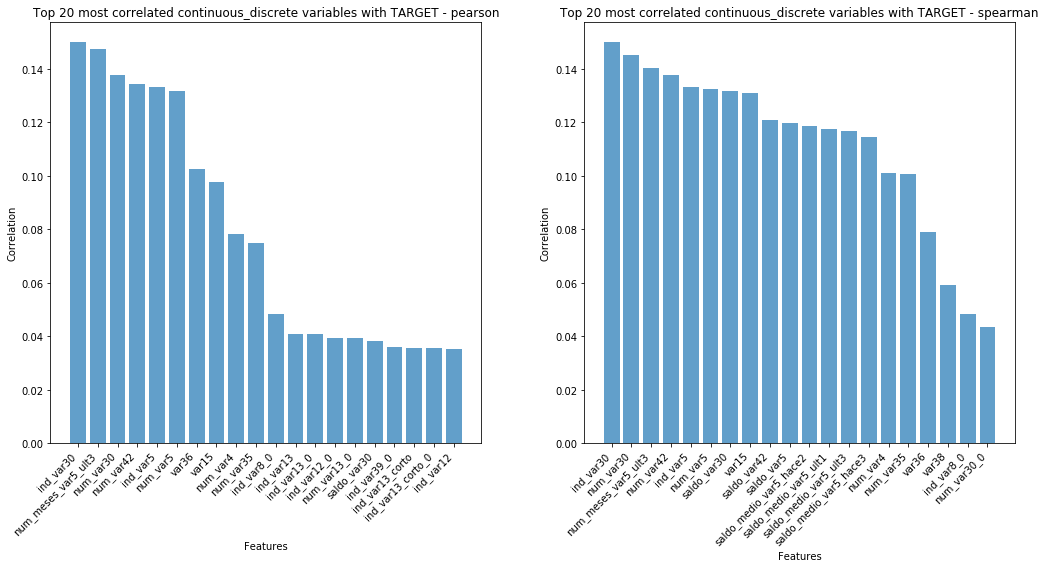

In [33]:
# Plot of top 20 most correlated variables with TARGET (absolute values)

def plot_corr():
    plt.figure(figsize = (15,8))
    methods = ['pearson', 'spearman']
    for i, method in enumerate(methods):
        corr_continuous = df_new.corr(method = method)['TARGET'].abs().sort_values(ascending = False).head(21)[1:]
        plt.subplot(1,2,i+1)
        plt.bar(x = corr_continuous.index, height = corr_continuous, alpha = 0.7)
        plt.title("Top 20 most correlated continuous_discrete variables with TARGET - {}".format(method))
        plt.ylabel("Correlation")
        plt.xlabel("Features")
        plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

plot_corr()

In this comparison it is clear that there are differences in correlation calculated in both methods. Spearman's coefficient was bigger for many variables, indicating that those variable have a monotonic relationship with TARGET. This also might indicate that a more linear relationship could be achieved by log transformations in those variables.

This is shown in the table and figure below. After log transformation, in general, linear relationship increased and different variables appear in the top 20 list that didn't appeared before.

In [34]:
index = corr.abs().sort_values(by = 'pearson', ascending = False).index
test = index[:20].copy().to_list()
test.append('TARGET')
log_corr = np.log1p(df_new[test]).corr()['TARGET']
log_corr.name = 'pearson - log(x)'
pd.concat([corr.loc[index].head(20), log_corr], axis = 1).loc[index].head(20)

spearman   pearson  pearson - log(x)
ind_var30           -0.149837 -0.149837         -0.149837
num_meses_var5_ult3 -0.140372 -0.147371         -0.149694
num_var30           -0.144969 -0.137706         -0.149763
num_var42           -0.137540 -0.134310         -0.139862
ind_var5            -0.133149 -0.133149         -0.133149
num_var5            -0.132476 -0.131828         -0.132838
var36                0.078983  0.102436          0.098615
var15                0.131015  0.097508          0.113663
num_var4            -0.100945 -0.078348         -0.109715
num_var35           -0.100797 -0.075028         -0.122506
ind_var8_0           0.048362  0.048362          0.048362
ind_var13           -0.040973 -0.040973         -0.040973
ind_var13_0         -0.040828 -0.040828         -0.040828
ind_var12_0         -0.039513 -0.039513         -0.039513
num_var13_0         -0.040834 -0.039347         -0.040676
saldo_var30         -0.131569 -0.038354         -0.108441
ind_var39_0         -0.036157 -0.036157         -0.036157
ind_var13_corto     -0.035607 -0.035607         -0.035607
ind_var13_corto_0   -0.035503 -0.035503         -0.035503
ind_var12           -0.035395 -0.035395         -0.035395

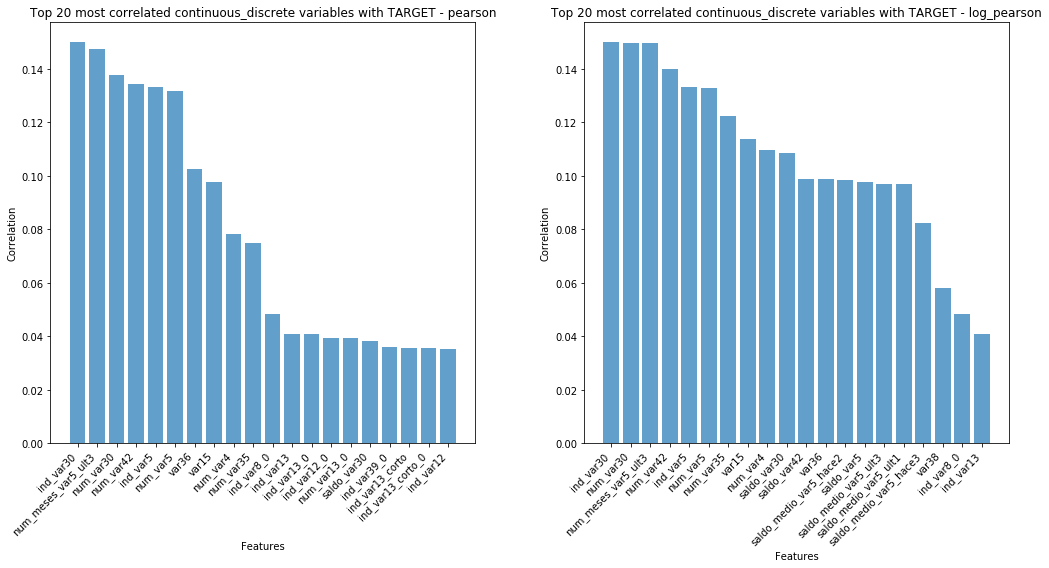

In [20]:
log_cols = df_new.copy()
cols = log_cols.columns
log_cols[cols[:-1]] = np.log1p(df_new[cols[:-1]])
log_pearson = log_cols[cols].corr()['TARGET'].abs().sort_values(ascending = False).head(21)[1:]
pearson_ = df_new[cols].corr()['TARGET'].abs().sort_values(ascending = False).head(21)[1:]
data = [('pearson', pearson_), ('log_pearson', log_pearson)]
plt.figure(figsize = (15,8))
for i, method in enumerate(data):
    plt.subplot(1,2,i+1)
    plt.bar(x = method[1].index, height = method[1], alpha = 0.7)
    plt.title("Top 20 most correlated continuous_discrete variables with TARGET - {}".format(method[0]))
    plt.ylabel("Correlation")
    plt.xlabel("Features")
    plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### 6.3 - Applying log transformations to the data

Let's apply log-transformation to our data and evaluate the resulting skewness. Since there are some variables with negative values in the dataset, log transformation will be done as sign(x)*log(abs(x)+1). The sign(x) is to mantain the value sign after log transformation and abs(x)+1 is to avoid missing values. Log function is not define for x = 0.

It's important to cite that log transformation was not performed this way for correlation calculations. However, I checked the effect of this transformation and coefficient values were pretty much the same.

In [34]:
x_log_train = x_new_train.copy()
x_log_test = x_new_test.copy()

x_log_train = x_log_train.applymap(lambda x: np.sign(x) * np.log(abs(x)+1))
x_log_test = x_log_test.applymap(lambda x: np.sign(x) * np.log(abs(x)+1))

In [26]:
# No missing values
x_log_train.isnull().sum().sum()

0

In [20]:
# Skewness before log transformations 
x_new_train.skew().sort_values(ascending = False).head(10)

saldo_medio_var5_hace3     74.474905
saldo_var37                66.913658
imp_ent_var16_ult1         62.672606
var38                      55.198036
imp_op_var41_efect_ult3    42.428909
imp_op_var39_efect_ult3    41.978289
imp_op_var41_efect_ult1    36.648733
imp_op_var39_efect_ult1    36.210082
num_var12_0                33.758311
imp_trans_var37_ult1       32.900841
dtype: float64

In [19]:
# Skewness after log transformation
x_log_train.skew().sort_values(ascending = False).head(10)

ind_var13_largo      9.524567
ind_var13_largo_0    9.451417
ind_var40_0          8.835863
ind_var1_0           8.820984
ind_var14_0          6.136305
ind_var25_0          6.051631
ind_var25            6.051631
ind_var26_0          5.922987
ind_var26            5.922987
ind_var25_cte        5.697392
dtype: float64

### 6.4 - Training the model with log-transformed data

In [27]:
# Training the model with log-transformed data
pipe = Pipeline([('logit', LogisticRegression(class_weight='balanced'))])
scores2 = cross_val_score(pipe, x_log_train, y_new_train, scoring='roc_auc', cv=StratifiedKFold(5), n_jobs=-1)
print('Logistic Regression + log-transformed data')
print('ROC-AUC: ', np.mean(scores2), ' std: ', np.std(scores2))

Logistic Regression + log-transformed data
ROC-AUC:  0.8109407801496014  std:  0.008999819351881289


In [28]:
# Using MinMaxScaler() with log-transformed data
pipe = Pipeline([('scaler', MinMaxScaler()), ('logit', LogisticRegression(class_weight='balanced'))])
scores3 = cross_val_score(pipe, x_log_train, y_new_train, scoring='roc_auc', cv=StratifiedKFold(5), n_jobs=-1)
print('MinMaxScaler + Logistic Regression + log-transformed data')
print('ROC-AUC: ', np.mean(scores3), ' std: ', np.std(scores3))

MinMaxScaler + Logistic Regression + log-transformed data
ROC-AUC:  0.8127885875250243  std:  0.009490779223477812


In [46]:
pipe = Pipeline([('scaler', MinMaxScaler()), ('logit', LogisticRegression(class_weight='balanced'))])

grid_params = {'logit__C':[0.01,0.1,1], 'logit__solver': ['lbfgs', 'liblinear'], 'logit__max_iter': [100,200,300,500]}

grid_search_logit = GridSearchCV(estimator = pipe,
                                 param_grid= grid_params, 
                                 scoring = 'roc_auc', 
                                 cv = StratifiedKFold(5), 
                                 n_jobs=-1).fit(x_log_train, y_new_train)

In [49]:
grid_search_logit.best_params_

{'logit__C': 0.1, 'logit__max_iter': 200, 'logit__solver': 'lbfgs'}

In [48]:
grid_search_logit.best_score_

0.8132871293313009

The model performance was improved applying log-transformation to the data.

### 6.5 - Principal Component Analysis

#### Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components. Moreover, linear regression models, including logistic regression, are influenced by multicollinearity, when some predictiors are somehow correlated. Once pca components are independent from each other, the problem of multicollinearity is eliminated. Let's use PCA components to train a logistic regression model.

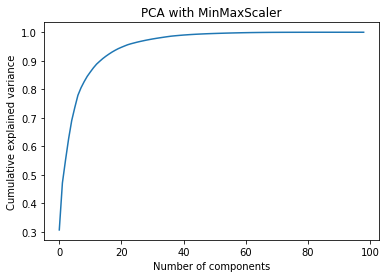

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# MinMaxScaler
minmax = MinMaxScaler(feature_range = (0,1))

# Applying PCA method
scaled_minmax = minmax.fit_transform(x_log_train)
pca = PCA().fit(scaled_minmax)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('PCA with MinMaxScaler')
plt.show()

In [30]:
# 50 principal components describe 99.5% of the data variance
np.sum(pca.explained_variance_ratio_[:50])

0.9953229114793704

In [35]:
# Transforming the data
scaler = MinMaxScaler()
x_train_log_scaled = scaler.fit_transform(x_log_train)
x_test_log_scaled = scaler.transform(x_log_test)

pca = PCA(n_components=50)
x_pca_train = pca.fit_transform(x_train_log_scaled )
x_pca_test = pca.transform(x_test_log_scaled)

In [60]:
pd.DataFrame(x_pca_train).to_csv('x_pca_train', index=False)
pd.DataFrame(x_pca_test).to_csv('x_pca_test', index=False)

In [32]:
pipe = Pipeline([('logit', LogisticRegression(class_weight='balanced'))])
scores5 = cross_val_score(pipe, x_pca_train, y_new_train, scoring='roc_auc', cv=StratifiedKFold(5), n_jobs=-1)
print('ROC-AUC: ', np.mean(scores5), ' std: ', np.std(scores5))

ROC-AUC:  0.813856064872987  std:  0.010788506764447389


#### GridSearch

In [33]:
grid_params = {'C':[0.01,0.1,1], 'solver': ['lbfgs', 'liblinear'], 'max_iter': [100,200,300,500]}

grid_search_logit2 = GridSearchCV(estimator = LogisticRegression(class_weight='balanced'),
                                 param_grid= grid_params, 
                                 scoring = 'roc_auc', 
                                 cv = StratifiedKFold(5), 
                                 n_jobs=-1).fit(x_pca_train, y_new_train)

In [34]:
grid_search_logit2.best_params_

{'C': 1, 'max_iter': 100, 'solver': 'liblinear'}

In [35]:
grid_search_logit2.best_score_

0.8138565403114233

No improvement was obtained with tuning hyperparameters.

#### ROC and PRC curves

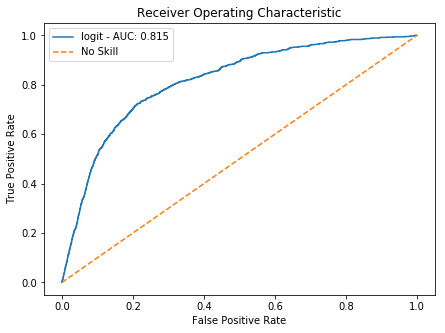

[('logit', 0.5192126916549122)]

In [42]:
predictions = [grid_search_logit2.predict_proba(x_pca_test)]
labels = ['logit']
roc_plot(predictions, labels, y_new_test)

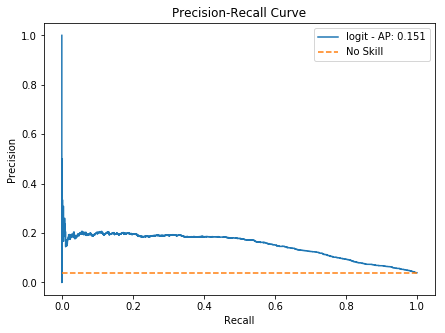

[('logit', 0.9963042479586065)]

In [43]:
prc_plot(predictions, labels, y_new_test)

In [47]:
## Saving the model
pickle.dump(grid_search_logit2, open('models/logit_model', 'wb'))

### 6.7 Comparing the models 

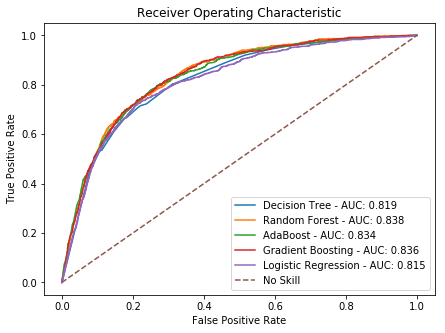

[('Decision Tree', 0.46872743325138316),
 ('Random Forest', 0.4953203807284142),
 ('AdaBoost', 0.4983514467169207),
 ('Gradient Boosting', 0.24535880394093523),
 ('Logistic Regression', 0.5182372825643714)]

In [37]:
# Loading the models
decision_tree = pickle.load(open('models/decision_tree_model', 'rb'))
random_forest = pickle.load(open('models/random_forest_model', 'rb'))
adaboost = pickle.load(open('models/adaboost_model', 'rb'))
gradient_boosting = pickle.load(open('models/gradient_boosting_model','rb'))
logistic_model = pickle.load(open('models/logit_model','rb'))

# Making predictions with test set
predictions = [decision_tree.predict_proba(x_new_test),
              random_forest.predict_proba(x_new_test[rando_forest_features]),
              adaboost.predict_proba(x_new_test),
              gradient_boosting.predict_proba(x_test_scaled[varImp_smote]),
              logistic_model.predict_proba(x_pca_test)]

label = ['Decision Tree', 'Random Forest','AdaBoost', 'Gradient Boosting','Logistic Regression']

roc_plot(predictions, label, y_new_test)

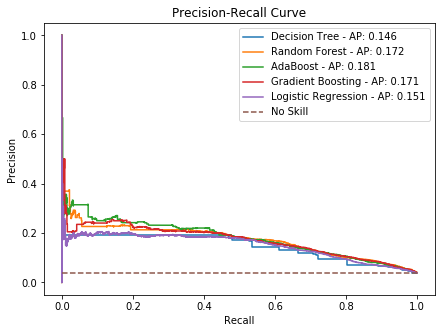

[('Decision Tree', 0.8815553826534135),
 ('Random Forest', 0.8490705656024816),
 ('AdaBoost', 0.5479698345713695),
 ('Gradient Boosting', 0.8506883691032674),
 ('Logistic Regression', 0.9960790253286832)]

In [70]:
prc_plot(predictions, label, y_new_test)

### 6.8 - Making predictions with Logistic Regression

In [38]:
# Test data with no labels
test_set = pd.read_csv('test.csv')
test_set = test_set[x_new_train.columns]

# Log-transform
test_set_log = test_set.applymap(lambda x: np.sign(x) * np.log(abs(x)+1))

# Scaling 
scaler = MinMaxScaler()
x_train_log_scaled = scaler.fit_transform(x_log_train)
test_set_log_scaled = scaler.transform(test_set_log)

# PCA
test_set_pca = pca.transform(x_test_log_scaled)

# Selecting only Random Forest most important variables
predictions = logistic_model.predict(test_set_pca)
unique, counts = np.unique(predictions, return_counts= True)
count = list(zip(unique, counts))
print('Predictions: ', count)
print('{:.2f}% of the samples were labeled as unsatisfied'.format(count[1][1]*100/test_set_pca.shape[0]))
print()

Predictions:  [(0, 15958), (1, 5406)]
25.30% of the samples were labeled as unsatisfied



Accuracy: 0.815
Precision: 0.114
Recall: 0.737
F1-score: 0.197
ROC AUC: 0.752


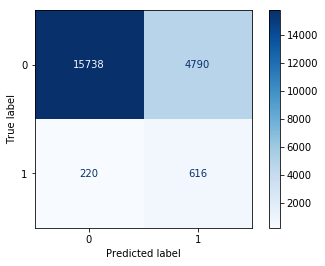

In [39]:
from custom_functions.functions import evaluate_model_without_cv
y_pred = logistic_model.predict(x_pca_test)
evaluate_model_without_cv(x_pca_test, y_new_test, y_pred, logistic_model)

## 7. Model 6 - SVM

Because the training data has ten thousands of examples, training a SVC might take a long time. Thus in order to decrease the time of training, I will use SMOTE technique to balance the classes and undersample the majority class. 

In [41]:
from sklearn.svm import SVC

In [15]:
from imblearn.pipeline import Pipeline

### 7.1 - MinMaxScaler x StandardScaler

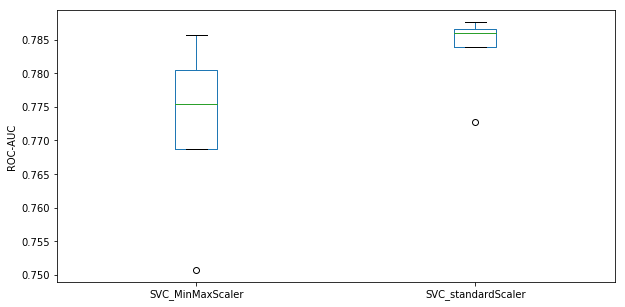

In [28]:
steps = [[('scale', MinMaxScaler()), ('over', SMOTE(sampling_strategy=0.1, k_neighbors=5, random_state=42)), 
         ('under', RandomUnderSampler(sampling_strategy=0.5, random_state = 42)),
          ('model', SVC(probability=True,random_state=42))],
         [('scale', StandardScaler()), ('over', SMOTE(sampling_strategy=0.1, k_neighbors=5, random_state=42)), 
         ('under', RandomUnderSampler(sampling_strategy=0.5, random_state = 42)),
          ('model', SVC(probability=True,random_state=42))]]
label = ['SVC_MinMaxScaler', 'SVC_standardScaler']
result = compare_models(steps, label, 'roc_auc', 5, x_new_train, y_new_train)

plt.figure(figsize = (10,5))
result.boxplot(grid = False)
plt.ylabel('ROC-AUC')
plt.show()

### 7.2 - RBF kernel x Poly kernel

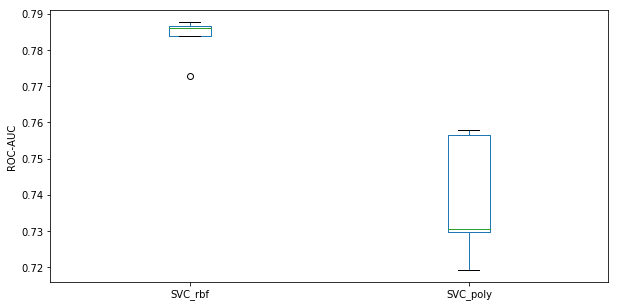

In [17]:
steps = [[('scale', StandardScaler()), ('over', SMOTE(sampling_strategy=0.1, k_neighbors=5, random_state=42)), 
         ('under', RandomUnderSampler(sampling_strategy=0.5, random_state = 42)),
          ('model', SVC(probability=True,random_state=42))],
         [('scale', StandardScaler()), ('over', SMOTE(sampling_strategy=0.1, k_neighbors=5, random_state=42)), 
         ('under', RandomUnderSampler(sampling_strategy=0.5, random_state = 42)),
          ('model', SVC(kernel='poly',probability=True,random_state=42))]]
label = ['SVC_rbf', 'SVC_poly']
result = compare_models(steps, label, 'roc_auc', 5, x_new_train, y_new_train)

plt.figure(figsize = (10,5))
result.boxplot(grid = False)
plt.ylabel('ROC-AUC')
plt.show()

### 7.3 Finding the most important variables to use in SVC

The most important variables will be find using the univariate feature selection with mutual information estimation. Mutual information method measures any kind of dependency between the variables, when the target is discrete.

In [47]:
# Balancing the data
standScaler = StandardScaler()
x_train_standScaled = standScaler.fit_transform(x_new_train)
x_test_standScaled = standScaler.transform(x_new_test)

pipe = Pipeline([('over', SMOTE(sampling_strategy=0.1, k_neighbors=5, random_state=42)), 
         ('under', RandomUnderSampler(sampling_strategy=0.5, random_state = 42))])
x_train_smote_svc, y_train_smote_svc = pipe.fit_resample(x_train_standScaled, y_new_train)

x_train_smote_svc = pd.DataFrame(x_train_smote_svc, columns = x_new_train.columns)
x_test_standScaled = pd.DataFrame(x_test_standScaled, columns = x_new_test.columns)

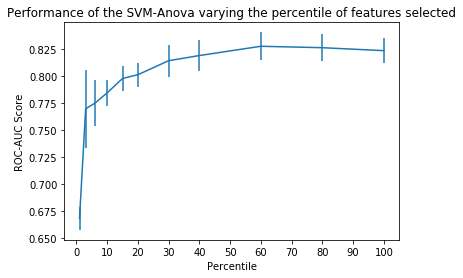

In [25]:
from sklearn.feature_selection import SelectPercentile, mutual_info_classif

# Finding the percentile of features that gives the best performance
svc_kbest = Pipeline([('anova', SelectPercentile(mutual_info_classif)),
                ('svc', SVC(probability=True,random_state=42))])

score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    svc_kbest.set_params(anova__percentile=percentile)
    scores = cross_val_score(svc_kbest, x_train_smote_svc, y_train_smote_svc, scoring='roc_auc', cv=5, n_jobs=-1)
    score_means.append(scores.mean())
    score_stds.append(scores.std())

# Plot of the results
plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title('Performance of the SVM-Anova varying the percentile of features selected')
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel('Percentile')
plt.ylabel('ROC-AUC Score')
plt.axis('tight')
plt.show()

The best performance occurs when using 60% of the features, i.e., about 60 features.

In [48]:
# Finding the 60 most important variables
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

selector = SelectKBest(mutual_info_classif,60)
selector.fit(x_train_smote_svc, y_train_smote_svc)

kbest_60 = x_train_smote_svc.columns[selector.get_support()]

In [49]:
kbest_60

Index(['var15', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3',
       'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'ind_var5',
       'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var24_0', 'ind_var26_cte',
       'ind_var30', 'num_var4', 'num_var5', 'num_var12_0', 'num_var13_0',
       'num_op_var41_hace2', 'num_op_var41_ult1', 'num_op_var41_ult3',
       'num_op_var39_hace2', 'num_op_var39_ult1', 'num_op_var39_ult3',
       'num_var30_0', 'num_var30', 'num_var35', 'num_var39_0', 'num_var42',
       'saldo_var5', 'saldo_var30', 'saldo_var42', 'var36',
       'imp_trans_var37_ult1', 'ind_var43_recib_ult1', 'num_var22_hace2',
       'num_var22_hace3', 'num_var22_ult1', 'num_var22_ult3',
       'num_med_var22_ult3', 'num_med_var45_ult3', 'num_meses_var5_ult3',
       'num_meses_var39_vig_ult3', 'num_op_var39_comer_ult1',
       'num_op_var39_comer_ult3', 'num_op_var41_comer_ult1',
       'num_op_var41_comer_ult3', 'num_op_var41_efect_ult1',
       'num_op_var41_efect_ult3'

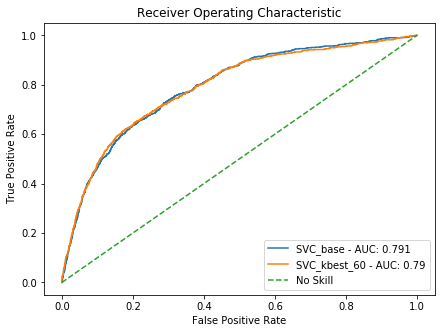

[('SVC_base', 0.21573700412211436), ('SVC_kbest_60', 0.2448398928623736)]

In [105]:
# Traning models

svc_base = SVC(probability=True,random_state=42).fit(x_train_smote_svc, y_train_smote_svc)

svc_kbest_60 = SVC(probability=True,random_state=42).fit(x_train_smote_svc[kbest_60], y_train_smote_svc)

predictions = [svc_base.predict_proba(x_test_standScaled),
              svc_kbest_60.predict_proba(x_test_standScaled[kbest_60])]

labels = ['SVC_base', 'SVC_kbest_60']

roc_plot(predictions, labels, y_new_test)

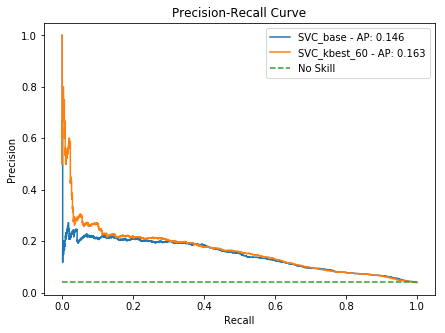

[('SVC_base', 0.5641220306195838), ('SVC_kbest_60', 0.6551466236368616)]

In [106]:
prc_plot(predictions, labels, y_new_test)

In [56]:
# Performance of svc_base in train and test
print('ROC-AUC for training data: ', np.round(roc_auc_score(y_train_smote_svc, svc_base.predict_proba(x_train_smote_svc)[:,1]), 3))
print('ROC-AUC for testing data: ', np.round(roc_auc_score(y_new_test, svc_base.predict_proba(x_test_standScaled)[:,1]), 3))

ROC-AUC for training data:  0.852
ROC-AUC for testing data:  0.791


In [55]:
# Performance of svc_kbest_60 in train and test
print('ROC-AUC for training data: ', np.round(roc_auc_score(y_train_smote_svc, svc_kbest_60.predict_proba(x_train_smote_svc[kbest_60])[:,1]), 3))
print('ROC-AUC for testing data: ', np.round(roc_auc_score(y_new_test, svc_kbest_60.predict_proba(x_test_standScaled[kbest_60])[:,1]), 3))

ROC-AUC for training data:  0.856
ROC-AUC for testing data:  0.79


The model using 60 variables presented larger PRC-AUC in test, then I will perform a GridSearch in this model to find the optimum values for C and gamma hyperparameters.

### 7.4 - Tuning the hyperparameters

In [50]:
## This cell takes lots of time to run
model = SVC(probability = True, random_state=42)

param_grid = {'C': [0.01,0.1,1,10], 'gamma': ['scale', 0.01,0.1,1,10]}

search = GridSearchCV(model, param_grid, scoring = 'roc_auc', cv = 5, n_jobs=-1).fit(x_train_smote_svc[kbest_60], 
                                                                                     y_train_smote_svc)

In [51]:
search.best_params_

{'C': 10, 'gamma': 0.1}

In [52]:
search.best_score_

0.8527085597871629

In [53]:
svc_tuned = search.best_estimator_

SVC(C=10, gamma=0.1, probability=True, random_state=42)

In [54]:
# Performance of gbm_smote in train and test
print('ROC-AUC for training data: ', np.round(roc_auc_score(y_train_smote_svc, svc_tuned.predict_proba(x_train_smote_svc[kbest_60])[:,1]), 3))
print('ROC-AUC for testing data: ', np.round(roc_auc_score(y_new_test, svc_tuned.predict_proba(x_test_standScaled[kbest_60])[:,1]), 3))

ROC-AUC for training data:  0.906
ROC-AUC for testing data:  0.768


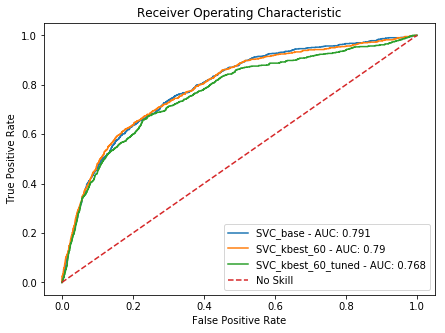

[('SVC_base', 0.21573700412211436),
 ('SVC_kbest_60', 0.2448398928623736),
 ('SVC_kbest_60_tuned', 0.2069830293003395)]

In [107]:
predictions = [svc_base.predict_proba(x_test_standScaled),
              svc_kbest_60.predict_proba(x_test_standScaled[kbest_60]),
              svc_tuned.predict_proba(x_test_standScaled[kbest_60])]

labels = ['SVC_base', 'SVC_kbest_60','SVC_kbest_60_tuned']

roc_plot(predictions, labels, y_new_test)

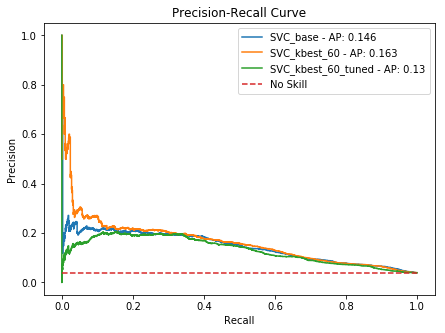

In [108]:
_ = prc_plot(predictions, labels, y_new_test)

https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769
https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167

Optimizing the hyperparameters increased the performance in train, but decreased the performance in test. This can be an indication of overfitting. Thus, tuning the hyperparameters of SVC with rbf kernel did not improve the performance of SVC model. Let's select SVC_kbest_60 as the best SVC model.

In [59]:
# Saving the model
pickle.dump(svc_kbest_60, open('models/svc_model', 'wb'))

## 8 - Comparing all models

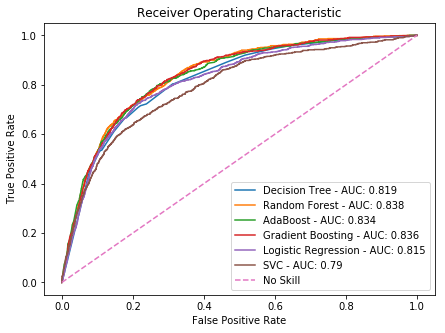

In [112]:
# Loading the models
decision_tree = pickle.load(open('models/decision_tree_model', 'rb'))
random_forest = pickle.load(open('models/random_forest_model', 'rb'))
adaboost = pickle.load(open('models/adaboost_model', 'rb'))
gradient_boosting = pickle.load(open('models/gradient_boosting_model','rb'))
logistic_model = pickle.load(open('models/logit_model','rb'))
svc = pickle.load(open('models/svc_model','rb'))

# Making predictions with test set
predictions = [decision_tree.predict_proba(x_new_test),
              random_forest.predict_proba(x_new_test[rando_forest_features]),
              adaboost.predict_proba(x_new_test),
              gradient_boosting.predict_proba(x_test_scaled[varImp_smote]),
              logistic_model.predict_proba(x_pca_test),
              svc.predict_proba(x_test_standScaled[kbest_60])]

label = ['Decision Tree', 'Random Forest','AdaBoost', 'Gradient Boosting','Logistic Regression','SVC']

best_threshold = roc_plot(predictions, label, y_new_test)

In [116]:
best_threshold

[('Decision Tree', 0.46872743325138316),
 ('Random Forest', 0.4953203807284142),
 ('AdaBoost', 0.4983514467169207),
 ('Gradient Boosting', 0.24535880394093523),
 ('Logistic Regression', 0.5182372825643714),
 ('SVC', 0.2448398928623736)]

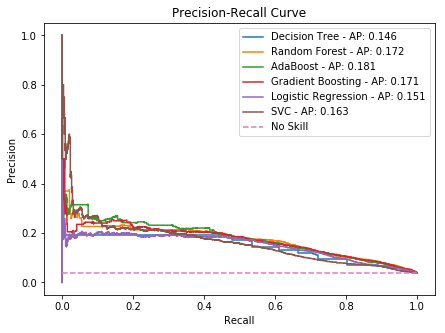

In [103]:
_ = prc_plot(predictions, label, y_new_test)

Considering these results, I will elect AdaBoost as the model with the best performance. Its ROC-AUC was very similar to Random Forest's and Gradient Boosting's, however due to its bigger average precision value (0.181), it is able to recover a bigger amount of true positives. Let's evaluate this by plotting the confusion matrices of the models.

### 8.1 - Confusion Matrices

#### Threshold = 0.5

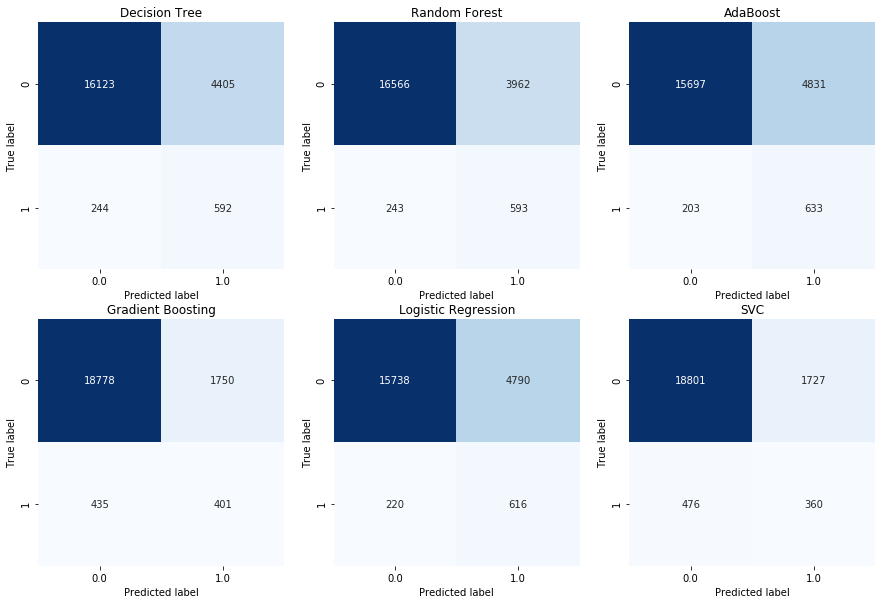

In [102]:
plt.figure(figsize=(15,10))
for i,value in enumerate(zip(label, predictions)):
    data = {'y_true': y_new_test, 'y_predicted': np.round(value[1][:,1]>=0.5)}
    df = pd.DataFrame(data, columns=['y_true','y_predicted'])
    confusion_matrix = pd.crosstab(df['y_true'], df['y_predicted'], rownames=['True label'], colnames=['Predicted label'])
    plt.subplot(2,3,i+1)
    sns.heatmap(confusion_matrix, cmap = 'Blues', annot=True, fmt='g', cbar=False)
    plt.title(value[0])
plt.show()

It is observed that at threshold = 0.5, AdaBoost had the best performance considering the amount of true positives recovered by the model (633). SVC presented the worst performance, as expected from its ROC-AUC and PRC-AUC metrics.

Threshold equals to 0.5 is a standard value. However, the best value for a threshold changes depending on the model and the preprocessing techniques applied to the data. Let's look at the confusion matrices at the best thresholds of each of the models trained in this project.

#### Confusion Matrices at the best thresholds

My customized function roc_plot() returns the best threshold considering the Youden's J statistic.

J = Sensitivity + Specificity - 1

As can be seen, every model has a different best threshold value. 

In [117]:
best_threshold

[('Decision Tree', 0.46872743325138316),
 ('Random Forest', 0.4953203807284142),
 ('AdaBoost', 0.4983514467169207),
 ('Gradient Boosting', 0.24535880394093523),
 ('Logistic Regression', 0.5182372825643714),
 ('SVC', 0.2448398928623736)]

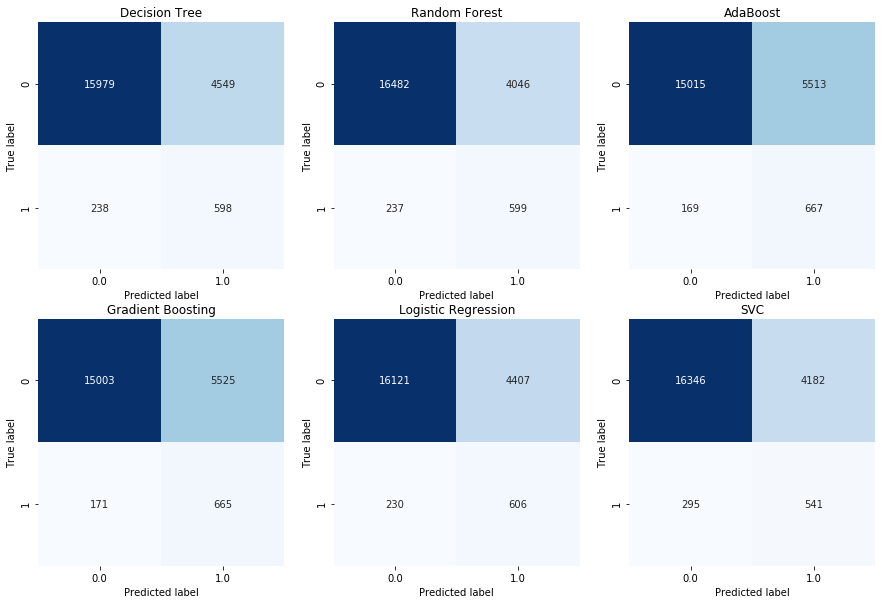

In [118]:
plt.figure(figsize=(15,10))
for i,value in enumerate(zip(predictions,best_threshold)):
    data = {'y_true': y_new_test, 'y_predicted': np.round(value[0][:,1]>=value[1][1])}
    df = pd.DataFrame(data, columns=['y_true','y_predicted'])
    confusion_matrix = pd.crosstab(df['y_true'], df['y_predicted'], rownames=['True label'], colnames=['Predicted label'])
    plt.subplot(2,3,i+1)
    sns.heatmap(confusion_matrix, cmap = 'Blues', annot=True, fmt='g', cbar=False)
    plt.title(value[1][0])
plt.show()

Look how close the performances of AdaBoost and Gradient Boosting are, considering the true positives, when the best threshold of each model is used to make predictions. In general, the amount of true positives increased under the best threshold for most of the models, except for logistic regression that had more true positives at threshold = 0.5. However, the amount of false positives also increased. 

## 9 - Final Considerations

During the development of this project I had the opportunity to face different challenges. 

First, the data set had 370 dimensions with no labels, what made the exploratory data analysis more difficult since I did not know what the attributes were. And also, analyzing each of those features was very time consuming. The majority of the features had 0.0 as a frequent value and skewed distribution. I decided to use two strategies to eliminate potential irrelevant features from the data set. (1) Features with low variance and (2) features with 95% of the data belonging to a unique value (considering both classes) were removed. The resulted data set had 99 features. In order to evaluate the impact of these procedures, a Random Forest model was trained using the transformed data set and the original data set. Despite of the similar performances of Random Forest models, there is no guarantee that any relevant feature has not being removed using strategy (2). 

Second, the data is imbalanced and can not be directly used to train the model. To overcome this issue, I used the hyperparameter "class_weight" when available to inform the algorithm that the data was imbalanced. Using the hyperparameter "class_weight" = 'balanced' resulted in better performance for decision tree model when compared with the performance obtained using SMOTE technique to balance the data. Gradient Boosting algorithm does not have this hyperparameter, then I balanced the data using SMOTE technique along with the majority class undersampling. This same procedure was used to balance the data to train a support vector machine classifier (SVC), because the resulted data set was smaller and improved the computational cost of SVM training. 

During training, I used different methods to select the most important features for the prediction of the target variable such as recursive feature elimination with cross validation (RFECV), and the univariate statistical SelectKBest method implemented in sklearn. Principal component analysis (PCA) was used to reduce the dimensionality of the data as a setp of logistic regression training. I also created some customized functions for data visualization and model evaluation.

Data science is an iterative process. Thus, if the performance of the models created do not satisfy the conditions determined during the definition of the business problem, we can return to the begining and explore more the data available based on the insights gained along the development of the project. We can create new features that might help explain better the target, use different preprocessing methods, tune the model using a wider range of hyperparameter, etc.